In [4]:
#import nupic
import pandas
import time
import copy
import os
import numpy as np
import math
import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import seaborn as sns

import nupic
from nupic.algorithms import anomaly_likelihood
from nupic.frameworks.opf.common_models.cluster_params import getScalarMetricWithTimeOfDayAnomalyParams
from nupic.frameworks.opf.model_factory import ModelFactory
from nab.detectors.base import AnomalyDetector
from nab.util import (absoluteFilePaths, createPath)
#from nupic.data.record_stream import RecordStreamIface

#import stream DataHandles
from pkg_resources import resource_filename
from nupic.data.file_record_stream import FileRecordStream

In [144]:
#file locations
#single dataframe
src_path = "C:\Users\RJO7ABT\Documents\Bosch-MT\Daten\csv\DEMAGNET_MAX_SPEED_FILT.csv"
dest_path = "C:\Users\RJO7ABT\Documents\Bosch-MT\Daten\csv\DEMAGNET_MAX_SPEED_FILT_htm.csv"

#double dataframe
#src_path = "C:\Users\RJO7ABT\Documents\Bosch-MT\Daten\csv\DEMAGNET_MAX_SPEED_FILT_double.csv"
#dest_path = "C:\Users\RJO7ABT\Documents\Bosch-MT\Daten\csv\DEMAGNET_MAX_SPEED_FILT_htm_double.csv"

In [175]:
df_demag1 =pandas.read_csv("C:\Users\RJO7ABT\Documents\Bosch-MT\Daten\csv\DEMAGNET_MAX_SPEED_FILT.csv")
df_demag = df_demag1.copy()
#df_demag2 = df_demag1.copy()
df_demag = df_demag[["DATE", "DEMAGNET_MAX_SPEED_FILT"]].rename(index=str, columns={"DATE": "timestamp", "DEMAGNET_MAX_SPEED_FILT": "value"})
#df_htm_demag2 = df_demag2[["DATE", "DEMAGNET_MAX_SPEED_FILT"]].rename(index=str, columns={"DATE": "timestamp", "DEMAGNET_MAX_SPEED_FILT": "value"})
#df_demag_double = pandas.concat([df_demag1, df_demag2])
#df_demag = pandas.concat([df_htm_demag1, df_htm_demag2])
#print(df_htm_demag.info(verbose=True), df_htm_demag.head(5))
#print(df_demag[["IPB.TEMP.BAG", "IPB.TEMP.BULKHEAD"]])
#print(df_demag)

df_demag.to_csv("C:\Users\RJO7ABT\Documents\Bosch-MT\Daten\csv\DEMAGNET_MAX_SPEED_FILT_htm.csv")

df_demag.reset_index(level=0 , drop=True, inplace=True)
#df_demag_double.reset_index(level=0 , drop=True, inplace=True)

df_demag.to_csv("C:\Users\RJO7ABT\Documents\Bosch-MT\Daten\csv\DEMAGNET_MAX_SPEED_FILT_htm.csv")
df_demag1

IPB.TEMP.BULKHEAD  IPB.TEMP.BAG  DEMAGNET_MAX_SPEED_FILT  \
0              27.612305     26.977539                 3.683064   
1              27.349854     26.977539                 4.699998   
2              27.349854     26.910400                 4.750997   
3              27.435303     26.885986                 4.158429   
4              27.374268     27.050781                 5.437248   
5              28.002930     26.922607                 6.344520   
6              27.331543     26.885986                 7.258904   
7              27.496338     26.806641                 6.348099   
8              27.362061     27.362061                 3.853531   
9              27.368164     26.922607                 4.540672   
10             27.630615     27.227783                 4.341572   
11             27.288818     26.666260                 4.079306   
12             27.404785     26.806641                 4.472277   
13             27.435303     27.282715                 5.892250   
14             27.398682     26.898193                 4.527225   
15             27.343750     27.044678                 2.228794   
16             27.398682     26.422119                 5.237257   
17             27.703857     27.008057                 4.353520   
18             26.959229     27.032471                 4.535041   
19             27.246094     26.898193                 5.443999   
20             27.117920     26.617432                 8.024490   
21             26.617432     26.867676                 6.050519   
22             26.660156     26.879883                 7.405507   
23             27.172852     26.226807                 5.411570   
24             26.702881     26.422119                 5.371073   
25             26.910400     26.568604                 4.217208   
26             27.093506     27.709961                 5.261530   
27             27.130127     26.763916                 6.896482   
28             26.885986     26.629639                 4.402285   
29             27.001953     26.593018                 5.641304   
...                  ...           ...                      ...   
42678         105.389404    102.966309                19.831817   
42679         105.584717    103.015137                31.370481   
42680         105.383301    102.984619                 8.818980   
42681         105.401611    103.076172                19.397250   
42682         104.882813    102.789307                14.411628   
42683         106.634521    102.734375                43.546627   
42684         105.413818    102.697754                23.871375   
42685         105.780029    102.929688                17.170516   
42686         105.139160    103.240967                 0.000000   
42687         105.139160    102.459717                20.363144   
42688         105.554199    103.344727                35.322605   
42689         105.816650    102.880859                16.774029   
42690         106.103516    102.471924                 9.680951   
42691         105.731201    103.173828                16.125668   
42692         105.432129    103.027344                16.919655   
42693         104.742432    103.161621                19.669359   
42694         105.944824    103.466797                22.966442   
42695         105.834961    103.045654                20.141515   
42696         105.364990    102.886963                43.360906   
42697         105.889893    102.966309                20.223669   
42698         105.468750    102.954102                15.721466   
42699         105.712891    102.832031                45.272250   
42700         105.639648    102.636719                19.310978   
42701         105.322266    102.996826                17.380398   
42702         106.005859    102.764893                22.037497   
42703         105.584717    102.697754                17.645114   
42704         105.596924    102.923584                22.567579   
42705         105.474854    103.277588                

CSV file handle Class

In [153]:
#Data Object class to read and transform csv file into Data Object 
class DataFile(object):
  """
  Class for storing and manipulating a single datafile.
  Data is stored in pandas.DataFrame
  """

  def __init__(self, srcPath):
    """
    @param srcPath (string)   Filename of datafile to read.
    """
    self.srcPath = srcPath

    self.fileName = os.path.split(srcPath)[1]

    self.data = pandas.io.parsers.read_csv(self.srcPath,
                                           header=0, parse_dates=[0])


  def write(self, newPath=None):
    """Write datafile to self.srcPath or newPath if given.

    @param newPath (string)   Path to write datafile to. If path is not given,
                              write to source path
    """

    path = newPath if newPath else self.srcPath
    self.data.to_csv(path, index=False)


  def modifyData(self, columnName, data=None, write=False):
    """Add columnName to datafile if data is given otherwise remove
    columnName.

    @param columnName (string)          Name of the column in the datafile to
                                        either add or remove.

    @param data       (pandas.Series)   Column data to be added to datafile.
                                        Data length should be as long as the
                                        length of other columns.

    @param write      (boolean) Flag to choose whether to write modifications to
                                source path.
    """
    if isinstance(data, pandas.Series):
      self.data[columnName] = data
    else:
      if columnName in self.data:
        del self.data[columnName]

    if write:
      self.write()


  def getTimestampRange(self, t1, t2):
    """Given timestamp range, get all records that are within that range.

    @param t1   (int)   Starting timestamp.

    @param t2   (int)   Ending timestamp.

    @return     (list)  Timestamp and value for each time stamp within the
                        timestamp range.
    """
    tmp = self.data[self.data["timestamp"] >= t1]
    ans = tmp[tmp["timestamp"] <= t2]["timestamp"].tolist()
    return ans


  def __str__(self):
    ans = ""
    ans += "path:                %s\n" % self.srcPath
    ans += "file name:           %s\n"% self.fileName
    ans += "data size:         ", self.data.shape()
    ans += "sample line: %s\n" % ", ".join(self.data[0])
    return ans

In [ ]:
#create synthetic time range for double dataframe
#synt_dates = pandas.date_range(start='2018-04-13 15:33:41', end=None, periods=85416, freq='M', tz=UTC, normalize=False, name='synt_dates' )

In [165]:

#delete columns from origin file
csv_orig = DataFile(dest_path)


#IPB.TEMP.BULKHEAD,IPB.TEMP.BAG,DEMAGNET_MAX_SPEED_FILT,DATE
#csv_orig.modifyData("IPB.TEMP.BULKHEAD")
#csv_orig.modifyData("IPB.TEMP.BAG")
csv_orig.modifyData("Unnamed: 0")
#csv_orig.data
csv_orig.write(dest_path)

#create data file object
inputData = DataFile(dest_path)
inputData.data.head()
#inputData.data
#inputData.getTimestampRange("2018-04-13 15:36:23", "2018-04-13 17:17:47")

timestamp     value
0 2018-04-13 15:33:41  3.683064
1 2018-04-13 15:34:10  4.699998
2 2018-04-13 15:34:15  4.750997
3 2018-04-13 15:34:52  4.158429
4 2018-04-13 15:34:59  5.437248

NumentaDetector Class inherits from AnomalyDetector

In [166]:
# Fraction outside of the range of values seen so far that will be considered
# a spatial anomaly regardless of the anomaly likelihood calculation. This
# accounts for the human labelling bias for spatial values larger than what
# has been seen so far.
SPATIAL_TOLERANCE = 0.05


class NumentaDetector(AnomalyDetector):
    #This detector uses an HTM based anomaly detection technique.#
    def __init__(self, *args, **kwargs):
        super(NumentaDetector, self).__init__(*args, **kwargs)
        
        self.model = None
        self.sensorParams = None
        self.anomalyLikelihood = None
        # Keep track of value range for spatial anomaly detection
        self.minVal = None
        self.maxVal = None

    # Set this to False if you want to get results based on raw scores
    # without using AnomalyLikelihood. This will give worse results, but
    # useful for checking the efficacy of AnomalyLikelihood. You will need
    # to re-optimize the thresholds when running with this setting.
        self.useLikelihood = True
  
    def getAdditionalHeaders(self):
        """Returns a list of strings."""
        return ["raw_score"]


    def handleRecord(self, inputData):
        """Returns a tuple (anomalyScore, rawScore).
        Internally to NuPIC "anomalyScore" corresponds to "likelihood_score"
        and "rawScore" corresponds to "anomaly_score". Sorry about that.
        """
        # Send it to Numenta detector and get back the results
        result = self.model.run(inputData)
        # Get the value
        value = inputData["value"]

        # Retrieve the anomaly score and write it to a file
        rawScore = result.inferences["anomalyScore"]

        # Update min/max values and check if there is a spatial anomaly
        spatialAnomaly = False
        if self.minVal != self.maxVal:
            tolerance = (self.maxVal - self.minVal) * SPATIAL_TOLERANCE
            maxExpected = self.maxVal + tolerance
            minExpected = self.minVal - tolerance
            if value > maxExpected or value < minExpected:
                spatialAnomaly = True
        if self.maxVal is None or value > self.maxVal:
            self.maxVal = value
        if self.minVal is None or value < self.minVal:
            self.minVal = value

        if self.useLikelihood:
            # Compute log(anomaly likelihood)
            anomalyScore = self.anomalyLikelihood.anomalyProbability(
                inputData["value"], rawScore, inputData["timestamp"])
            logScore = self.anomalyLikelihood.computeLogLikelihood(anomalyScore)
            finalScore = logScore
        else:
            finalScore = rawScore

        if spatialAnomaly:
            finalScore = 1.0

        return (finalScore, rawScore, result)


    def initialize(self):
        #How to create the HTM model, you know basicaly the min and max
        #Get config params, setting the RDSE resolution
        self.inputMin=float(self.inputMin)
        self.inputMax=float(self.inputMax)
        
        rangePadding = abs(self.inputMax - self.inputMin) * 0.2

        #best htm parameters for anomaly detection(Timestamp,value)
        #best practise parameters: Return a dict that can be used to create an anomaly model via Model.create
        #modelParams["modelParams"]["sensorParams"]["encoders"]
        #RandomDistributedEncoder
        modelParams = getScalarMetricWithTimeOfDayAnomalyParams(
            metricData=[0],
            minVal=self.inputMin-rangePadding,
            maxVal=self.inputMax+rangePadding,
            minResolution=0.001,
            tmImplementation = "tm_cpp"
        )["modelConfig"]

        self._setupEncoderParams(
            modelParams["modelParams"]["sensorParams"]["encoders"])
    
        #create your HTM model with parameters and given data
        self.model = ModelFactory.create(modelParams)
    
        #OPF for prediction, not used for anomaly detection
        self.model.enableInference({"predictedField": "value"})

        if self.useLikelihood:
            # Initialize the anomaly likelihood object
            numentaLearningPeriod = int(math.floor(self.probationaryPeriod / 2.0))
            self.anomalyLikelihood = anomaly_likelihood.AnomalyLikelihood(
                learningPeriod=numentaLearningPeriod,
                estimationSamples=self.probationaryPeriod-numentaLearningPeriod,
                reestimationPeriod=100
            )

        #setup encoder(expect "timestamp" and "value" as headers)
    def _setupEncoderParams(self, encoderParams):
        # The encoder must expect the NAB-specific datafile headers
        encoderParams["timestamp_dayOfWeek"] = encoderParams.pop("c0_dayOfWeek")
        encoderParams["timestamp_timeOfDay"] = encoderParams.pop("c0_timeOfDay")
        encoderParams["timestamp_timeOfDay"]["fieldname"] = "timestamp"
        encoderParams["timestamp_timeOfDay"]["name"] = "timestamp"
        encoderParams["timestamp_weekend"] = encoderParams.pop("c0_weekend")
        encoderParams["value"] = encoderParams.pop("c1")
        encoderParams["value"]["fieldname"] = "value"
        encoderParams["value"]["name"] = "value"

        self.sensorParams = encoderParams["value"]

In [167]:
#if filelength > 5000, then learning window probationPercent * 5000, else probationPercent*Filelength
ad = NumentaDetector(inputData, 0.1)

#initialize to reset learning after every real anomaly, don't initialize after drift
ad.initialize()
print("inputMin and inputMAX: " + str(ad.inputMax) + "," +  str(ad.inputMin))
print("minVal and minVal: " + str(ad.minVal) + "," + str( ad.maxVal))
print("Sensor parameter: " + str(ad.sensorParams))
print("Anomaly Likelihood: " + str(ad.anomalyLikelihood))

print(ad.probationaryPeriod)

inputMin and inputMAX: 65.6708606527,-10.5683163031
minVal and minVal: None,None
Sensor parameter: {u'name': 'value', 'resolution': 0.8210372902932307, u'seed': 42, u'fieldname': 'value', u'type': u'RandomDistributedScalarEncoder'}
Anomaly Likelihood: AnomalyLikelihood: 0 deque([], maxlen=8640) None 500.0 250 100
500.0


In [172]:
input_file = csv.DictReader(open(dest_path))


timestamp_list = []
value_list = []
anomaly_score_list = []
raw_score_list = []
prediction_list = []


for row in input_file:
    #print(datetime.datetime.strptime(row["timestamp"], '%Y-%m-%d %H:%M:%S'))
    row["timestamp"] = datetime.datetime.strptime(row["timestamp"], '%Y-%m-%d %H:%M:%S')
    row["value"] = float(row["value"])
    print(row)
    anomalyScore, rawScore, result =  ad.handleRecord(row)
    print(anomalyScore, rawScore)
    #time.sleep(1)
    timestamp_list.append(row["timestamp"])
    value_list.append(row["value"])
    anomaly_score_list.append(anomalyScore)
    raw_score_list.append(rawScore)
    prediction_list.append(result)
        
df_anomaly = pandas.DataFrame(
    {'timestamp': timestamp_list,
     'value': value_list ,
     'raw score': raw_score_list,
     'anomaly score': anomaly_score_list
     #'prediction': prediction_list
    })

print(df_anomaly)

{'timestamp': datetime.datetime(2018, 4, 13, 15, 33, 41), 'value': 3.68306402768}
(0.26843557811041124, 1.0)
{'timestamp': datetime.datetime(2018, 4, 13, 15, 34, 10), 'value': 4.69999763742}
(0.27244188489512394, 1.0)
{'timestamp': datetime.datetime(2018, 4, 13, 15, 34, 15), 'value': 4.75099685913}
(0.43953876221230004, 0.97500002)
{'timestamp': datetime.datetime(2018, 4, 13, 15, 34, 52), 'value': 4.15842928183}
(0.6584116856049556, 0.97500002)
{'timestamp': datetime.datetime(2018, 4, 13, 15, 34, 59), 'value': 5.43724819629}
(0.29999999673506555, 0.97500002)
{'timestamp': datetime.datetime(2018, 4, 13, 15, 35, 14), 'value': 6.34452015201}
(0.29999999673506555, 0.94999999)
{'timestamp': datetime.datetime(2018, 4, 13, 15, 36, 12), 'value': 7.25890441298}
(0.29999999673506555, 0.875)
{'timestamp': datetime.datetime(2018, 4, 13, 15, 36, 23), 'value': 6.34809915245}
(0.29999999673506555, 0.72500002)
{'timestamp': datetime.datetime(2018, 4, 13, 15, 36, 32), 'value': 3.85353063705}
(0.2999999

(0.04810245134079469, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 3, 16), 'value': 6.29154857436}
(0.04810245134079469, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 3, 45), 'value': 6.47219143546}
(0.04810245134079469, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 3, 50), 'value': 4.47862159266}
(0.04810245134079469, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 4, 14), 'value': 6.28285917323}
(0.04810245134079469, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 4, 29), 'value': 4.38193204403}
(0.04810245134079469, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 4, 39), 'value': 5.26614653614}
(0.04810245134079469, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 5, 12), 'value': 4.63410661875}
(0.04810245134079469, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 5, 48), 'value': 5.32322485136}
(0.04810245134079469, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 5, 54), 'value': 6.18168969296}
(0.04810245134079469, 0.0)
{

(0.04308146627975909, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 33, 2), 'value': 6.86643791021}
(0.041892777550467816, 0.025)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 33, 24), 'value': 6.59529648165}
(0.04072635641156703, 0.025)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 33, 30), 'value': 7.95392769939}
(0.03845967284298981, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 33, 53), 'value': 9.18997531525}
(0.034186285147704526, 0.1)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 34, 16), 'value': 3.30834705445}
(0.034186285147704526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 34, 27), 'value': 7.76561075915}
(0.03217682528892839, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 34, 53), 'value': 5.45388207683}
(0.034186285147704526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 35, 15), 'value': 5.591737945}
(0.03522256022250858, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 16, 35, 20), 'value': 3.29111799644

(0.04550645253711922, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 2, 55), 'value': 5.78597484238}
(0.046762449448352464, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 3, 5), 'value': 5.51164427771}
(0.048041324888558765, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 3, 10), 'value': 3.76443852121}
(0.048041324888558765, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 3, 33), 'value': 5.05150527401}
(0.048041324888558765, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 3, 56), 'value': 3.7717692161}
(0.048041324888558765, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 4, 1), 'value': 4.47843135906}
(0.048041324888558765, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 4, 30), 'value': 6.21850197996}
(0.048041324888558765, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 4, 36), 'value': 7.40269945974}
(0.048041324888558765, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 4, 58), 'value': 4.65819647362}
(0.048041324888558765, 

(0.04668699490018548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 33, 3), 'value': 6.1462200552}
(0.04668699490018548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 33, 8), 'value': 5.31757383031}
(0.04668699490018548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 33, 14), 'value': 5.10270748597}
(0.04668699490018548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 33, 37), 'value': 5.07760555558}
(0.04668699490018548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 34, 30), 'value': 5.27095970209}
(0.04668699490018548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 34, 37), 'value': 6.19013455492}
(0.04668699490018548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 35), 'value': 3.94297252217}
(0.04668699490018548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 35, 11), 'value': 3.61124357935}
(0.04668699490018548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 17, 35, 41), 'value': 6.25395180041}
(0.04796389681977315, 0.0)

(0.04796231875567438, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 7, 10), 'value': 4.69623181815}
(0.04796231875567438, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 7, 22), 'value': 7.74283426897}
(0.04796231875567438, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 7, 45), 'value': 3.68497483623}
(0.04796231875567438, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 8, 9), 'value': 6.7464256112}
(0.04796231875567438, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 8, 34), 'value': 8.18886370815}
(0.04796231875567438, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 8, 58), 'value': 5.4291663878}
(0.04796231875567438, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 9, 10), 'value': 6.80703406192}
(0.04796231875567438, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 9, 35), 'value': 3.75267519256}
(0.04796231875567438, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 9, 40), 'value': 6.28984620662}
(0.04796231875567438, 0.0)
{'ti

(0.046685463693528405, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 38, 43), 'value': 3.48247772281}
(0.046685463693528405, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 38, 48), 'value': 7.16031229791}
(0.046676013445954984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 39, 16), 'value': 5.51526581292}
(0.046676013445954984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 39, 22), 'value': 5.8618916816}
(0.046676013445954984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 39, 44), 'value': 3.8326602211}
(0.046676013445954984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 39, 49), 'value': 4.51109399743}
(0.046676013445954984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 40, 13), 'value': 5.57457303979}
(0.046676013445954984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 40, 35), 'value': 5.14732737247}
(0.047952604410914715, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 18, 41, 4), 'value': 7.85967951462}
(0.0479526044

(0.0454222653526502, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 8, 11), 'value': 4.7220019634}
(0.0454222653526502, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 9, 5), 'value': 4.54978373244}
(0.0454222653526502, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 9, 13), 'value': 5.25410504254}
(0.0454222653526502, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 9, 37), 'value': 4.56511146531}
(0.0454222653526502, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 9, 43), 'value': 6.81706025763}
(0.045376921241515177, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 9, 54), 'value': 4.38403146433}
(0.045376921241515177, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 9, 59), 'value': 5.10532937593}
(0.04790488810216526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 10, 29), 'value': 5.63916839594}
(0.04790488810216526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 10, 35), 'value': 7.77323535615}
(0.04790488810216526, 0.0)
{'ti

(0.04790488810216526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 42, 15), 'value': 6.96103182118}
(0.04790488810216526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 42, 38), 'value': 7.44888657546}
(0.04790488810216526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 42, 43), 'value': 4.70370028192}
(0.04790488810216526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 43, 5), 'value': 3.61361797368}
(0.04790488810216526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 43, 29), 'value': 5.10668341855}
(0.04787805715078818, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 43, 41), 'value': 5.89625967602}
(0.04787805715078818, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 44, 4), 'value': 6.0124836028}
(0.04787805715078818, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 44, 38), 'value': 5.51663790486}
(0.04787805715078818, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 19, 44, 45), 'value': 2.45934759803}
(0.04787805715078818, 

(0.04173098060194115, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 9, 59), 'value': 7.67749342715}
(0.04291537256367351, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 10, 23), 'value': 5.31354852679}
(0.04291537256367351, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 10, 45), 'value': 5.96915624546}
(0.04412212238359274, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 11, 15), 'value': 8.52345550572}
(0.04291537256367351, 0.025)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 11, 22), 'value': 7.36429399264}
(0.04412212238359274, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 11, 50), 'value': 5.18265592233}
(0.04535138514575526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 11, 56), 'value': 3.49280453144}
(0.04535138514575526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 12, 1), 'value': 5.60458883148}
(0.04535138514575526, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 12, 17), 'value': 8.64424687099}
(0.0453372140285083

{'timestamp': datetime.datetime(2018, 4, 13, 20, 40, 45), 'value': 3.8739221617}
(0.04658874719557308, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 40, 53), 'value': 5.70587028319}
(0.047863089269667126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 41, 21), 'value': 5.40647411947}
(0.047863089269667126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 41, 27), 'value': 5.17411704636}
(0.047863089269667126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 41, 32), 'value': 7.08849935362}
(0.047863089269667126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 41, 54), 'value': 6.29164420801}
(0.047863089269667126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 42, 24), 'value': 5.17771338001}
(0.047863089269667126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 42, 58), 'value': 5.41551946515}
(0.047863089269667126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 20, 43, 5), 'value': 5.04928011017}
(0.047863089269667126, 0.0)
{'timestamp':

{'timestamp': datetime.datetime(2018, 4, 13, 21, 13, 37), 'value': 5.12742860387}
(0.04660760809581771, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 14, 3), 'value': 3.96176460369}
(0.04660760809581771, 0.025)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 14, 20), 'value': 6.22288794966}
(0.04660760809581771, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 14, 58), 'value': 9.05210743354}
(0.04412619692583126, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 15, 4), 'value': 6.8417932246}
(0.04412619692583126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 15, 9), 'value': 5.56223620054}
(0.04412619692583126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 15, 22), 'value': 8.83113600933}
(0.04412619692583126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 15, 49), 'value': 5.89471996377}
(0.04412619692583126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 16, 14), 'value': 4.64650576631}
(0.04412619692583126, 0.0)
{'timestamp':

(0.0478695528561947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 43, 42), 'value': 7.00205982165}
(0.0478695528561947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 43, 47), 'value': 5.76521495317}
(0.0478695528561947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 43, 51), 'value': 5.70225060468}
(0.0478695528561947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 44, 14), 'value': 5.40268991647}
(0.0478695528561947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 44, 43), 'value': 7.4268854029}
(0.0478695528561947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 44, 48), 'value': 6.08554764888}
(0.0478695528561947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 45, 10), 'value': 4.86728477786}
(0.0478695528561947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 45, 33), 'value': 4.7238890387}
(0.0478695528561947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 21, 45, 57), 'value': 4.87840907641}
(0.0478695528561947, 0.0)
{'ti

(0.04786094119414782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 15, 58), 'value': 5.15498085014}
(0.04786094119414782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 16, 54), 'value': 6.9583401468}
(0.04786094119414782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 17, 6), 'value': 6.97672901296}
(0.04786094119414782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 17, 12), 'value': 4.95955742447}
(0.04786094119414782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 17, 40), 'value': 5.58381543201}
(0.04786094119414782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 17, 45), 'value': 5.94222031654}
(0.04786094119414782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 18, 38), 'value': 4.82683778596}
(0.04786094119414782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 18, 46), 'value': 6.70521766613}
(0.04786094119414782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 19, 12), 'value': 4.95118286439}
(0.04786094119414782,

(0.04410206604643918, 0.025)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 51, 36), 'value': 5.28733950875}
(0.04410206604643918, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 51, 47), 'value': 7.35308480718}
(0.04410206604643918, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 52, 16), 'value': 4.9953025192}
(0.04410206604643918, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 52, 41), 'value': 3.85063078745}
(0.04410206604643918, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 52, 46), 'value': 6.54693546978}
(0.04410206604643918, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 53, 9), 'value': 4.75326774931}
(0.04410206604643918, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 53, 19), 'value': 4.49021982121}
(0.04410206604643918, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 53, 43), 'value': 4.10844598101}
(0.04410206604643918, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 22, 53, 54), 'value': 7.0400045943}
(0.04658228666773286

(0.04786999541084754, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 22, 41), 'value': 7.32801737273}
(0.04786999541084754, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 22, 46), 'value': 4.54530210731}
(0.04786999541084754, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 23, 10), 'value': 5.92325240066}
(0.04786999541084754, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 23, 47), 'value': 7.26225350694}
(0.04786999541084754, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 24, 21), 'value': 5.96797783}
(0.04786999541084754, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 24, 29), 'value': 7.55443851823}
(0.04786999541084754, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 24, 35), 'value': 5.05919159297}
(0.04786999541084754, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 24, 41), 'value': 1.77455661318}
(0.04659542965568195, 0.025)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 25, 1), 'value': 6.98276860616}
(0.04659542965568195,

(0.047846459801724375, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 52, 4), 'value': 4.08508292764}
(0.047846459801724375, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 52, 27), 'value': 5.17239539171}
(0.047846459801724375, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 52, 33), 'value': 6.67771472883}
(0.047846459801724375, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 53, 1), 'value': 7.34516784391}
(0.047846459801724375, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 53, 6), 'value': 4.94545544818}
(0.047846459801724375, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 53, 29), 'value': 3.58173543895}
(0.047846459801724375, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 53, 35), 'value': 4.61692617584}
(0.047846459801724375, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 53, 58), 'value': 6.85708934422}
(0.047846459801724375, 0.0)
{'timestamp': datetime.datetime(2018, 4, 13, 23, 54, 34), 'value': 8.54141255872}
(0.0478464598

(0.042810299180210974, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 27, 17), 'value': 0.106070037083}
(0.04046790867502453, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 27, 31), 'value': 5.5961614454}
(0.04046790867502453, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 27, 46), 'value': 3.83285263804}
(0.042810299180210974, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 28, 14), 'value': 4.85629516895}
(0.042810299180210974, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 28, 19), 'value': 5.01053298029}
(0.042810299180210974, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 28, 49), 'value': 5.13153141504}
(0.042810299180210974, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 28, 54), 'value': 5.11367664659}
(0.04524204102579294, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 29, 17), 'value': 4.97339008616}
(0.04524204102579294, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 29, 22), 'value': 6.87906862975}
(0.045242041025

(0.04388123017768029, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 57, 53), 'value': 4.47048597398}
(0.04388123017768029, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 58, 5), 'value': 6.43343217959}
(0.04388123017768029, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 58, 15), 'value': 5.80720062866}
(0.04388123017768029, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 59, 13), 'value': 6.28300554958}
(0.04388123017768029, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 59, 18), 'value': 5.09886927184}
(0.04388123017768029, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 0, 59, 41), 'value': 7.60929198403}
(0.041500362188769506, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 0, 1), 'value': 6.01187944244}
(0.04388123017768029, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 0, 28), 'value': 5.21639102079}
(0.0451052691893585, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 1, 39), 'value': 9.3524148625}
(0.039208059472738886, 0.1

(0.047338467352901134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 28, 9), 'value': 3.32418683335}
(0.047338467352901134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 28, 13), 'value': 4.97648743473}
(0.047338467352901134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 28, 36), 'value': 4.9715357865}
(0.047338467352901134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 29), 'value': 4.85176342168}
(0.047338467352901134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 29, 5), 'value': 5.77231485433}
(0.047338467352901134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 29, 33), 'value': 6.03833913062}
(0.047338467352901134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 29, 37), 'value': 5.91902951579}
(0.047338467352901134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 30, 9), 'value': 5.13501788201}
(0.047338467352901134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 1, 30, 14), 'value': 4.41242777969}
(0.047338467352901134, 0.0)

(0.04484018724846705, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 1, 11), 'value': 5.19957425427}
(0.04484018724846705, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 1, 44), 'value': 3.62678107829}
(0.04484018724846705, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 2, 18), 'value': 6.5065218501}
(0.04484018724846705, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 2, 32), 'value': 5.07197062843}
(0.04484018724846705, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 2, 47), 'value': 4.38945271683}
(0.04484018724846705, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 2, 52), 'value': 5.92592723437}
(0.04484018724846705, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 3, 3), 'value': 4.96437249088}
(0.04735120482465763, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 3, 19), 'value': 4.94740929602}
(0.04735120482465763, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 3, 34), 'value': 5.33854512754}
(0.04735120482465763, 0.0)
{'timestamp'

(0.03363369321228947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 28, 25), 'value': 3.40818458306}
(0.032629502376355465, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 28, 49), 'value': 5.74367901883}
(0.03363369321228947, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 28, 54), 'value': 8.6646088122}
(0.032629502376355465, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 29, 3), 'value': 1.2862870095}
(0.04010614236698133, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 29, 22), 'value': 7.27413904604}
(0.04010614236698133, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 29, 27), 'value': 5.94378160326}
(0.0412610325068993, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 29, 50), 'value': 4.31568353504}
(0.0412610325068993, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 29, 54), 'value': 5.64496886911}
(0.0412610325068993, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 2, 30, 22), 'value': 10.1993302514}
(0.03164613932322678

(0.04615664213140041, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 1, 48), 'value': 6.33508446223}
(0.04615664213140041, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 2, 12), 'value': 3.94731612121}
(0.04615664213140041, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 3, 4), 'value': 6.95437424551}
(0.04615664213140041, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 3, 11), 'value': 3.63439084379}
(0.04615664213140041, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 3, 35), 'value': 5.33881067197}
(0.04615664213140041, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 4, 5), 'value': 5.80251315265}
(0.047425416370065324, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 4, 10), 'value': 5.8729591154}
(0.047425416370065324, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 4, 22), 'value': 6.62999310716}
(0.047425416370065324, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 4, 43), 'value': 7.6676067152}
(0.047425416370065324, 0.0)
{'timestam

(0.03683698893265042, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 31, 24), 'value': 7.31573898004}
(0.03683698893265042, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 31, 32), 'value': 8.75047891264}
(0.03683698893265042, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 31, 41), 'value': 6.84239954804}
(0.03683698893265042, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 32, 3), 'value': 7.71362997618}
(0.03683698893265042, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 33, 15), 'value': 7.58560905544}
(0.03683698893265042, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 33, 21), 'value': 8.36201728204}
(0.04017560100269034, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 33, 32), 'value': 10.5375240003}
(0.03369243902804079, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 34, 2), 'value': 5.1444028752}
(0.03369243902804079, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 3, 34, 12), 'value': 9.00570457506}
(0.04017560100269034, 0.

(0.035919102482285574, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 0, 9), 'value': 10.2061429248}
(0.035919102482285574, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 0, 37), 'value': 11.5480634016}
(0.03320046359332117, 0.22499999)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 0, 44), 'value': 9.95028851939}
(0.03525387518426088, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 1, 7), 'value': 9.28495826144}
(0.03525387518426088, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 1, 31), 'value': 9.2449185423}
(0.030876191470804008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 1, 36), 'value': 9.5535935088}
(0.03486843606460837, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 1, 42), 'value': 8.49548392967}
(0.03486843606460837, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 2, 5), 'value': 8.84008592622}
(0.03486843606460837, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 2, 35), 'value': 12.4024526233}
(0.03631242142615341, 0.

(0.035023005737811044, 0.125)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 29, 17), 'value': 10.3120682578}
(0.035023005737811044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 29, 40), 'value': 10.553108539}
(0.038250671319490205, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 29, 45), 'value': 10.3044269827}
(0.038250671319490205, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 30, 6), 'value': 11.0479848349}
(0.038250671319490205, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 30, 29), 'value': 9.1028882894}
(0.038250671319490205, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 30, 47), 'value': 12.7052643926}
(0.036077393212062644, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 31, 17), 'value': 9.50471259594}
(0.036077393212062644, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 31, 29), 'value': 11.0514659762}
(0.037153224432617156, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 31, 33), 'value': 10.9750523452}
(0.039369903

(0.04548167007221456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 4, 57, 39), 'value': 8.03637863654}
(0.04548167007221456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 0, 11), 'value': 10.4144830961}
(0.046737470186297043, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 0, 19), 'value': 11.1666949903}
(0.046737470186297043, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 0, 31), 'value': 11.7751615973}
(0.04548167007221456, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 0, 58), 'value': 10.507161313}
(0.04548167007221456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 1, 38), 'value': 8.8291031002}
(0.04548167007221456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 1, 46), 'value': 9.4261776195}
(0.04548167007221456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 1, 53), 'value': 10.5586516073}
(0.046737470186297043, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 2, 20), 'value': 7.75488570324}
(0.046737470186297043, 0.0)
{'time

(0.048040804608214575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 27, 25), 'value': 11.0798268966}
(0.048040804608214575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 27, 54), 'value': 11.010194223}
(0.048040804608214575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 27, 59), 'value': 10.690713322}
(0.048040804608214575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 28, 22), 'value': 10.7311932861}
(0.048040804608214575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 28, 45), 'value': 9.67775930608}
(0.048040804608214575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 29, 9), 'value': 9.95432982131}
(0.048040804608214575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 29, 14), 'value': 8.73902482199}
(0.048040804608214575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 29, 41), 'value': 13.4838695592}
(0.048040804608214575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 29, 46), 'value': 10.8581739171}
(0.048040804608214575,

(0.04803872230959583, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 58, 7), 'value': 6.62996976971}
(0.04803872230959583, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 58, 11), 'value': 10.22021541}
(0.04803872230959583, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 58, 35), 'value': 9.37486969946}
(0.04803872230959583, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 58, 58), 'value': 11.1411979854}
(0.04803872230959583, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 59, 20), 'value': 11.5815820335}
(0.04803872230959583, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 5, 59, 57), 'value': 11.2957522785}
(0.04803872230959583, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 0, 4), 'value': 11.166459614}
(0.04803872230959583, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 0, 27), 'value': 13.115997124}
(0.04803872230959583, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 0, 39), 'value': 14.438380068}
(0.04803872230959583, 0.0)
{'timestamp

(0.048007245562730394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 23, 37), 'value': 12.5994796661}
(0.048007245562730394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 23, 46), 'value': 11.0388753103}
(0.048007245562730394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 24, 10), 'value': 11.1009393516}
(0.048007245562730394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 24, 39), 'value': 12.0596451396}
(0.048007245562730394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 24, 45), 'value': 11.1757841684}
(0.048007245562730394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 24, 55), 'value': 12.3813310505}
(0.048007245562730394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 25, 1), 'value': 11.4925315244}
(0.048007245562730394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 25, 24), 'value': 9.72322061017}
(0.048007245562730394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 25, 47), 'value': 10.7702263237}
(0.04800724556273039

(0.04797412759585615, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 50, 20), 'value': 11.4602070082}
(0.04797412759585615, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 50, 43), 'value': 9.23688139264}
(0.04797412759585615, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 51, 7), 'value': 9.7501008001}
(0.04797412759585615, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 51, 30), 'value': 9.61617422834}
(0.04797412759585615, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 51, 36), 'value': 12.4797706879}
(0.04797412759585615, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 52), 'value': 11.0572788336}
(0.04797412759585615, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 52, 12), 'value': 12.9279505693}
(0.04797412759585615, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 52, 35), 'value': 12.6616637524}
(0.04797412759585615, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 6, 52, 58), 'value': 10.6142656154}
(0.04797412759585615, 0.0)
{'times

(0.04665283725765361, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 19, 27), 'value': 12.0102319793}
(0.04665283725765361, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 19, 50), 'value': 10.5359969984}
(0.04665283725765361, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 20, 2), 'value': 13.41636521}
(0.04792888477010008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 20, 26), 'value': 8.7329865589}
(0.04792888477010008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 20, 48), 'value': 9.37528485966}
(0.04792888477010008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 20, 53), 'value': 11.3006319173}
(0.04792888477010008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 21, 15), 'value': 10.3136353719}
(0.04792888477010008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 21, 51), 'value': 12.2541959696}
(0.04792888477010008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 22, 17), 'value': 10.5813854226}
(0.04792888477010008, 0.0)
{'tim

(0.04792888477010008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 50, 7), 'value': 11.2141325138}
(0.047932236763755035, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 50, 37), 'value': 15.2216141926}
(0.04417224740882336, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 50, 43), 'value': 9.53380322397}
(0.04417224740882336, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 50, 48), 'value': 8.88182523219}
(0.04417224740882336, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 51, 25), 'value': 10.73303309}
(0.04417224740882336, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 51, 51), 'value': 10.6739529743}
(0.04417224740882336, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 52, 14), 'value': 11.9343339671}
(0.04417224740882336, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 52, 38), 'value': 11.1140022541}
(0.04417224740882336, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 7, 53, 7), 'value': 12.5638089706}
(0.04417224740882336, 0

(0.04296418790742845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 18, 55), 'value': 10.8451542804}
(0.046656120557254044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 19), 'value': 8.75735481649}
(0.046656120557254044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 19, 24), 'value': 11.7137289122}
(0.046656120557254044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 19, 35), 'value': 13.9071915474}
(0.047932236763755035, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 19, 59), 'value': 10.9986535605}
(0.047932236763755035, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 20, 21), 'value': 11.6877253796}
(0.047932236763755035, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 20, 57), 'value': 12.1097318517}
(0.047932236763755035, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 21, 23), 'value': 8.68512799584}
(0.04789696056005732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 21, 47), 'value': 9.77820435637}
(0.04789696056005732, 0.0

(0.04789696056005732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 46, 16), 'value': 11.5758311211}
(0.04789696056005732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 46, 52), 'value': 12.8326457439}
(0.04789696056005732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 47, 10), 'value': 13.5177729396}
(0.04789696056005732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 47, 23), 'value': 12.8384101238}
(0.04789696056005732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 48, 14), 'value': 12.0156785673}
(0.04789696056005732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 48, 37), 'value': 11.8330901033}
(0.04789696056005732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 49), 'value': 10.3695872267}
(0.04789696056005732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 49, 6), 'value': 11.2965480304}
(0.04789696056005732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 8, 49, 29), 'value': 9.89274484625}
(0.04789696056005732, 0.0)
{'time

(0.04784841938922937, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 18, 30), 'value': 12.0884282154}
(0.04784841938922937, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 18, 36), 'value': 11.7329430478}
(0.04784841938922937, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 19), 'value': 11.831465656}
(0.04784841938922937, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 19, 6), 'value': 10.7357492523}
(0.04784841938922937, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 19, 29), 'value': 10.4643071038}
(0.04784841938922937, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 19, 39), 'value': 9.88353262276}
(0.04784841938922937, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 20, 12), 'value': 12.6691335349}
(0.04784841938922937, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 20, 17), 'value': 12.3676731688}
(0.04784841938922937, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 20, 42), 'value': 10.7127700832}
(0.04784841938922937, 0.0)
{'times

(0.04782635862095169, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 45, 42), 'value': 12.545927726}
(0.04782635862095169, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 45, 46), 'value': 11.8983915701}
(0.04782635862095169, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 46, 18), 'value': 13.3344473691}
(0.04655289525298923, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 46, 31), 'value': 13.4252462629}
(0.04655289525298923, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 46, 39), 'value': 9.43087891322}
(0.04655289525298923, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 47, 11), 'value': 11.3042792115}
(0.04655289525298923, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 47, 19), 'value': 12.2068132519}
(0.04655289525298923, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 47, 42), 'value': 9.2990528236}
(0.04655289525298923, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 9, 47, 54), 'value': 13.7418242724}
(0.04655289525298923, 0.0)
{

(0.04652698704389643, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 17, 40), 'value': 13.2765507079}
(0.04652698704389643, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 17, 45), 'value': 10.5555616218}
(0.04652698704389643, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 18, 8), 'value': 10.9780332224}
(0.04652698704389643, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 18, 33), 'value': 13.2733484427}
(0.04652698704389643, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 18, 39), 'value': 13.862093388}
(0.04652698704389643, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 19, 9), 'value': 12.2243008951}
(0.04652698704389643, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 19, 14), 'value': 10.3314153279}
(0.04652698704389643, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 19, 37), 'value': 13.8865639646}
(0.04652698704389643, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 20), 'value': 10.5967234332}
(0.04652698704389643, 0.

(0.046477754481616944, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 47, 43), 'value': 11.3297617007}
(0.046477754481616944, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 47, 52), 'value': 4.22068819938}
(0.04161777843762378, 0.1)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 48, 7), 'value': 12.1807356571}
(0.04161777843762378, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 48, 30), 'value': 9.52635899344}
(0.04161777843762378, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 48, 42), 'value': 14.0450076996}
(0.04279915280266893, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 49, 5), 'value': 11.2054701274}
(0.04279915280266893, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 49, 29), 'value': 10.0073933846}
(0.04279915280266893, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 49, 34), 'value': 10.5271020833}
(0.04279915280266893, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 10, 49, 40), 'value': 11.7979640932}
(0.0427991528026689

{'timestamp': datetime.datetime(2018, 4, 14, 11, 19, 21), 'value': 5.50105355216}
(0.046405810887997855, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 19, 34), 'value': 11.5416756069}
(0.046405810887997855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 19, 57), 'value': 10.7890361551}
(0.046405810887997855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 20, 2), 'value': 12.6064120991}
(0.046405810887997855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 20, 16), 'value': 9.8735484807}
(0.046405810887997855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 20, 50), 'value': 10.8903383223}
(0.046405810887997855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 21, 24), 'value': 13.8128916282}
(0.046405810887997855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 21, 30), 'value': 11.6958076378}
(0.046405810887997855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 21, 54), 'value': 7.86931293768}
(0.046405810887997855, 0.0)
{'timestam

(0.046336090245581094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 49, 42), 'value': 10.3383197933}
(0.046336090245581094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 49, 48), 'value': 11.1458163979}
(0.046336090245581094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 50, 11), 'value': 10.7132855556}
(0.046336090245581094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 50, 34), 'value': 8.31711848873}
(0.046336090245581094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 51, 9), 'value': 13.3447274274}
(0.046336090245581094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 51, 18), 'value': 7.527910022}
(0.04760408401245317, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 51, 47), 'value': 13.39085968}
(0.04760408401245317, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 51, 51), 'value': 9.76613035557}
(0.04760408401245317, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 11, 52, 14), 'value': 10.7487302354}
(0.047604084012453

{'timestamp': datetime.datetime(2018, 4, 14, 12, 19, 31), 'value': 10.9872355219}
(0.04632557628611931, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 19, 43), 'value': 13.2280089062}
(0.04632557628611931, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 19, 50), 'value': 10.221084859}
(0.04632557628611931, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 20, 13), 'value': 10.9459041422}
(0.04759296580150916, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 23, 13), 'value': 14.4685849834}
(0.04632557628611931, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 23, 36), 'value': 10.2027521721}
(0.04632557628611931, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 24), 'value': 12.7751886453}
(0.04632557628611931, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 24, 16), 'value': 11.9699641256}
(0.04632557628611931, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 24, 24), 'value': 13.7292400823}
(0.04632557628611931, 0.0)
{'timestamp': datetime

{'timestamp': datetime.datetime(2018, 4, 14, 12, 49, 12), 'value': 11.8950006956}
(0.04748877812981747, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 49, 21), 'value': 10.6780837838}
(0.04748877812981747, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 49, 45), 'value': 12.1440843729}
(0.04748877812981747, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 49, 56), 'value': 13.5826389795}
(0.04622326968572126, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 50, 22), 'value': 13.735522682}
(0.04498044863004255, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 50, 31), 'value': 5.00012798611}
(0.042562266358560905, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 50, 46), 'value': 10.0630708723}
(0.042562266358560905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 51, 8), 'value': 9.04679565885}
(0.042562266358560905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 12, 51, 19), 'value': 7.92822560339}
(0.042562266358560905, 0.0)
{'tim

(0.040186508634827804, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 22, 15), 'value': 12.1266537339}
(0.042513434179650915, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 22, 51), 'value': 10.5422848116}
(0.042513434179650915, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 23, 27), 'value': 11.9080382741}
(0.0437101382517832, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 23, 33), 'value': 10.9223188488}
(0.0437101382517832, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 23, 59), 'value': 11.6934110996}
(0.0437101382517832, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 24, 6), 'value': 12.8151576551}
(0.04492921069122553, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 24, 13), 'value': 8.86882985669}
(0.0437101382517832, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 24, 33), 'value': 9.57753126157}
(0.04492921069122553, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 25, 1), 'value': 12.0249672056}
(0.044929210691225

(0.04741360917381366, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 50, 58), 'value': 9.73929454862}
(0.04741360917381366, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 51, 4), 'value': 10.5781096893}
(0.04741360917381366, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 51, 26), 'value': 11.0999642461}
(0.04741360917381366, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 51, 49), 'value': 8.70775803926}
(0.04490890443262807, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 52, 18), 'value': 11.7561974319}
(0.04490890443262807, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 52, 24), 'value': 8.11889295775}
(0.04249424197373967, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 52, 47), 'value': 9.01860984178}
(0.04016839220862404, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 52, 53), 'value': 9.98448775665}
(0.04016839220862404, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 13, 55, 42), 'value': 12.50370566

{'timestamp': datetime.datetime(2018, 4, 14, 14, 18, 43), 'value': 12.5324618176}
(0.04612644475417565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 19, 6), 'value': 11.2695170399}
(0.04612644475417565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 19, 30), 'value': 10.6245931452}
(0.04612644475417565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 19, 35), 'value': 11.6023792986}
(0.04612644475417565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 19, 48), 'value': 11.9162719924}
(0.04612644475417565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 20, 14), 'value': 12.5276624425}
(0.04612644475417565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 20, 38), 'value': 8.57570552207}
(0.04612644475417565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 20, 43), 'value': 11.4171220061}
(0.04612644475417565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 21, 7), 'value': 10.220875568}
(0.04612644475417565, 0.0)
{'timestamp': datetime

(0.04366878122336599, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 47, 32), 'value': 12.140888601}
(0.04366878122336599, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 47, 54), 'value': 11.0719192522}
(0.04366878122336599, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 48, 6), 'value': 13.3719760951}
(0.04366878122336599, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 48, 11), 'value': 11.0971447434}
(0.04366878122336599, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 48, 35), 'value': 10.1397149057}
(0.04488679295723491, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 48, 59), 'value': 11.9148013283}
(0.04488679295723491, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 49, 4), 'value': 11.7766344739}
(0.04488679295723491, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 49, 28), 'value': 9.68150180376}
(0.04488679295723491, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 14, 49, 58), 'value': 12.2664134588}
(0.047390481114584534,

(0.047376859915858306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 18, 5), 'value': 10.3005338515}
(0.047376859915858306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 18, 28), 'value': 10.8992489344}
(0.047376859915858306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 18, 40), 'value': 13.3355849739}
(0.047376859915858306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 19, 3), 'value': 11.1172394989}
(0.047376859915858306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 19, 8), 'value': 12.6401253013}
(0.047376859915858306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 19, 14), 'value': 10.96544852}
(0.047376859915858306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 19, 37), 'value': 9.17277101094}
(0.04611402304127309, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 19, 49), 'value': 13.7144871325}
(0.04611402304127309, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 20, 14), 'value': 9.57795188862}
(0.046114023041

(0.04737840393126415, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 47, 26), 'value': 8.40697542802}
(0.04737840393126415, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 47, 31), 'value': 9.98066906405}
(0.04737840393126415, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 47, 46), 'value': 12.5877705107}
(0.04737840393126415, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 47, 51), 'value': 12.060236033}
(0.04737840393126415, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 48, 20), 'value': 12.8311955585}
(0.04737840393126415, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 48, 26), 'value': 13.108466103}
(0.04737840393126415, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 48, 45), 'value': 8.83880351377}
(0.04737840393126415, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 48, 53), 'value': 9.24387484204}
(0.04737840393126415, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 15, 49, 18), 'value': 12.310995225}
(0.04737840393126415, 

(0.04012329706973519, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 16, 55), 'value': 9.62702276895}
(0.043641935676099, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 17, 4), 'value': 11.6808765096}
(0.043641935676099, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 17, 18), 'value': 10.601515465}
(0.043641935676099, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 17, 41), 'value': 9.39822501297}
(0.043641935676099, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 17, 46), 'value': 8.78362050075}
(0.04485929464862481, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 18, 9), 'value': 10.9690899072}
(0.04485929464862481, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 18, 21), 'value': 12.708624402}
(0.04485929464862481, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 18, 42), 'value': 10.6243493859}
(0.04485929464862481, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 18, 53), 'value': 12.3928560753}
(0.04485929464862481, 0.0)


(0.04735468478179129, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 46, 20), 'value': 11.9335872977}
(0.04735468478179129, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 46, 27), 'value': 10.0792372963}
(0.04735468478179129, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 46, 51), 'value': 9.41410652002}
(0.04735468478179129, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 46, 56), 'value': 9.15261818435}
(0.04735468478179129, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 47, 2), 'value': 11.4580211057}
(0.04735468478179129, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 47, 25), 'value': 11.0949026837}
(0.04735468478179129, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 47, 50), 'value': 10.8172425816}
(0.04735468478179129, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 48, 2), 'value': 14.6087279015}
(0.04485264449742577, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 16, 48, 27), 'value': 11.2327227138}
(0.0448526444

(0.044800819197876325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 15, 10), 'value': 7.39646748866}
(0.044800819197876325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 15, 34), 'value': 10.3379280192}
(0.044800819197876325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 16), 'value': 9.75028235871}
(0.044800819197876325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 16, 25), 'value': 11.6443052067}
(0.044800819197876325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 16, 36), 'value': 9.24140453602}
(0.044800819197876325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 17, 2), 'value': 11.7964030081}
(0.044800819197876325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 17, 7), 'value': 11.014950791}
(0.044800819197876325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 17, 12), 'value': 12.4605778364}
(0.0473019591833406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 19, 57), 'value': 11.0018656553}
(0.0473019591833406

(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 42, 49), 'value': 8.86466343202}
(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 43), 'value': 12.9186735451}
(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 43, 25), 'value': 10.1473352417}
(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 43, 48), 'value': 10.6406750547}
(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 43, 53), 'value': 10.4067983636}
(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 44, 16), 'value': 9.83744300884}
(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 44, 39), 'value': 10.5725630432}
(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 44, 53), 'value': 12.9171511316}
(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 17, 45), 'value': 13.976588754}
(0.043599568313516454, 0.075

(0.042404792801185094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 12, 32), 'value': 10.1505785321}
(0.042404792801185094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 13), 'value': 13.1968306652}
(0.042404792801185094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 13, 6), 'value': 12.4326412748}
(0.04605634780411159, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 13, 30), 'value': 10.650917056}
(0.04605634780411159, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 13, 36), 'value': 9.21351667588}
(0.04605634780411159, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 14), 'value': 10.6672140836}
(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 14, 24), 'value': 10.5313596557}
(0.04731865465381054, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 14, 53), 'value': 11.9879493573}
(0.047292338042256195, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 14, 59), 'value': 12.4809249803}
(0.047292338042256195, 0.

(0.04357495678701996, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 41, 38), 'value': 10.3078348156}
(0.04357495678701996, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 42, 1), 'value': 10.2736157578}
(0.04357495678701996, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 42, 15), 'value': 11.2433008277}
(0.04357495678701996, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 42, 43), 'value': 12.355146347}
(0.041208711219096195, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 42, 48), 'value': 10.0707384439}
(0.04479152947116456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 43, 1), 'value': 11.3300552611}
(0.04479152947116456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 43, 6), 'value': 12.0836927004}
(0.04479152947116456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 43, 29), 'value': 12.5757614769}
(0.0423807359144406, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 18, 43, 53), 'value': 10.8548186351}
(0.0423

(0.04362646244234029, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 19, 12, 29), 'value': 11.2607557561}
(0.04362646244234029, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 19, 13, 24), 'value': 11.274075812}
(0.04362646244234029, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 19, 13, 41), 'value': 14.3855462086}
(0.0389771901407687, 0.1)
{'timestamp': datetime.datetime(2018, 4, 14, 19, 14, 16), 'value': 10.3719038536}
(0.0389771901407687, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 19, 14, 27), 'value': 13.6483161514}
(0.036783596886520734, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 19, 14, 57), 'value': 10.7935640418}
(0.037869609654147006, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 19, 15, 21), 'value': 12.4276437796}
(0.036783596886520734, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 19, 15, 48), 'value': 12.6211623293}
(0.037869609654147006, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 19, 15, 59), 'value': 11.6377049741}
(0.037

(0.044869588726138894, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 20, 5, 35), 'value': 15.2375167421}
(0.044869588726138894, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 20, 6, 1), 'value': 15.1677763063}
(0.044869588726138894, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 20, 6, 28), 'value': 13.4165359904}
(0.044869588726138894, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 20, 6, 36), 'value': 11.7633755035}
(0.04245505600800965, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 20, 6, 52), 'value': 16.521256161}
(0.04245505600800965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 20, 7, 23), 'value': 17.3786930077}
(0.041281201823013466, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 20, 7, 28), 'value': 14.1572467908}
(0.04245505600800965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 20, 8, 1), 'value': 17.6453178502}
(0.041281201823013466, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 20, 8, 6), 'value': 16.5356240255}
(0.04245505600

(0.047433918710392646, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 1, 3), 'value': 18.425618651}
(0.04370656364088391, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 1, 34), 'value': 17.8012961718}
(0.041333903846027885, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 2, 2), 'value': 16.0719153247}
(0.041333903846027885, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 2, 40), 'value': 16.9845806329}
(0.041333903846027885, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 2, 50), 'value': 18.3607044164}
(0.03794014724318451, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 2, 56), 'value': 14.9234714393}
(0.03794014724318451, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 3, 21), 'value': 15.0951306922}
(0.03794014724318451, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 3, 31), 'value': 13.3299737819}
(0.03685230767380886, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 3, 43), 'value': 18.134475543}
(0

(0.04497091815396959, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 51, 41), 'value': 8.63578848689}
(0.034776287133145935, 0.22499999)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 51, 57), 'value': 17.8960748725}
(0.03582237925710957, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 52, 2), 'value': 16.8456679866}
(0.03582237925710957, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 52, 35), 'value': 19.8295608247}
(0.03274722060590816, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 52, 41), 'value': 16.3812080005}
(0.031763891182104854, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 53, 9), 'value': 15.2319259333}
(0.031763891182104854, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 53, 15), 'value': 16.5424635368}
(0.031763891182104854, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 53, 41), 'value': 16.0615277937}
(0.031763891182104854, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 21, 54, 6), 'value': 20.5022128508

(0.042576093303688, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 22, 45, 18), 'value': 16.5777249559}
(0.041399238146950776, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 22, 45, 31), 'value': 21.0281935915}
(0.0347966964065567, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 14, 22, 45, 36), 'value': 16.9520941054}
(0.033771145758747, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 22, 46, 3), 'value': 12.2510539998}
(0.03081936227747931, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 14, 22, 46, 30), 'value': 18.0065928448}
(0.03033073523490674, 0.025)
{'timestamp': datetime.datetime(2018, 4, 14, 22, 46, 47), 'value': 18.6711286464}
(0.03033073523490674, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 22, 47, 25), 'value': 14.4318219174}
(0.032256738752973774, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 14, 22, 47, 30), 'value': 18.710895196}
(0.03033073523490674, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 22, 47, 58), 'value': 18.04221

(0.04511984538665763, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 23, 39, 5), 'value': 18.2985123464}
(0.04511984538665763, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 23, 39, 16), 'value': 9.3385178429}
(0.0370175464996542, 0.2)
{'timestamp': datetime.datetime(2018, 4, 14, 23, 39, 22), 'value': 16.5239922999}
(0.0370175464996542, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 23, 39, 39), 'value': 15.1175719915}
(0.0370175464996542, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 23, 43, 32), 'value': 19.3137974185}
(0.0370175464996542, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 23, 44, 1), 'value': 15.6145340725}
(0.0370175464996542, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 23, 44, 25), 'value': 18.2490522521}
(0.0370175464996542, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 23, 44, 31), 'value': 16.0327417877}
(0.03810926851821294, 0.0)
{'timestamp': datetime.datetime(2018, 4, 14, 23, 44, 54), 'value': 19.1913560118}
(0.03810926851821294, 0.0)
{

(0.036189472512942904, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 11, 16), 'value': 16.5982061599}
(0.036189472512942904, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 11, 27), 'value': 11.1966958093}
(0.03601951602397198, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 11, 54), 'value': 16.4236155751}
(0.040438169362929086, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 12, 11), 'value': 16.515442236}
(0.040438169362929086, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 12, 43), 'value': 12.346458583}
(0.045208868690017806, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 12, 48), 'value': 16.9075113577}
(0.045208868690017806, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 17, 33), 'value': 17.5680109464}
(0.045208868690017806, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 17, 58), 'value': 13.7685396959}
(0.045208868690017806, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 18, 3), 'value': 14.5322036694}
(0.0452088686900178

(0.04649288267974292, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 51, 34), 'value': 15.0744973175}
(0.04649288267974292, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 52, 1), 'value': 14.1934663273}
(0.04649288267974292, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 52, 13), 'value': 18.3580778654}
(0.04649288267974292, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 52, 43), 'value': 11.9604580147}
(0.04524337602492829, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 52, 48), 'value': 14.9736240802}
(0.04649288267974292, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 53, 2), 'value': 17.1387261115}
(0.04649288267974292, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 53, 10), 'value': 14.3386375796}
(0.04649288267974292, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 53, 39), 'value': 15.7167229629}
(0.04649288267974292, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 1, 54, 8), 'value': 12.944934131}
(0.04649288267974292, 0.0)
{'t

(0.04773592162834138, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 2, 29, 9), 'value': 15.5903395689}
(0.04773592162834138, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 2, 29, 33), 'value': 13.206290767}
(0.04773592162834138, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 2, 29, 38), 'value': 13.5402140357}
(0.04773592162834138, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 2, 30, 5), 'value': 11.7092171571}
(0.04773592162834138, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 2, 30, 32), 'value': 12.4000093347}
(0.04773592162834138, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 2, 30, 59), 'value': 14.2977736821}
(0.04773592162834138, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 2, 31, 4), 'value': 14.84145331}
(0.04773592162834138, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 2, 31, 37), 'value': 15.2706776779}
(0.04773592162834138, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 2, 31, 44), 'value': 12.4896347329}
(0.04773592162834138, 0.0)
{'times

(0.04522360225550674, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 7, 3), 'value': 13.800974888}
(0.04522360225550674, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 7, 14), 'value': 15.966147571}
(0.04508847781424284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 7, 19), 'value': 14.7134058172}
(0.04508847781424284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 7, 54), 'value': 16.9760479538}
(0.04508847781424284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 8, 1), 'value': 14.822417824}
(0.04508847781424284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 8, 29), 'value': 12.7091689713}
(0.04508847781424284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 8, 35), 'value': 15.0253584053}
(0.04508847781424284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 8, 45), 'value': 13.5803494588}
(0.04508847781424284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 9, 13), 'value': 14.37307364}
(0.047607597476529616, 0.0)
{'timestamp': da

{'timestamp': datetime.datetime(2018, 4, 15, 3, 47, 3), 'value': 12.2272781749}
(0.04266003939926956, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 47, 31), 'value': 15.2278022367}
(0.0438629998663311, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 48, 17), 'value': 14.0916379535}
(0.04508847781424284, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 48, 25), 'value': 13.6742901793}
(0.04508847781424284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 49, 10), 'value': 16.7943848922}
(0.04505251254277906, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 49, 24), 'value': 9.4078203558}
(0.038038837134089724, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 49, 40), 'value': 14.3805988092}
(0.036946803917316, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 49, 52), 'value': 16.5376229701}
(0.036946803917316, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 3, 50, 18), 'value': 12.1032618466}
(0.036946803917316, 0.025)
{'timestamp': datetime.

(0.047570027551981954, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 4, 22, 54), 'value': 17.1850188722}
(0.047570027551981954, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 4, 23, 19), 'value': 16.6038376975}
(0.047570027551981954, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 4, 24), 'value': 14.3867645571}
(0.047570027551981954, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 4, 24, 31), 'value': 13.6927237819}
(0.047570027551981954, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 4, 24, 59), 'value': 12.1924817967}
(0.047570027551981954, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 4, 25, 4), 'value': 14.6851519257}
(0.047570027551981954, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 4, 25, 31), 'value': 13.9386247668}
(0.047570027551981954, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 4, 26, 3), 'value': 16.1958252314}
(0.047570027551981954, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 4, 26, 8), 'value': 14.5270059925}
(0.047570027551981954, 0.0

(0.04505937501584027, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 0, 47), 'value': 5.5948638631}
(0.033805157992118584, 0.27500001)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 1, 24), 'value': 14.8868714746}
(0.03483320340402325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 1, 32), 'value': 13.61571149}
(0.03483320340402325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 1, 38), 'value': 14.2897713045}
(0.03483320340402325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 2, 23), 'value': 13.6105222207}
(0.03483320340402325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 2, 54), 'value': 14.1186145489}
(0.03483320340402325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 3, 5), 'value': 8.63845813889}
(0.03181191573788728, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 3, 21), 'value': 12.3528318947}
(0.03181191573788728, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 3, 32), 'value': 16.3548363161}
(0.030846356792177315, 0.

(0.03285008444990416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 35, 39), 'value': 12.0824688718}
(0.03285008444990416, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 35, 52), 'value': 13.4837182884}
(0.040357343016422687, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 35, 59), 'value': 13.1431818946}
(0.041516697857592044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 36, 31), 'value': 16.4819141731}
(0.041516697857592044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 36, 36), 'value': 13.477871185}
(0.041516697857592044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 36, 43), 'value': 11.8898528799}
(0.042698270489555275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 37, 9), 'value': 14.6505463967}
(0.04390221952754719, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 37, 20), 'value': 8.17418474794}
(0.041516697857592044, 0.1)
{'timestamp': datetime.datetime(2018, 4, 15, 5, 37, 36), 'value': 15.9263260752}
(0.041516697857592044,

(0.043943944177448374, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 14, 37), 'value': 13.0372292261}
(0.04155620254415203, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 15, 5), 'value': 12.7991149104}
(0.03925740294795886, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 15, 50), 'value': 12.897445155}
(0.03704624477068438, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 16, 5), 'value': 7.58635203893}
(0.03189286406201168, 0.125)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 16, 20), 'value': 9.5872457665}
(0.030228765832519294, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 16, 47), 'value': 15.0696515039}
(0.031181608440940714, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 17, 14), 'value': 13.5282939093}
(0.032155004958216694, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 17, 19), 'value': 9.79766981522}
(0.03314913992680666, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 17, 31), 'val

(0.043720792780480605, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 53, 1), 'value': 16.5728652694}
(0.04251313271549811, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 53, 28), 'value': 13.0093114369}
(0.04251313271549811, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 53, 33), 'value': 13.1729034483}
(0.04251313271549811, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 54), 'value': 13.8582568533}
(0.04251313271549811, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 54, 26), 'value': 11.6494288763}
(0.04251313271549811, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 54, 32), 'value': 13.0231865401}
(0.04251313271549811, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 55), 'value': 14.2809254893}
(0.04251313271549811, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 55, 11), 'value': 17.2748218794}
(0.04132809096606217, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 6, 55, 56), 'value': 11.1393743571}
(0.04132809096606217, 0.

(0.04736238517010381, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 7, 32, 50), 'value': 13.7070213743}
(0.04736238517010381, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 7, 32, 56), 'value': 17.1066823993}
(0.046086135450265096, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 7, 33, 2), 'value': 13.545611129}
(0.046086135450265096, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 7, 33, 29), 'value': 13.7722374755}
(0.046086135450265096, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 7, 33, 56), 'value': 13.2271718495}
(0.046086135450265096, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 7, 34, 31), 'value': 18.7700347303}
(0.04483302999625988, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 7, 34, 37), 'value': 13.9408358341}
(0.04483302999625988, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 7, 35, 7), 'value': 13.2859137718}
(0.04483302999625988, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 7, 35, 36), 'value': 10.8440955486}
(0.041211016351833545, 

(0.037610659053583066, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 9, 38), 'value': 15.2050633535}
(0.03872846837427727, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 10, 10), 'value': 12.925304022}
(0.037610659053583066, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 10, 23), 'value': 15.3329340587}
(0.0422163687402668, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 10, 29), 'value': 12.7101069378}
(0.04103115416533686, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 11, 2), 'value': 14.2570333868}
(0.04465536618365972, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 11, 8), 'value': 13.7519045099}
(0.04465536618365972, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 11, 35), 'value': 15.7199503785}
(0.04465536618365972, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 11, 41), 'value': 15.6379109905}
(0.04465536618365972, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 12, 7), 'value': 13.9278932231}
(0.04465536618365972, 0.0)
{

(0.03203448646244174, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 50, 29), 'value': 14.3683121182}
(0.03203448646244174, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 50, 41), 'value': 13.5230066859}
(0.03303457373730214, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 50, 54), 'value': 16.4011414051}
(0.038357489154473394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 51, 2), 'value': 16.551478846}
(0.038357489154473394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 51, 6), 'value': 13.0571822563}
(0.038357489154473394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 51, 34), 'value': 13.2036326229}
(0.038357489154473394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 52), 'value': 13.0023074794}
(0.046744252007154694, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 52, 28), 'value': 15.9697896384}
(0.046744252007154694, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 8, 53, 13), 'value': 16.7418245102}
(0.046744252007154694, 0.0)
{

(0.046477622368873435, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 9, 26, 42), 'value': 5.23958297676}
(0.04031580246669661, 0.125)
{'timestamp': datetime.datetime(2018, 4, 15, 9, 26, 58), 'value': 13.8260496308}
(0.04031580246669661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 9, 27, 2), 'value': 16.5645699683}
(0.04031580246669661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 9, 31, 1), 'value': 15.2237104718}
(0.04031580246669661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 9, 31, 31), 'value': 13.5570345651}
(0.04031580246669661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 9, 31, 43), 'value': 14.4773661057}
(0.04031580246669661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 9, 32, 26), 'value': 13.3451014774}
(0.04031580246669661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 9, 32, 46), 'value': 13.6771025413}
(0.04031580246669661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 9, 32, 52), 'value': 13.3091089012}
(0.04031580246669661, 0.0)


(0.04139071306433252, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 5, 16), 'value': 14.4887468427}
(0.04139071306433252, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 5, 27), 'value': 5.45128319029}
(0.036720210633618224, 0.1)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 5, 43), 'value': 13.6009883033}
(0.04139071306433252, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 5, 48), 'value': 15.1122444927}
(0.04139071306433252, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 6, 15), 'value': 15.0747587415}
(0.04139071306433252, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 7), 'value': 14.2852351944}
(0.04139071306433252, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 7, 20), 'value': 15.0328852608}
(0.04139071306433252, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 7, 50), 'value': 12.6013192303}
(0.04139071306433252, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 8, 17), 'value': 15.0555582695}
(0.04139071306433252, 0.0)
{'ti

(0.04640145698885248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 44, 27), 'value': 16.6567994725}
(0.04640145698885248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 44, 54), 'value': 13.4529555064}
(0.04640145698885248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 45, 4), 'value': 15.7973548025}
(0.04640145698885248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 45, 9), 'value': 17.2544531979}
(0.04510081925249593, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 45, 35), 'value': 15.8396183892}
(0.04510081925249593, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 46, 1), 'value': 14.7633096509}
(0.04510081925249593, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 46, 13), 'value': 7.96139537466}
(0.041345760697327566, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 46, 25), 'value': 11.6188517417}
(0.041345760697327566, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 10, 46, 33), 'value': 13.2298205725}
(0.0413457

(0.04478527598684203, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 11, 18, 16), 'value': 11.7911959007}
(0.04478527598684203, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 11, 18, 24), 'value': 12.6082050192}
(0.04478527598684203, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 11, 18, 54), 'value': 16.5670235899}
(0.04478527598684203, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 11, 19), 'value': 13.5627619108}
(0.04478527598684203, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 11, 19, 26), 'value': 14.0942208484}
(0.04478527598684203, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 11, 20, 11), 'value': 14.5652797681}
(0.04478527598684203, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 11, 20, 31), 'value': 13.2229929622}
(0.04478527598684203, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 11, 21), 'value': 15.8654940374}
(0.04478527598684203, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 11, 21, 28), 'value': 11.3687922839}
(0.046092151740201315, 0.0)

(0.04578170197799923, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 11, 57, 56), 'value': 8.22852963651}
(0.04446848752432344, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 2, 23), 'value': 12.0867719175}
(0.04446848752432344, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 2, 34), 'value': 15.3611931745}
(0.04446848752432344, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 3, 22), 'value': 15.8861594084}
(0.04446848752432344, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 3, 27), 'value': 13.4794546033}
(0.04446848752432344, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 3, 55), 'value': 13.9207645014}
(0.04446848752432344, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 4), 'value': 15.0178613128}
(0.04446848752432344, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 4, 6), 'value': 12.7127519628}
(0.04446848752432344, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 4, 32), 'value': 14.2283682979}
(0.04446848752432344, 0.0)
{'t

(0.04550686881524237, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 41, 57), 'value': 11.1333573708}
(0.04550686881524237, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 42, 2), 'value': 12.4109307896}
(0.04550686881524237, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 42, 30), 'value': 12.6895574801}
(0.04550686881524237, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 42, 47), 'value': 15.8000509155}
(0.04550686881524237, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 43, 21), 'value': 11.9175622762}
(0.04550686881524237, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 43, 26), 'value': 14.7844592045}
(0.04550686881524237, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 43, 59), 'value': 15.5183586556}
(0.04550686881524237, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 44, 4), 'value': 13.222564171}
(0.04550686881524237, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 12, 44, 31), 'value': 15.8661493795}
(0.04550686881524237, 

(0.04492836971159186, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 18, 7), 'value': 12.1471546349}
(0.04492836971159186, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 18, 33), 'value': 13.3957885524}
(0.04492836971159186, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 19), 'value': 11.776606117}
(0.04492836971159186, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 19, 13), 'value': 16.0449001347}
(0.04492836971159186, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 19, 43), 'value': 12.3366141498}
(0.04492836971159186, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 20, 35), 'value': 17.2982023544}
(0.04359584989912875, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 20, 40), 'value': 14.686658836}
(0.04359584989912875, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 20, 46), 'value': 15.1799072788}
(0.04359584989912875, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 20, 56), 'value': 7.9647738389}
(0.03975800154486564, 0.0

(0.03803154898676053, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 55, 55), 'value': 16.2710821272}
(0.03803154898676053, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 56, 3), 'value': 13.5405896527}
(0.03803154898676053, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 56, 30), 'value': 13.0194078212}
(0.036820535573593986, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 13, 59, 43), 'value': 15.1079555025}
(0.036820535573593986, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 0, 11), 'value': 13.9648075561}
(0.03926931485707882, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 0, 37), 'value': 14.6535330978}
(0.03926931485707882, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 1, 5), 'value': 14.6981125601}
(0.04314538393984132, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 1, 10), 'value': 16.85356298}
(0.04314538393984132, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 1, 55), 'value': 15.801068944}
(0.04314538393984132, 0.0

(0.04251883857617529, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 35, 43), 'value': 15.100031333}
(0.04251883857617529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 36, 28), 'value': 13.0605310023}
(0.04251883857617529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 36, 59), 'value': 12.9554321113}
(0.04251883857617529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 37, 27), 'value': 14.3927507744}
(0.04251883857617529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 37, 33), 'value': 13.5382772166}
(0.04251883857617529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 41, 50), 'value': 14.157183955}
(0.0439239342072957, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 42, 1), 'value': 8.70175600251}
(0.03848565624330773, 0.1)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 42, 22), 'value': 14.3459114326}
(0.03848565624330773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 14, 42, 28), 'value': 12.1986092362}
(0.03720110062285942,

(0.037435699615765254, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 13, 18), 'value': 11.9396856246}
(0.040127616716578836, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 13, 44), 'value': 15.5474527367}
(0.040127616716578836, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 14, 11), 'value': 13.5205636742}
(0.040127616716578836, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 14, 56), 'value': 11.4384289479}
(0.040127616716578836, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 15, 27), 'value': 13.2926508338}
(0.040127616716578836, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 15, 54), 'value': 12.8777975135}
(0.040127616716578836, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 16, 5), 'value': 16.8277903262}
(0.037435699615765254, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 16, 50), 'value': 12.8580992163}
(0.037435699615765254, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 16, 56), 'value': 14.3674607

(0.045897051500904056, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 45, 14), 'value': 12.6283441932}
(0.045897051500904056, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 46, 18), 'value': 13.5630016463}
(0.045897051500904056, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 46, 40), 'value': 13.2008769745}
(0.045897051500904056, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 46, 54), 'value': 15.1037988386}
(0.045897051500904056, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 47, 1), 'value': 14.9317875603}
(0.045897051500904056, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 47, 7), 'value': 14.7750102092}
(0.045897051500904056, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 47, 30), 'value': 13.7066820677}
(0.04772373306084229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 48, 5), 'value': 13.8704643329}
(0.04772373306084229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 15, 48, 14), 'value': 17.5828011971}
(0.047723733060

{'timestamp': datetime.datetime(2018, 4, 15, 16, 18), 'value': 8.22733832374}
(0.0313653959000111, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 18, 23), 'value': 7.41506542581}
(0.030103000073860037, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 18, 46), 'value': 10.267652809}
(0.030103000073860037, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 18, 52), 'value': 8.62306358372}
(0.030103000073860037, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 19, 15), 'value': 8.54294902077}
(0.030103000073860037, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 19, 24), 'value': 5.50139203526}
(0.03145966543624492, 0.1)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 19, 53), 'value': 8.63207857308}
(0.034298431359224696, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 19, 58), 'value': 7.75947831365}
(0.03730789849214933, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 20, 21), 'value': 9.84028146901}
(0.03887789828398311, 0.0)
{'timestamp': da

(0.04739953560476529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 52, 55), 'value': 4.27138797332}
(0.04739953560476529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 53, 4), 'value': 3.53846392915}
(0.04739953560476529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 53, 27), 'value': 3.3889466337}
(0.04739953560476529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 53, 51), 'value': 0.397276466049}
(0.04739953560476529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 54, 2), 'value': 5.33206487804}
(0.04739953560476529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 54, 25), 'value': 3.70619207159}
(0.04739953560476529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 54, 40), 'value': 2.56831021829}
(0.04739953560476529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 55, 8), 'value': 2.42660905038}
(0.049241344160364145, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 16, 55, 13), 'value': 4.43721581791}
(0.049241344160364145

(0.04985745517990421, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 18, 13), 'value': -0.715155684196}
(0.04985745517990421, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 18, 17), 'value': 3.52794382438}
(0.04985745517990421, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 18, 41), 'value': 0.817715295417}
(0.05199483649804579, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 18, 46), 'value': 1.97518612889}
(0.05199483649804579, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 19, 14), 'value': 2.60197214827}
(0.05199483649804579, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 19, 21), 'value': 2.02015575247}
(0.05199483649804579, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 19, 45), 'value': 2.02905484149}
(0.05199483649804579, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 20, 7), 'value': -0.103013087487}
(0.05199483649804579, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 20, 22), 'value': 3.15678734565}
(0.051994836498

{'timestamp': datetime.datetime(2018, 4, 15, 17, 48, 29), 'value': 3.10656486087}
(0.053297111982648276, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 48, 40), 'value': 3.4364198504}
(0.053297111982648276, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 49, 3), 'value': 2.18616785811}
(0.053297111982648276, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 49, 27), 'value': -1.82343087444}
(0.05101791866190179, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 49, 49), 'value': 0.44087478393}
(0.05101791866190179, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 49, 54), 'value': 0.607583006271}
(0.05101791866190179, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 50, 12), 'value': 1.32520982686}
(0.05101791866190179, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 50, 19), 'value': 1.42871061765}
(0.05101791866190179, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 17, 50, 48), 'value': 4.05787300881}
(0.05101791866190179, 0.0)
{'timestamp': 

(0.05000350309948117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 21, 49), 'value': -1.92545387905}
(0.05000350309948117, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 22), 'value': 1.20358142191}
(0.05000350309948117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 22, 24), 'value': -0.646877807138}
(0.05000350309948117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 22, 39), 'value': 4.16545871737}
(0.047701864992234534, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 22, 44), 'value': -0.55076586764}
(0.047701864992234534, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 23, 7), 'value': 0.235784661941}
(0.047701864992234534, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 23, 30), 'value': 2.01211048858}
(0.04547177019234013, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 23, 36), 'value': 3.17723462433}
(0.0433123991355147, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 24), 'value': 0.288731217707}
(0.045471770

{'timestamp': datetime.datetime(2018, 4, 15, 18, 51, 36), 'value': -0.924228186925}
(0.0429334506819299, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 51, 54), 'value': 0.384903653397}
(0.0429334506819299, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 52, 8), 'value': 0.557857571557}
(0.0429334506819299, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 52, 13), 'value': -0.0458814452353}
(0.0429334506819299, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 52, 37), 'value': -3.60879141775}
(0.03613076761358507, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 52, 42), 'value': -0.984591445867}
(0.03403728074375068, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 52, 48), 'value': 1.87509018945}
(0.03403728074375068, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 53, 12), 'value': -1.17914524208}
(0.03202851040515857, 0.025)
{'timestamp': datetime.datetime(2018, 4, 15, 18, 53, 36), 'value': 0.221212285531}
(0.04293345032418373, 0.0

(0.0579653076401168, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 21, 16), 'value': 0.569921489498}
(0.0579653076401168, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 21, 39), 'value': -1.13411681048}
(0.0579653076401168, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 22, 3), 'value': 1.00639794731}
(0.0579653076401168, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 22, 14), 'value': 1.86966804582}
(0.0579653076401168, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 22, 19), 'value': 1.00661561886}
(0.0579653076401168, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 22, 42), 'value': -1.54173060008}
(0.0579653076401168, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 23, 9), 'value': -3.66452733697}
(0.0519781210592313, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 23, 14), 'value': 0.693686787795}
(0.054918181707664285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 23, 37), 'value': 0.694997196938}
(0.05491818170

(0.12504656064035982, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 52, 38), 'value': 0.445921932559}
(0.12504656064035982, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 53, 1), 'value': 2.85576674442}
(0.12504656064035982, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 53, 25), 'value': -1.08014323184}
(0.12504656064035982, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 54, 3), 'value': 0.37712050778}
(0.12504656064035982, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 54, 39), 'value': 0.731930282402}
(0.12504656064035982, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 54, 49), 'value': 1.00863438719}
(0.12504656064035982, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 55, 15), 'value': 0.451590610929}
(0.13805854586409688, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 55, 26), 'value': 1.39885855142}
(0.13805854586409688, 0.0)
{'timestamp': datetime.datetime(2018, 4, 15, 19, 55, 32), 'value': -0.142440631206}
(0.138058545864

(0.29999999673506555, 1.0)
{'timestamp': datetime.datetime(2018, 4, 15, 23, 29, 20), 'value': -4.32534823713}
(0.29999999673506555, 0.80000001)
{'timestamp': datetime.datetime(2018, 4, 15, 23, 29, 54), 'value': -2.14158154119}
(0.29999999673506555, 0.57499999)
{'timestamp': datetime.datetime(2018, 4, 15, 23, 30, 10), 'value': 1.31041767048}
(0.29999999673506555, 1.0)
{'timestamp': datetime.datetime(2018, 4, 15, 23, 30, 39), 'value': -3.11966575738}
(0.29999999673506555, 0.77499998)
{'timestamp': datetime.datetime(2018, 4, 15, 23, 30, 46), 'value': -3.59460869777}
(0.29999999673506555, 0.64999998)
{'timestamp': datetime.datetime(2018, 4, 15, 23, 31, 17), 'value': -4.44948184309}
(0.29999999673506555, 0.40000001)
{'timestamp': datetime.datetime(2018, 4, 15, 23, 31, 50), 'value': -4.18369044717}
(0.29999999673506555, 0.42500001)
{'timestamp': datetime.datetime(2018, 4, 15, 23, 32, 22), 'value': -5.35624610064}
(0.29999999673506555, 0.25)
{'timestamp': datetime.datetime(2018, 4, 15, 23, 32

(0.06972626187817738, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 0, 4, 35), 'value': -3.30196699396}
(0.06972626187817738, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 0, 4, 41), 'value': -0.518923931683}
(0.06972626187817738, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 0, 4, 49), 'value': -2.09998280511}
(0.06972626187817738, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 0, 5, 22), 'value': -6.01013580091}
(0.06972626187817738, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 0, 5, 27), 'value': -1.56514556216}
(0.07445381595395134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 0, 5, 56), 'value': -3.85890330055}
(0.07445381595395134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 0, 6, 26), 'value': -1.83617312373}
(0.07445381595395134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 0, 6, 56), 'value': -4.81601566537}
(0.07445381595395134, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 0, 7, 1), 'value': -0.154471555768}
(0.07445381595395134, 0.0)


(0.07444004092501966, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 1, 39, 22), 'value': -2.37005662603}
(0.07444004092501966, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 1, 39, 27), 'value': -0.866903994647}
(0.07444004092501966, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 1, 39, 50), 'value': -1.81660308154}
(0.07444004092501966, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 1, 40, 14), 'value': -0.75941072676}
(0.07444004092501966, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 1, 40, 19), 'value': -0.88197676407}
(0.07444004092501966, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 1, 40, 43), 'value': -1.24791963697}
(0.07444004092501966, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 1, 40, 54), 'value': -0.508226252673}
(0.07444004092501966, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 1, 41, 19), 'value': -0.431599276714}
(0.07444004092501966, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 1, 41, 28), 'value': -2.80241504937}
(0.0744400409250

(0.07442349297274495, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 8, 44), 'value': -0.283981329405}
(0.07442349297274495, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 9, 17), 'value': 2.45723875222}
(0.06969960846657458, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 9, 23), 'value': 0.849417332857}
(0.06969960846657458, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 9, 47), 'value': -1.05891252185}
(0.06969960846657458, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 9, 56), 'value': -3.77782342309}
(0.06969960846657458, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 10, 11), 'value': 2.95072862826}
(0.0651727223985212, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 10, 39), 'value': 0.983424604678}
(0.0651727223985212, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 10, 44), 'value': 1.0144428477}
(0.0651727223985212, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 11, 20), 'value': -1.10451818169}
(0.0651727223985212, 0.0)


(0.07443182416566851, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 38, 5), 'value': 0.190683523418}
(0.07443182416566851, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 38, 10), 'value': 4.81559756}
(0.060845750418300384, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 38, 42), 'value': 1.98274115903}
(0.060845750418300384, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 38, 47), 'value': 0.322616432485}
(0.060845750418300384, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 38, 59), 'value': 2.58925011609}
(0.05670418360541403, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 39, 25), 'value': -1.23018442214}
(0.05670418360541403, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 39, 30), 'value': 0.307405587623}
(0.05670418360541403, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 39, 53), 'value': -0.476462461384}
(0.05670418360541403, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 2, 40, 29), 'value': 0.507687859899}
(0.056704183

(0.052758849391820094, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 9, 49), 'value': 1.14583298276}
(0.052758849391820094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 9, 57), 'value': 2.25672292906}
(0.05671292793147529, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 10, 21), 'value': 3.60965877828}
(0.04899082440726855, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 10, 31), 'value': 0.974905598752}
(0.04899082440726855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 10, 36), 'value': 1.89721229486}
(0.04899082440726855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 10, 41), 'value': 0.736590881199}
(0.04899082440726855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 11, 5), 'value': 0.950506886828}
(0.04899082440726855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 11, 16), 'value': 1.81736580453}
(0.04899082440726855, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 11, 40), 'value': 2.06547418925}
(0.0567129

(0.05275933846412724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 39, 56), 'value': 2.45902140705}
(0.05275933846412724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 40, 1), 'value': 0.301111181107}
(0.05275933846412724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 40, 23), 'value': 2.02483527995}
(0.05275933846412724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 40, 46), 'value': 0.564619305189}
(0.05275933846412724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 40, 51), 'value': 1.02168416588}
(0.05275933846412724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 41, 20), 'value': 2.65540741485}
(0.05275933846412724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 41, 35), 'value': -0.429627117696}
(0.05275933846412724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 41, 42), 'value': 0.525781154758}
(0.07444850847109749, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 3, 42, 6), 'value': -0.0597742064402}
(0.07444850847109749, 

(0.06972448062017024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 9, 18), 'value': 1.59916751635}
(0.07445178944346086, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 9, 41), 'value': 1.05192336095}
(0.07445178944346086, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 10, 4), 'value': 0.939603054577}
(0.07445178944346086, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 10, 16), 'value': 4.59078272672}
(0.06972448062017024, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 10, 39), 'value': 0.285631460493}
(0.06972448062017024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 10, 43), 'value': 1.38631392332}
(0.06972448062017024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 10, 50), 'value': -0.794807578018}
(0.06972448062017024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 11, 13), 'value': 1.5975601458}
(0.06972448062017024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 11, 38), 'value': 0.357186340917}
(0.06972448062017024, 0.0

(0.06518630093687224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 40, 3), 'value': 2.69011663563}
(0.06518630093687224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 40, 7), 'value': 3.01716848315}
(0.06518630093687224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 40, 35), 'value': 2.30310998575}
(0.06518630093687224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 40, 40), 'value': 2.77135889266}
(0.06518630093687224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 41, 30), 'value': 1.08357090178}
(0.06518630093687224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 41, 35), 'value': 2.13045170356}
(0.06518630093687224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 42, 25), 'value': 3.33053081828}
(0.06518630093687224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 42, 48), 'value': 1.97978693077}
(0.07444123673039871, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 4, 43, 24), 'value': 1.01050881659}
(0.07444123673039871, 0.0)
{'t

(0.07444123673039871, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 9, 17), 'value': 3.12260068854}
(0.07444123673039871, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 9, 41), 'value': 3.28611544316}
(0.07444123673039871, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 9, 52), 'value': 4.91724853972}
(0.06517848710062023, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 10, 18), 'value': 1.6997787557}
(0.06517848710062023, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 10, 53), 'value': 1.35231619749}
(0.06517848710062023, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 11, 20), 'value': 1.96111303469}
(0.06517848710062023, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 11, 44), 'value': 1.43722271993}
(0.06517848710062023, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 11, 48), 'value': 3.99316429791}
(0.06517848710062023, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 12), 'value': 3.56471376344}
(0.06517848710062023, 0.0)
{

(0.07443102596031229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 37, 35), 'value': 2.89695165052}
(0.07443102596031229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 37, 59), 'value': 1.97259833113}
(0.07443102596031229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 38, 6), 'value': 5.39569493961}
(0.07443102596031229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 38, 25), 'value': 0.800570717198}
(0.07443102596031229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 38, 37), 'value': 4.55473789763}
(0.07443102596031229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 38, 59), 'value': 2.55747744137}
(0.07443102596031229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 39, 4), 'value': 4.26490093671}
(0.07443102596031229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 39, 10), 'value': 2.81077087827}
(0.07443102596031229, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 5, 39, 32), 'value': 3.82303770057}
(0.07443102596031229, 0.0)
{'

(0.045397696436272804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 7, 17), 'value': 3.97907726183}
(0.045397696436272804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 7, 22), 'value': 6.0031531475}
(0.045397696436272804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 7, 44), 'value': 1.21415116871}
(0.045397696436272804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 8, 7), 'value': 1.43658887232}
(0.06969732313666117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 8, 31), 'value': 3.1281377033}
(0.07442089302524633, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 8, 36), 'value': 3.86342973627}
(0.07442089302524633, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 9, 3), 'value': 6.5206402686}
(0.07442089302524633, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 9, 9), 'value': 2.79110716971}
(0.07442089302524633, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 9, 44), 'value': 3.5973714002}
(0.07442089302524633, 0.0)
{'timestamp':

(0.07441937093881265, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 37, 26), 'value': 1.94310645426}
(0.07441937093881265, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 38, 2), 'value': 3.48634911483}
(0.07441937093881265, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 38, 9), 'value': 0.94622239435}
(0.07441937093881265, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 38, 37), 'value': 2.89701422077}
(0.07441937093881265, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 38, 46), 'value': 3.72337474149}
(0.07441937093881265, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 39, 9), 'value': 7.52799937806}
(0.04539723844762059, 0.175)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 39, 20), 'value': 5.93240526632}
(0.04199378827294893, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 39, 47), 'value': 3.2179590623}
(0.04199378827294893, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 6, 40, 10), 'value': 5.8887118002}
(0.03282479095467831, 0.07500

(0.07439751513704078, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 7, 2, 30), 'value': 2.07020346984}
(0.07439751513704078, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 8, 37, 10), 'value': 3.5365409508}
(0.03282373083199543, 0.32499999)
{'timestamp': datetime.datetime(2018, 4, 16, 8, 37, 14), 'value': 3.18669594382}
(0.08443906407471302, 0.32499999)
{'timestamp': datetime.datetime(2018, 4, 16, 8, 37, 20), 'value': 4.36618089177}
(0.17022814682003276, 0.32499999)
{'timestamp': datetime.datetime(2018, 4, 16, 8, 37, 44), 'value': 2.6963722179}
(0.2937526726730822, 0.32499999)
{'timestamp': datetime.datetime(2018, 4, 16, 8, 38, 6), 'value': 2.6901194412}
(0.45686503437840875, 0.32499999)
{'timestamp': datetime.datetime(2018, 4, 16, 8, 38, 29), 'value': 4.98736354845}
(0.6605635913289841, 0.32499999)
{'timestamp': datetime.datetime(2018, 4, 16, 8, 39, 5), 'value': 3.55709612523}
(0.29999999673506555, 0.32499999)
{'timestamp': datetime.datetime(2018, 4, 16, 8, 39, 14), 'value': 4.

(0.03550336152328324, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 16, 1), 'value': 7.44326505015}
(0.03843688301910877, 0.125)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 16, 23), 'value': 2.74196410119}
(0.030102999931681865, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 16, 28), 'value': 5.08063408355}
(0.030102999931681865, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 16, 41), 'value': 8.0870561415}
(0.03272658338685696, 0.125)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 16, 49), 'value': 1.87934612668}
(0.030102999741825818, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 17, 18), 'value': 6.06244798553}
(0.030102999741825818, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 17, 23), 'value': 4.56380809862}
(0.030102999741825818, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 17, 45), 'value': 3.82375949211}
(0.03272658338685696, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 18, 21), 'value': 5.09650399714}
(0.032

(0.03842487292571325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 41, 52), 'value': 4.74537064865}
(0.03842487292571325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 41, 58), 'value': 5.40122245544}
(0.03842487292571325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 42, 22), 'value': 5.22982557031}
(0.03842487292571325, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 42, 44), 'value': 6.73657034045}
(0.03549577597506945, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 42, 56), 'value': 6.32739993492}
(0.03549577597506945, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 43, 21), 'value': 4.50159379732}
(0.05552881428213585, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 43, 44), 'value': 7.31563574312}
(0.051770096487339747, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 43, 49), 'value': 5.1753650864}
(0.051770096487339747, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 10, 44, 11), 'value': 5.07328860602}
(0.06357256818

{'timestamp': datetime.datetime(2018, 4, 16, 11, 31, 52), 'value': 3.63969534793}
(0.07233915915993872, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 32, 15), 'value': 6.765921477}
(0.07233915915993872, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 33, 16), 'value': 6.2968978684}
(0.07233915915993872, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 33, 20), 'value': 6.3090043238}
(0.07233915915993872, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 33, 44), 'value': 5.16055725506}
(0.07233915915993872, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 34), 'value': 6.2773940747}
(0.07233915915993872, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 34, 10), 'value': 5.0491449445}
(0.07233915915993872, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 34, 15), 'value': 4.99492237391}
(0.07233915915993872, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 34, 39), 'value': 4.0091596449}
(0.07233915915993872, 0.0)
{'timestamp': datetime.datetim

(0.07232830660861224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 57, 41), 'value': 4.78959396775}
(0.07232830660861224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 58, 8), 'value': 3.91064887098}
(0.07232830660861224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 58, 31), 'value': 5.09073580674}
(0.07232830660861224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 58, 36), 'value': 3.78355469276}
(0.07232830660861224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 58, 48), 'value': 7.85522099805}
(0.07232830660861224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 58, 55), 'value': 1.18498584359}
(0.07232830660861224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 59), 'value': 4.19842145182}
(0.07232830660861224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 59, 29), 'value': 7.03857592395}
(0.07232830660861224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 11, 59, 36), 'value': 5.38309438888}
(0.07232830660861224, 0.

(0.03272109797532028, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 1, 55), 'value': 10.7650587525}
(0.03272109797532028, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 2), 'value': 9.52877946217}
(0.03549176242806262, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 2, 34), 'value': 11.1346988082}
(0.03549176242806262, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 2, 41), 'value': 8.01965861945}
(0.0517519960510117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 3, 4), 'value': 8.53551898737}
(0.0517519960510117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 3, 9), 'value': 9.45445267323}
(0.05550715240820458, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 3, 31), 'value': 7.98639443174}
(0.05943662631934475, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 3, 42), 'value': 11.1290832481}
(0.05943662631934475, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 4, 5), 'value': 9.97113872877}
(0.05943662631934475, 0.0)


(0.0722637250170895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 28, 9), 'value': 8.83202584695}
(0.0722637250170895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 29, 9), 'value': 11.9444667226}
(0.0722637250170895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 29, 19), 'value': 9.84029504414}
(0.0722637250170895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 29, 27), 'value': 11.3525561116}
(0.0722637250170895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 29, 50), 'value': 11.8598909492}
(0.0722637250170895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 29, 56), 'value': 12.2471147172}
(0.0722637250170895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 30, 20), 'value': 8.4926130609}
(0.0722637250170895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 30, 44), 'value': 9.69995573749}
(0.0722637250170895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 14, 31, 8), 'value': 11.0490522441}
(0.0722637250170895, 0.0)
{'time

(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 23, 14), 'value': 11.7980161914}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 23, 22), 'value': 9.84341846752}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 23, 45), 'value': 9.72924102168}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 24, 8), 'value': 9.8591634484}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 24, 15), 'value': 11.8245743507}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 24, 36), 'value': 10.8625704527}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 24, 47), 'value': 13.8216968943}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 25, 10), 'value': 9.72693201166}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 25, 16), 'value': 8.90584987714}
(0.07225894101215291,

(0.06779598796566656, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 51, 37), 'value': 10.3069531567}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 52, 1), 'value': 12.3221975656}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 52, 5), 'value': 9.78630577651}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 52, 28), 'value': 10.3899393266}
(0.07225894101215291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 52, 51), 'value': 12.8456666985}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 53, 6), 'value': 12.7469050535}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 53, 11), 'value': 9.0680630704}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 53, 40), 'value': 12.4571645136}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 15, 53, 46), 'value': 10.3139511267}
(0.07227511114079216, 0

(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 20, 35), 'value': 8.24416490406}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 20, 40), 'value': 13.512948055}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 21, 2), 'value': 12.61614699}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 21, 26), 'value': 11.819128724}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 21, 48), 'value': 10.5937707693}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 21, 57), 'value': 8.95442203754}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 22, 8), 'value': 13.2683645575}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 22, 31), 'value': 9.95738663794}
(0.07227511114079216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 22, 45), 'value': 13.3713504632}
(0.07227511114079216, 0.0

(0.07227281570500932, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 50, 9), 'value': 12.1520763011}
(0.07227281570500932, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 50, 14), 'value': 11.205165287}
(0.07227281570500932, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 51, 26), 'value': 12.0538615249}
(0.07227281570500932, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 51, 31), 'value': 11.6424418512}
(0.07227281570500932, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 51, 43), 'value': 11.0027536845}
(0.07227281570500932, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 52, 4), 'value': 11.4064040272}
(0.07227281570500932, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 52, 14), 'value': 10.3686042117}
(0.07227281570500932, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 52, 32), 'value': 9.80281619116}
(0.07227281570500932, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 16, 53, 8), 'value': 11.0016099595}
(0.07227281570500932, 0

{'timestamp': datetime.datetime(2018, 4, 16, 17, 16, 46), 'value': 10.0332576237}
(0.07312544866463634, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 16, 55), 'value': 9.2944118441}
(0.07312544866463634, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 17, 18), 'value': 9.19939075544}
(0.07312544866463634, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 17, 24), 'value': 10.4887113752}
(0.07312544866463634, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 17, 47), 'value': 11.9043619504}
(0.07312544866463634, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 17, 58), 'value': 11.6358715957}
(0.07312544866463634, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 18, 22), 'value': 13.1419803507}
(0.07312544866463634, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 18, 36), 'value': 13.3941349148}
(0.07312544866463634, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 18, 41), 'value': 9.39247512548}
(0.07312544866463634, 0.0)
{'timestamp': dateti

(0.06487897123828167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 47, 30), 'value': 7.9347241886}
(0.056484820409368565, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 47, 55), 'value': 11.2892431138}
(0.056484820409368565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 48, 31), 'value': 9.96888827269}
(0.06487897123828167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 48, 37), 'value': 10.0134246223}
(0.06487897123828167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 48, 51), 'value': 10.7628664966}
(0.06487897123828167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 49, 16), 'value': 10.0357928792}
(0.06487897123828167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 49, 21), 'value': 11.0221942554}
(0.06487897123828167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 49, 50), 'value': 11.5248267634}
(0.06487897123828167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 17, 49, 56), 'value': 9.96671967641}
(0.0648789

(0.0742603892851712, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 13, 41), 'value': 10.1204969181}
(0.0742603892851712, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 14, 9), 'value': 13.9093389821}
(0.0742603892851712, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 14, 15), 'value': 11.7544477448}
(0.0742603892851712, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 14, 20), 'value': 13.5325358496}
(0.0742603892851712, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 14, 26), 'value': 12.3141273345}
(0.0742603892851712, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 14, 57), 'value': 12.4662529619}
(0.0742603892851712, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 15, 3), 'value': 10.662622536}
(0.0742603892851712, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 15, 26), 'value': 11.926948903}
(0.0742603892851712, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 15, 50), 'value': 11.1781966785}
(0.0742603892851712, 0.0)
{'time

(0.06967932725352144, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 39, 17), 'value': 11.1026875085}
(0.06967932725352144, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 39, 22), 'value': 12.8964463684}
(0.06967932725352144, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 39, 28), 'value': 13.3591132711}
(0.06967932725352144, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 39, 57), 'value': 13.0278651082}
(0.06967932725352144, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 40, 1), 'value': 11.4009994686}
(0.06967932725352144, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 40, 25), 'value': 10.9501150459}
(0.06967932725352144, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 40, 48), 'value': 12.9942700073}
(0.06967932725352144, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 41, 10), 'value': 11.4030485289}
(0.07440041979159817, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 18, 41, 25), 'value': 13.5303312761}
(0.07440041979159817

(0.05273663011044374, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 6, 24), 'value': 11.3675712153}
(0.0743998455705765, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 6, 56), 'value': 14.0453086028}
(0.06967882251320619, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 7, 5), 'value': 12.4427811731}
(0.06967882251320619, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 7, 30), 'value': 12.1318886229}
(0.06515462568324489, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 7, 36), 'value': 12.1878396706}
(0.060824685822934564, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 8), 'value': 9.38231478657}
(0.060824685822934564, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 8, 23), 'value': 10.3331992051}
(0.060824685822934564, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 8, 33), 'value': 12.4953594922}
(0.060824685822934564, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 9, 25), 'value': 9.39502629171}
(0.060824685822934564, 0

(0.041984880560241085, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 37, 27), 'value': 12.1797510323}
(0.038760000117425586, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 37, 50), 'value': 10.995584312}
(0.038760000117425586, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 38, 22), 'value': 11.0406564024}
(0.03282290651341731, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 38, 27), 'value': 12.1331234628}
(0.03570726260718284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 38, 50), 'value': 9.28848193406}
(0.03875999829367878, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 39, 1), 'value': 12.8477547393}
(0.041984878635391104, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 39, 36), 'value': 10.8144106253}
(0.03875999829367878, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 39, 43), 'value': 11.623747513}
(0.03570726260718284, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 19, 39, 57), 'value': 12.4591005635}
(0.

(0.06513802666630752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 7, 36), 'value': 3.05554337074}
(0.04198434302976114, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 7, 50), 'value': 11.0856712248}
(0.04198434302976114, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 8, 13), 'value': 12.4255237572}
(0.04198434302976114, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 8, 19), 'value': 9.69292958941}
(0.04896442643153207, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 8, 30), 'value': 14.1451861322}
(0.03875961745490359, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 8, 54), 'value': 11.1560506723}
(0.03875961745490359, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 9, 19), 'value': 9.69865632104}
(0.03875961745490359, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 9, 25), 'value': 12.4517212357}
(0.03875961745490359, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 9, 58), 'value': 12.0920480317}
(0.0387596174

(0.05271690293322231, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 37, 52), 'value': 11.3416669217}
(0.06964166812858172, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 38, 13), 'value': 10.0824014779}
(0.06964166812858172, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 38, 36), 'value': 13.6036693879}
(0.06964166812858172, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 38, 42), 'value': 13.8678638842}
(0.06964166812858172, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 39, 4), 'value': 11.4121303729}
(0.06964166812858172, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 39, 15), 'value': 13.4233665999}
(0.06964166812858172, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 39, 47), 'value': 13.0307296081}
(0.07435757708238304, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 39, 55), 'value': 11.2751521745}
(0.07435757708238304, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 20, 40, 19), 'value': 11.4685684387}
(0.07435757708238304

(0.06512815205903295, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 5, 5), 'value': 10.3620886874}
(0.06512815205903295, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 5, 15), 'value': 11.693132253}
(0.06512815205903295, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 5, 40), 'value': 12.7559437898}
(0.07436525286200284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 6, 3), 'value': 10.3011196853}
(0.07436525286200284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 6, 16), 'value': 15.1179509266}
(0.06080189746489598, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 6, 38), 'value': 9.51880869886}
(0.06080189746489598, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 6, 49), 'value': 12.7661696813}
(0.06080189746489598, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 7, 14), 'value': 8.88182523219}
(0.06080189746489598, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 7, 19), 'value': 13.8812574791}
(0.06080189746489598, 0

(0.07436525286200284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 31, 13), 'value': 7.79188035405}
(0.06964841526435511, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 31, 25), 'value': 14.6035630463}
(0.06964841526435511, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 31, 50), 'value': 12.8416271787}
(0.06964841526435511, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 32, 15), 'value': 12.5005543605}
(0.06964841526435511, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 32, 40), 'value': 12.2904546227}
(0.06964841526435511, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 32, 55), 'value': 12.1896963312}
(0.06964841526435511, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 33, 31), 'value': 11.1504618092}
(0.06964841526435511, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 33, 42), 'value': 13.2683815102}
(0.06964841526435511, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 33, 48), 'value': 11.4227377597}
(0.06964841526435

(0.05271806688310181, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 55, 27), 'value': 11.4465912581}
(0.05271806688310181, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 55, 49), 'value': 10.9357124815}
(0.056664056101701395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 56, 17), 'value': 9.45708322453}
(0.06079848405874987, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 56, 28), 'value': 13.3127771017}
(0.056664056101701395, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 56, 33), 'value': 10.9885022698}
(0.056664056101701395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 56, 38), 'value': 8.37475240583}
(0.056664056101701395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 57, 1), 'value': 8.1911795151}
(0.05271806688310181, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 57, 23), 'value': 10.9624137223}
(0.056664056101701395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 21, 57, 47), 'value': 9.47409745835}
(0.05666

(0.0357043771934342, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 22, 8), 'value': 11.7173937757}
(0.04537702258742679, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 22, 15), 'value': 10.1640231374}
(0.04537702258742679, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 22, 26), 'value': 13.3095208958}
(0.04895461066775871, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 22, 51), 'value': 12.8680111916}
(0.04895461066775871, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 22, 56), 'value': 8.88097608532}
(0.05271448084465458, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 23, 21), 'value': 11.6775449959}
(0.05271448084465458, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 23, 46), 'value': 11.3996335088}
(0.05271448084465458, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 23, 53), 'value': 8.75294341586}
(0.05271448084465458, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 24, 20), 'value': 14.7470548993}
(0.04895461

(0.06510658055901344, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 50, 47), 'value': 10.9150475915}
(0.06962363892735528, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 50, 54), 'value': 10.5910317451}
(0.06962363892735528, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 51, 2), 'value': 10.1450230269}
(0.06962363892735528, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 51, 29), 'value': 11.2266393763}
(0.06962363892735528, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 51, 54), 'value': 11.0515794863}
(0.06962363892735528, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 52, 56), 'value': 12.1764373581}
(0.0743370665655861, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 53, 1), 'value': 12.3598404199}
(0.0743370665655861, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 53, 24), 'value': 9.73273308059}
(0.0743370665655861, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 22, 53, 29), 'value': 12.7760701879}
(0.0743370665655861, 0.0

(0.04537375840986679, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 22, 43), 'value': 11.8961119233}
(0.04537375840986679, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 22, 52), 'value': 10.4297302979}
(0.04537375840986679, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 23, 3), 'value': 14.1904751964}
(0.03570326642590909, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 23, 9), 'value': 10.4787694792}
(0.04895049047957658, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 23, 33), 'value': 11.7873278596}
(0.04895049047957658, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 23, 56), 'value': 10.573191039}
(0.05270943307708049, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 24, 19), 'value': 10.8551895511}
(0.056653710142994744, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 24, 25), 'value': 12.6441820555}
(0.060786297880830654, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 25, 25), 'value': 11.8945413571}
(0.060786297

(0.052503452700774764, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 51, 59), 'value': 11.7982459413}
(0.052503452700774764, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 52, 4), 'value': 10.2473250181}
(0.0692398762610045, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 52, 31), 'value': 9.29784263059}
(0.0647724180057001, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 52, 36), 'value': 13.2933420313}
(0.0692398762610045, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 53), 'value': 11.8537058531}
(0.0692398762610045, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 53, 6), 'value': 10.5327512731}
(0.0692398762610045, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 53, 31), 'value': 13.173761094}
(0.0692398762610045, 0.0)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 53, 38), 'value': 9.59549776602}
(0.0647724180057001, 0.025)
{'timestamp': datetime.datetime(2018, 4, 16, 23, 53, 53), 'value': 13.6764306464}
(0.0647724180057001, 0.0)
{

(0.06046362489036343, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 19, 41), 'value': 11.4552177725}
(0.06046362489036343, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 19, 53), 'value': 13.8912436932}
(0.06473522833446257, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 20, 11), 'value': 12.8976169194}
(0.06473522833446257, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 20, 26), 'value': 10.8498198258}
(0.06473522833446257, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 21, 11), 'value': 13.1692286276}
(0.06473522833446257, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 21, 39), 'value': 10.912721948}
(0.06473522833446257, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 22, 5), 'value': 14.6795806252}
(0.06473522833446257, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 22, 10), 'value': 12.8685403477}
(0.06473522833446257, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 22, 22), 'value': 15.2246557895}
(0.05248075275597931, 

(0.06474766252013854, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 51, 34), 'value': 14.4304175362}
(0.060474331099871666, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 51, 57), 'value': 14.0129643984}
(0.056388815689185794, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 52, 21), 'value': 13.8679299346}
(0.056388815689185794, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 52, 37), 'value': 11.4954445914}
(0.056388815689185794, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 52, 45), 'value': 10.7040152419}
(0.060474331099871666, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 53, 46), 'value': 13.6535819757}
(0.060474331099871666, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 53, 50), 'value': 12.0793011724}
(0.060474331099871666, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 54, 13), 'value': 11.7053903058}
(0.06474766252013854, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 0, 54, 18), 'value': 13.6718411646}
(0.06047433109987

(0.03550775326336187, 0.22499999)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 22, 56), 'value': 12.0165232371}
(0.030103000159888732, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 23, 30), 'value': 10.2363545604}
(0.030103000159888732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 23, 41), 'value': 12.398062491}
(0.030103000159888732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 23, 50), 'value': 11.4691102944}
(0.030103000159888732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 24, 33), 'value': 12.4731569634}
(0.030103000159888732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 24, 38), 'value': 10.494049082}
(0.030103000159888732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 24, 44), 'value': 9.77549771769}
(0.0327286588799525, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 25, 17), 'value': 12.1675385529}
(0.0327286588799525, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 25, 34), 'value': 11.5638937304}
(0.030103

(0.07240532240967244, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 52, 53), 'value': 12.3873690915}
(0.07240532240967244, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 53), 'value': 14.2866354691}
(0.06362672441170965, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 53, 27), 'value': 11.2660260989}
(0.06362672441170965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 53, 39), 'value': 12.3198347559}
(0.06362672441170965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 53, 52), 'value': 12.1975156528}
(0.06362672441170965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 54, 16), 'value': 10.6473026959}
(0.06362672441170965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 54, 21), 'value': 11.0841083783}
(0.06362672441170965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 54, 43), 'value': 11.5682548873}
(0.06362672441170965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 1, 55, 7), 'value': 11.5784561424}
(0.06362672441170965, 0.0

(0.07191316460841717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 22, 39), 'value': 11.6903531346}
(0.07191316460841717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 22, 45), 'value': 13.3923070015}
(0.07191316460841717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 23, 8), 'value': 11.1210812331}
(0.07191316460841717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 24, 8), 'value': 12.5185940588}
(0.07191316460841717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 24, 14), 'value': 10.6304968605}
(0.07191316460841717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 24, 37), 'value': 11.7798670761}
(0.07191316460841717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 25, 10), 'value': 11.3930271015}
(0.07191316460841717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 25, 17), 'value': 12.0037914337}
(0.07191316460841717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 25, 34), 'value': 8.99268758007}
(0.07191316460841717, 0.0)
{'t

(0.14437323947363875, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 50, 33), 'value': 13.919858573}
(0.07124100601460887, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 51, 1), 'value': 12.9444583632}
(0.07124100601460887, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 51, 6), 'value': 10.023661562}
(0.07124100601460887, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 51, 29), 'value': 11.5464900708}
(0.07124100601460887, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 51, 35), 'value': 10.1993488148}
(0.07124100601460887, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 51, 58), 'value': 11.6158683802}
(0.07124100601460887, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 52, 21), 'value': 10.0290995653}
(0.07124100601460887, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 52, 26), 'value': 10.8688141848}
(0.07124100601460887, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 2, 53, 26), 'value': 12.0408722078}
(0.07124100601460887, 0.0)
{'tim

(0.3913139698627074, 1.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 24, 15), 'value': 11.7302151502}
(0.3913139698627074, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 24, 22), 'value': 12.1346979306}
(0.3913139698627074, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 24, 27), 'value': 12.1797224467}
(0.3673098730792794, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 24, 34), 'value': 11.1636125224}
(0.3673098730792794, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 24, 58), 'value': 13.3569160686}
(0.3673098730792794, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 25, 50), 'value': 11.4099642812}
(0.3673098730792794, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 25, 57), 'value': 11.6081671556}
(0.3556260138023137, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 26, 2), 'value': 11.7448613338}
(0.3556260138023137, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 26, 26), 'value': 11.7311503326}
(0.1657383685507295, 0.0)
{'timestamp'

(0.07121069841982666, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 53, 30), 'value': 11.3435770683}
(0.07121069841982666, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 53, 36), 'value': 10.0642006135}
(0.07121069841982666, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 53, 42), 'value': 11.2081426048}
(0.07121069841982666, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 54, 25), 'value': 12.9032062105}
(0.07121069841982666, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 54, 36), 'value': 3.99004822343}
(0.04775114798930335, 0.44999999)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 54, 50), 'value': 10.0936096357}
(0.28606739588047164, 0.89999998)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 55, 13), 'value': 10.9679106692}
(0.28606739588047164, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 55, 18), 'value': 13.4651338282}
(0.28606739588047164, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 3, 55, 41), 'value': 12.9011643035}
(0.28606739588

{'timestamp': datetime.datetime(2018, 4, 17, 4, 18, 21), 'value': 10.5642369283}
(0.07073375867897112, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 18, 26), 'value': 10.2665241342}
(0.07073375867897112, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 18, 56), 'value': 10.1768262145}
(0.07073375867897112, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 19, 4), 'value': 10.0798173211}
(0.07073375867897112, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 19, 28), 'value': 12.9931246762}
(0.07073375867897112, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 20, 20), 'value': 12.2733485583}
(0.07073375867897112, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 20, 28), 'value': 11.5497641566}
(0.07073375867897112, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 20, 56), 'value': 13.0469070702}
(0.07073375867897112, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 21, 5), 'value': 11.2976326418}
(0.07073375867897112, 0.0)
{'timestamp': datetime.datetim

(0.0703466139400368, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 41, 40), 'value': 14.6495264575}
(0.0703466139400368, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 41, 47), 'value': 10.9319975575}
(0.0703466139400368, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 42, 18), 'value': 12.8565294022}
(0.0703466139400368, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 43, 10), 'value': 10.1333817076}
(0.0703466139400368, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 43, 37), 'value': 8.82405392066}
(0.06204634688164815, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 43, 42), 'value': 11.0173913794}
(0.06204634688164815, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 44, 7), 'value': 10.0391072687}
(0.06204634688164815, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 44, 38), 'value': 12.8921934861}
(0.06204634688164815, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 4, 44, 46), 'value': 11.660887272}
(0.06204634688164815, 0.0)


(0.07027352054980195, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 11, 6), 'value': 11.0278516255}
(0.07027352054980195, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 11, 11), 'value': 12.6375280356}
(0.07027352054980195, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 11, 27), 'value': 12.9190226427}
(0.07027352054980195, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 11, 52), 'value': 11.80910646}
(0.07027352054980195, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 12, 19), 'value': 11.7612476786}
(0.07027352054980195, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 12, 25), 'value': 11.0097098771}
(0.07027352054980195, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 12, 56), 'value': 14.4570924021}
(0.07027352054980195, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 13, 3), 'value': 9.77559818355}
(0.07027352054980195, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 13, 29), 'value': 10.8644355919}
(0.07027352054980195, 0.0)
{'tim

(0.06197075708022111, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 38, 15), 'value': 11.424451181}
(0.06197075708022111, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 38, 21), 'value': 11.6484771792}
(0.06197075708022111, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 38, 49), 'value': 11.0201421975}
(0.06197075708022111, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 39, 1), 'value': 10.3049759855}
(0.06197075708022111, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 39, 6), 'value': 13.0785308941}
(0.06197075708022111, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 39, 38), 'value': 14.5580382618}
(0.06197075708022111, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 39, 49), 'value': 13.5933571875}
(0.06197075708022111, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 39, 55), 'value': 11.4927438101}
(0.06197075708022111, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 5, 40), 'value': 10.1323826469}
(0.06602583798859417, 0.0)
{'time

(0.03807288800196961, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 3, 24), 'value': 10.2381302724}
(0.035273230636979576, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 3, 48), 'value': 11.5354188563}
(0.035273230636979576, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 3, 58), 'value': 11.7917438576}
(0.035273230636979576, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 4, 12), 'value': 11.1512579195}
(0.0380728871886416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 4, 30), 'value': 12.5156130681}
(0.0380728871886416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 5, 7), 'value': 11.4246693151}
(0.0380728871886416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 5, 16), 'value': 12.6540089237}
(0.06599426633384801, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 5, 23), 'value': 11.8856796453}
(0.07021241579844324, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 5, 37), 'value': 9.71702454729}
(0.07021241579844324, 0.0)
{'timestamp

(0.07021241579844324, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 40, 21), 'value': 13.8000061198}
(0.07021241579844324, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 40, 50), 'value': 14.5298705878}
(0.06194320860740854, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 41, 17), 'value': 10.6397249469}
(0.06194320860740854, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 41, 23), 'value': 15.7869137741}
(0.05077084657613668, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 41, 32), 'value': 14.2553583963}
(0.04411638312417126, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 41, 46), 'value': 15.1007303605}
(0.038072886974607915, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 42), 'value': 8.04597578832}
(0.03807288885810438, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 42, 17), 'value': 12.2195204279}
(0.03807288885810438, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 6, 42, 44), 'value': 16.5401

{'timestamp': datetime.datetime(2018, 4, 17, 9, 1, 9), 'value': 7.30877044112}
(0.03806960754354351, 0.125)
{'timestamp': datetime.datetime(2018, 4, 17, 9, 1, 24), 'value': 15.0681135627}
(0.03261666467958338, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 9, 1, 52), 'value': 16.7251385499}
(0.0301029999208468, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 9, 2, 17), 'value': 17.0768573475}
(0.032616664140614135, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 9, 2, 22), 'value': 17.5841756422}
(0.032616664140614135, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 9, 2, 48), 'value': 15.0588797072}
(0.032616664140614135, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 9, 44, 31), 'value': 13.0766710148}
(0.03527115378974862, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 9, 44, 58), 'value': 14.0955612434}
(0.032616664140614135, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 9, 45, 4), 'value': 13.6579517629}
(0.03527115378974862, 0.025)
{'timestamp': datetim

(0.06588103576827627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 10, 25, 47), 'value': 14.979389153}
(0.06588103576827627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 10, 29), 'value': 16.0240643471}
(0.06588103576827627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 10, 31, 37), 'value': 14.5503513392}
(0.06588103576827627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 10, 32, 30), 'value': 17.4631752118}
(0.06588103576827627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 10, 33, 3), 'value': 15.0493233463}
(0.06588103576827627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 10, 33, 9), 'value': 10.3540607934}
(0.06588103576827627, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 10, 33, 36), 'value': 13.3987789155}
(0.06588103576827627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 10, 34, 2), 'value': 16.8574219692}
(0.06588103576827627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 10, 34, 14), 'value': 17.1394829256}
(0.06588103576827627, 0.0

(0.0701002426679775, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 11, 13, 44), 'value': 12.5281845996}
(0.0701002426679775, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 11, 14, 16), 'value': 11.7840534079}
(0.06589545607648992, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 11, 14, 20), 'value': 16.6172034568}
(0.06589545607648992, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 11, 14, 48), 'value': 17.9299123992}
(0.06589545607648992, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 11, 15, 15), 'value': 16.9364734197}
(0.06589545607648992, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 11, 15, 42), 'value': 17.8793478376}
(0.06589545607648992, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 11, 15, 53), 'value': 18.3593650734}
(0.06589545607648992, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 11, 15, 59), 'value': 16.7367965141}
(0.06589545607648992, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 11, 16, 25), 'value': 16.8578343983}
(0.0658954560764899

(0.6700293065125341, 0.55000001)
{'timestamp': datetime.datetime(2018, 4, 17, 16, 39, 26), 'value': 11.4445058511}
(0.29999999673506555, 1.0)
{'timestamp': datetime.datetime(2018, 4, 17, 16, 39, 54), 'value': 10.3823283669}
(0.29999999673506555, 0.625)
{'timestamp': datetime.datetime(2018, 4, 17, 16, 40, 21), 'value': 12.1425997591}
(0.29999999673506555, 0.94999999)
{'timestamp': datetime.datetime(2018, 4, 17, 16, 40, 53), 'value': 11.0885853249}
(0.29999999673506555, 0.75)
{'timestamp': datetime.datetime(2018, 4, 17, 16, 40, 58), 'value': 9.99117573073}
(0.29999999673506555, 0.77499998)
{'timestamp': datetime.datetime(2018, 4, 17, 16, 41, 26), 'value': 12.8434759365}
(0.29999999673506555, 0.72500002)
{'timestamp': datetime.datetime(2018, 4, 17, 16, 41, 55), 'value': 9.66795325398}
(0.29999999673506555, 0.5)
{'timestamp': datetime.datetime(2018, 4, 17, 16, 42, 2), 'value': 13.303905583}
(0.29999999673506555, 0.85000002)
{'timestamp': datetime.datetime(2018, 4, 17, 16, 42, 31), 'value':

(0.04078650368515235, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 17, 32, 38), 'value': 14.4196647493}
(0.04569511215736135, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 17, 33, 4), 'value': 17.3774071704}
(0.048291033408697503, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 17, 33, 31), 'value': 14.7420007925}
(0.05098306572362599, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 17, 33, 58), 'value': 14.7013909304}
(0.053772429965029726, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 17, 34, 12), 'value': 16.2616527513}
(0.05666030494783231, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 17, 34, 19), 'value': 15.3476703226}
(0.05964782841616883, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 17, 34, 29), 'value': 12.367602758}
(0.05964782841616883, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 17, 35, 2), 'value': 16.7705161254}
(0.05964782841616883, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 17, 35, 8), 'value': 15.2702612362}
(0.05964782841616883,

(0.05963588160817022, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 18, 43, 11), 'value': 15.4404054823}
(0.05963588160817022, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 18, 43, 37), 'value': 14.6070006541}
(0.05963588160817022, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 18, 44, 5), 'value': 15.1050522743}
(0.05963588160817022, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 18, 44, 11), 'value': 13.8529630393}
(0.05963588160817022, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 18, 44, 23), 'value': 15.2063823536}
(0.05963588160817022, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 18, 44, 29), 'value': 13.6119541079}
(0.05963588160817022, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 18, 44, 56), 'value': 15.4444998986}
(0.05963588160817022, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 18, 45, 23), 'value': 15.0784023215}
(0.05963588160817022, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 18, 45, 50), 'value': 16.1307340622}
(0.05963588160817022

{'timestamp': datetime.datetime(2018, 4, 17, 19, 20, 35), 'value': 14.9790973708}
(0.05665468711304366, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 20, 42), 'value': 15.1391747323}
(0.05665468711304366, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 21, 11), 'value': 15.4640404951}
(0.05964149082689092, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 21, 38), 'value': 12.8886025761}
(0.05665468711304366, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 21, 45), 'value': 14.7112300782}
(0.05665468711304366, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 22, 18), 'value': 16.1526451057}
(0.05665468711304366, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 22, 23), 'value': 14.0695343453}
(0.05665468711304366, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 22, 50), 'value': 15.4002230228}
(0.05665468711304366, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 23, 18), 'value': 15.2364841076}
(0.05665468711304366, 0.0)
{'timestamp': dat

(0.050984307759973334, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 57, 27), 'value': 16.9422786341}
(0.050984307759973334, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 57, 41), 'value': 16.2665910488}
(0.05377385932041312, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 57, 56), 'value': 7.24622918224}
(0.03847161338635085, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 58, 13), 'value': 13.7173446431}
(0.04078709785238154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 58, 39), 'value': 14.3155584489}
(0.04078709785238154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 59, 17), 'value': 16.384614003}
(0.04078709785238154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 19, 59, 48), 'value': 15.4000447013}
(0.04078709785238154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 0, 10), 'value': 17.589467088}
(0.03624692810156711, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 0, 18), 'value': 16.5930667697}
(0.0

(0.05383910134262837, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 32, 56), 'value': 15.1409329483}
(0.05383910134262837, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 33, 1), 'value': 14.7587637324}
(0.05383910134262837, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 33, 7), 'value': 13.8180232372}
(0.05383910134262837, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 33, 34), 'value': 14.9967125682}
(0.05383910134262837, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 33, 44), 'value': 13.1922114081}
(0.05973345650666044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 34, 11), 'value': 16.3648322495}
(0.05973345650666044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 34, 53), 'value': 16.0495046601}
(0.05973345650666044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 35, 6), 'value': 7.10239877065}
(0.04573700746540727, 0.125)
{'timestamp': datetime.datetime(2018, 4, 17, 20, 35, 22), 'value': 11.4699185319}
(0.04081422999254386

(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 13, 24), 'value': 13.5514629483}
(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 13, 31), 'value': 13.2039586909}
(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 13, 37), 'value': 15.1813142694}
(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 14, 3), 'value': 15.5780458199}
(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 14, 30), 'value': 15.094053923}
(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 14, 35), 'value': 14.2306021185}
(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 14, 59), 'value': 10.782488285}
(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 15, 13), 'value': 17.0102699172}
(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 15, 18), 'value': 15.036609497}
(0.05975901304899968, 0

(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 41), 'value': 14.3138036299}
(0.05975901304899968, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 41, 24), 'value': 15.0647735219}
(0.059759293382786766, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 41, 55), 'value': 12.5419545494}
(0.059759293382786766, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 42, 1), 'value': 17.3242378546}
(0.056759106974714015, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 42, 28), 'value': 14.3256894877}
(0.056759106974714015, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 42, 33), 'value': 15.1397943203}
(0.056759106974714015, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 43), 'value': 13.9620658658}
(0.056759106974714015, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 43, 12), 'value': 16.3757473001}
(0.056759106974714015, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 21, 43, 39), 'value': 15.2040130069}
(0.0567591069747140

(0.03626658630467504, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 15, 2), 'value': 15.5338008672}
(0.03626658630467504, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 15, 29), 'value': 14.0980881155}
(0.03626658630467504, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 15, 56), 'value': 13.6042575688}
(0.03626658630467504, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 16, 48), 'value': 18.0388575316}
(0.056759106974714015, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 17, 31), 'value': 12.6657385049}
(0.056749666270640216, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 17, 40), 'value': 16.620556614}
(0.053850924446208044, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 17, 45), 'value': 14.6901421256}
(0.053850924446208044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 18, 13), 'value': 14.2686142276}
(0.053850924446208044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 18, 41), 'value': 14.3754964485}
(0.053850924

(0.053850924446208044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 51, 23), 'value': 15.9879593124}
(0.051051270855916764, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 51, 39), 'value': 7.74246322787}
(0.03412294951245712, 0.175)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 52, 16), 'value': 14.8905320743}
(0.03412294951245712, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 52, 23), 'value': 13.5728494903}
(0.034136277467334435, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 52, 29), 'value': 17.7960646035}
(0.03207595871743661, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 52, 47), 'value': 11.9959041426}
(0.03207595871743661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 53, 10), 'value': 17.1992717772}
(0.03207595871743661, 0.025)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 53, 14), 'value': 17.1375365451}
(0.03207595871743661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 22, 53, 41), 'value': 13.2981425305}
(0.03413

(0.05986497330787188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 23, 24, 19), 'value': 14.9360800088}
(0.05986497330787188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 23, 24, 25), 'value': 13.873004415}
(0.05986497330787188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 23, 24, 37), 'value': 16.6313606476}
(0.05986497330787188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 23, 25, 5), 'value': 15.4094871447}
(0.05986497330787188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 23, 25, 32), 'value': 17.603737997}
(0.05986497330787188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 23, 25, 43), 'value': 15.1267826679}
(0.05986497330787188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 23, 25, 49), 'value': 14.6075209196}
(0.05986497330787188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 23, 26, 22), 'value': 15.4414987762}
(0.05986497330787188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 23, 26, 27), 'value': 15.5842214923}
(0.05986497330787188, 

(0.059871439770135065, 0.0)
{'timestamp': datetime.datetime(2018, 4, 17, 23, 59, 44), 'value': 14.6423834964}
(0.059871439770135065, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 0, 10), 'value': 14.0708426084}
(0.056858505461439446, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 0, 44), 'value': 17.5115681764}
(0.051134328897610846, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 0, 49), 'value': 15.2349306439}
(0.0432843156824007, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 1, 17), 'value': 13.5375827682}
(0.0432843156824007, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 1, 45), 'value': 12.7478138005}
(0.04085888051074523, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 1, 58), 'value': 15.9412990148}
(0.03628667693783218, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 2, 29), 'value': 14.2670112467}
(0.03413701730767538, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 2, 35), 'value': 14.5646488082}
(0.

(0.05987072090676983, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 37, 16), 'value': 9.42588086777}
(0.048420315538990254, 0.1)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 38, 23), 'value': 15.4643562619}
(0.048420315538990254, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 38, 30), 'value': 17.227017643}
(0.048420315538990254, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 38, 58), 'value': 14.4376577876}
(0.048420315538990254, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 39, 4), 'value': 16.839983836}
(0.048420315538990254, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 39, 10), 'value': 13.2518346201}
(0.048420315538990254, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 40, 27), 'value': 14.5046140525}
(0.048420315538990254, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 40, 55), 'value': 14.1741997584}
(0.048420315538990254, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 0, 41, 41), 'value': 15.5515432342}
(0.048420315538990254, 

(0.05684407205615518, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 16, 56), 'value': 14.4398937154}
(0.05684407205615518, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 17, 2), 'value': 13.5530725183}
(0.05985515474496269, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 17, 27), 'value': 14.5679402055}
(0.05985515474496269, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 17, 54), 'value': 14.6323392481}
(0.05985515474496269, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 18, 5), 'value': 14.7595803449}
(0.05985515474496269, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 18, 33), 'value': 15.4475386445}
(0.05985515474496269, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 19, 21), 'value': 14.9391500335}
(0.05985515474496269, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 19, 28), 'value': 13.5079150114}
(0.05985515474496269, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 19, 52), 'value': 9.46327424422}
(0.05985515474496269, 0.0)
{'t

(0.05105387884486321, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 51, 29), 'value': 13.8808362843}
(0.0567530834799913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 51, 36), 'value': 13.4669963034}
(0.0567530834799913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 52, 8), 'value': 15.215789621}
(0.0567530834799913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 52, 14), 'value': 16.1986824776}
(0.0567530834799913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 52, 41), 'value': 13.6629320783}
(0.0567530834799913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 52, 46), 'value': 13.9210387731}
(0.0567530834799913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 53, 14), 'value': 16.1696695362}
(0.0567530834799913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 53, 41), 'value': 13.7771660635}
(0.059752497646401406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 1, 54, 10), 'value': 14.6655215392}
(0.059752497646401406, 0.0)
{'timest

(0.05975838025498011, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 2, 27, 15), 'value': 16.5355819816}
(0.05975838025498011, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 2, 27, 41), 'value': 13.6912297916}
(0.05975838025498011, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 2, 28, 25), 'value': 16.9035069073}
(0.05975838025498011, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 2, 29, 8), 'value': 14.6530079523}
(0.05975838025498011, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 2, 29, 15), 'value': 14.6713166663}
(0.05975838025498011, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 2, 29, 23), 'value': 15.083594625}
(0.05975838025498011, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 2, 29, 46), 'value': 15.6391932083}
(0.05975838025498011, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 2, 30, 13), 'value': 14.6281047183}
(0.05975838025498011, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 2, 30, 24), 'value': 16.8156890691}
(0.05975838025498011, 0.0)
{'t

(0.05975011509418619, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 3), 'value': 12.7544190892}
(0.05975011509418619, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 3, 26), 'value': 13.9485035386}
(0.05975011509418619, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 3, 53), 'value': 13.3603695392}
(0.05975011509418619, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 3, 59), 'value': 15.354486232}
(0.05975011509418619, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 4, 11), 'value': 16.5079866708}
(0.05975011509418619, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 4, 38), 'value': 18.1498683656}
(0.05975011509418619, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 5, 5), 'value': 13.9472492163}
(0.05975011509418619, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 5, 30), 'value': 12.6666848086}
(0.05975011509418619, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 5, 37), 'value': 16.1123762094}
(0.05975011509418619, 0.0)
{'timestamp': da

(0.05974557411265039, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 37, 52), 'value': 14.8154524053}
(0.05974557411265039, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 37, 59), 'value': 13.8077207993}
(0.05974557411265039, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 38, 16), 'value': 16.3048199934}
(0.05974557411265039, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 39, 25), 'value': 15.6780304092}
(0.05974557411265039, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 39, 31), 'value': 16.1326812962}
(0.05974557411265039, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 39, 59), 'value': 14.5765054003}
(0.05974557411265039, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 40, 26), 'value': 12.9172462445}
(0.05974557411265039, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 40, 54), 'value': 12.8726740918}
(0.05974557411265039, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 3, 41), 'value': 15.2789090872}
(0.05974557411265039, 0.0)
{'tim

(0.04081608184957116, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 14, 56), 'value': 15.5397546743}
(0.04081608184957116, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 15, 23), 'value': 13.4104509742}
(0.04081608184957116, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 15, 35), 'value': 15.4953530194}
(0.04081608184957116, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 15, 59), 'value': 16.2569937343}
(0.03849390111254413, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 16, 5), 'value': 16.8117304274}
(0.04081608184957116, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 16, 32), 'value': 14.4056567144}
(0.051044868662974294, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 17, 37), 'value': 12.994849478}
(0.056741277653701905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 17, 44), 'value': 14.0873169562}
(0.056741277653701905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 18, 12), 'value': 15.4350612597}
(0.056741277653701905, 0.

(0.059731111587137356, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 53, 37), 'value': 15.5628542584}
(0.059731111587137356, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 54, 7), 'value': 13.556501092}
(0.059731111587137356, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 54, 35), 'value': 14.9360240801}
(0.059731111587137356, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 54, 40), 'value': 14.86125623}
(0.059731111587137356, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 55, 6), 'value': 11.9248628836}
(0.059731111587137356, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 55, 33), 'value': 17.9456478533}
(0.05673412746977443, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 55, 45), 'value': 15.7072847574}
(0.05673412746977443, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 56, 15), 'value': 15.5483362173}
(0.05673412746977443, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 4, 56, 21), 'value': 13.1804700111}
(0.05673412746977443, 0.0

{'timestamp': datetime.datetime(2018, 4, 18, 5, 23, 18), 'value': 14.0146793858}
(0.05972264626172975, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 23, 46), 'value': 12.4938782138}
(0.05972264626172975, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 23, 51), 'value': 12.1888927709}
(0.05972264626172975, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 24, 40), 'value': 18.0341978648}
(0.05972264626172975, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 24, 48), 'value': 15.8485494792}
(0.05972264626172975, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 25, 20), 'value': 15.4682668032}
(0.05972264626172975, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 25, 26), 'value': 11.7649223076}
(0.05972264626172975, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 25, 43), 'value': 18.3785374035}
(0.056726623963836056, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 26, 15), 'value': 13.9271981432}
(0.056726623963836056, 0.0)
{'timestamp': datetime.d

(0.059722497543693416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 58, 17), 'value': 17.7546577344}
(0.059722497543693416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 58, 23), 'value': 15.7586343801}
(0.059722497543693416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 58, 36), 'value': 15.7280099324}
(0.059722497543693416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 58, 42), 'value': 12.0575015126}
(0.059722497543693416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 59, 10), 'value': 14.5612784308}
(0.059722497543693416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 5, 59, 36), 'value': 12.8439828689}
(0.059722497543693416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 0, 4), 'value': 15.5940184143}
(0.059722497543693416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 0, 32), 'value': 13.4197316727}
(0.059722497543693416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 0, 43), 'value': 16.3009869675}
(0.059722497543693416, 

(0.043221329256043266, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 32, 12), 'value': 11.2770452831}
(0.0483302364309407, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 32, 38), 'value': 12.8090124751}
(0.0483302364309407, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 32, 44), 'value': 13.8411076422}
(0.0483302364309407, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 32, 51), 'value': 14.1862808792}
(0.0483302364309407, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 33, 16), 'value': 13.9110167674}
(0.0483302364309407, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 33, 29), 'value': 16.9877681531}
(0.04572817494779493, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 33, 37), 'value': 17.0737325151}
(0.04572817494779493, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 34, 4), 'value': 17.9229992978}
(0.043221329256043266, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 18, 6, 34, 9), 'value': 16.7612846326}
(0.0432213292

{'timestamp': datetime.datetime(2018, 4, 18, 7, 30, 2), 'value': 15.8857242017}
(0.05966996150374611, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 7, 30, 27), 'value': 16.3127640209}
(0.05966996150374611, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 7, 30, 59), 'value': 16.9295460648}
(0.056679924209725334, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 7, 31, 4), 'value': 13.7061894183}
(0.056679924209725334, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 7, 31, 31), 'value': 12.8908268535}
(0.056679924209725334, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 7, 31, 55), 'value': 13.7111240542}
(0.056679924209725334, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 7, 32), 'value': 16.2435507201}
(0.056679924209725334, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 7, 32, 17), 'value': 15.5340442309}
(0.056679924209725334, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 7, 32, 49), 'value': 13.0857188901}
(0.056679924209725334, 0.0)
{'timestamp': datetime.da

(0.05099542877937959, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 14, 53), 'value': 7.55544794957}
(0.05378665765614589, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 15, 16), 'value': 10.7778053356}
(0.05378665765614589, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 15, 25), 'value': 3.64520490225}
(0.04320141948918659, 0.40000001)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 15, 30), 'value': 8.46184105474}
(0.1471284531041488, 0.67500001)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 15, 36), 'value': 6.55947013873}
(0.18742146745183444, 0.175)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 15, 59), 'value': 10.2475577313}
(0.17531725334567919, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 16, 7), 'value': 7.39970513586}
(0.17531725334567919, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 16, 33), 'value': 9.32068550456}
(0.17531725334567919, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 16, 40), 'value': 9.04103719983}
(0.17531725334

(0.04308164722584018, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 45, 50), 'value': 2.02084602168}
(0.038401840110248504, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 46, 15), 'value': 5.13873120796}
(0.04812963425790071, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 46, 21), 'value': 3.37777797757}
(0.04812963425790071, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 46, 45), 'value': 4.18367876412}
(0.04812963425790071, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 47, 16), 'value': 4.67252063772}
(0.04812963425790071, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 47, 24), 'value': 4.64826591082}
(0.053555873104914734, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 47, 35), 'value': 5.44451130238}
(0.053555873104914734, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 47, 42), 'value': -0.590864358248}
(0.03619666840784371, 0.175)
{'timestamp': datetime.datetime(2018, 4, 18, 8, 48, 5), 'value': 2.93218556385}
(0.03407944921

(0.0561538203620595, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 15, 20), 'value': 2.68890527162}
(0.0561538203620595, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 15, 26), 'value': 3.42789664872}
(0.0561538203620595, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 15, 48), 'value': 3.83730358938}
(0.0561538203620595, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 15, 55), 'value': 1.88270271684}
(0.0561538203620595, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 16, 18), 'value': 5.13690768143}
(0.05907656374781825, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 16, 34), 'value': 4.01885193336}
(0.05907656374781825, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 17, 3), 'value': -0.736889596883}
(0.05907656374781825, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 17, 8), 'value': 3.18163540645}
(0.05907656374781825, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 17, 45), 'value': 0.862434386366}
(0.05907656374781825, 0.0)
{'tim

(0.059080477385671154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 42, 56), 'value': 2.20475453859}
(0.059080477385671154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 43), 'value': 0.108222573733}
(0.059080477385671154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 43, 24), 'value': -0.897309775252}
(0.059080477385671154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 43, 48), 'value': 3.55033106392}
(0.059080477385671154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 44, 11), 'value': -0.584217816102}
(0.059080477385671154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 44, 35), 'value': 4.24510336628}
(0.059080477385671154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 44, 46), 'value': 2.15276966847}
(0.059080477385671154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 44, 52), 'value': -1.26298746782}
(0.059080477385671154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 9, 44, 59), 'value': 1.65470647546}
(0.05908047738567

{'timestamp': datetime.datetime(2018, 4, 18, 10, 11, 27), 'value': -2.1847008733}
(0.05907505310555249, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 11, 51), 'value': -1.96798031607}
(0.05907505310555249, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 12, 15), 'value': -0.818165114744}
(0.05907505310555249, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 13, 7), 'value': 0.0}
(0.05907505310555249, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 13, 13), 'value': -0.216833792442}
(0.05907505310555249, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 13, 19), 'value': 0.122392409267}
(0.05907505310555249, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 13, 31), 'value': 1.68429755763}
(0.05907505310555249, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 13, 54), 'value': -2.12503238071}
(0.05907505310555249, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 14, 7), 'value': 1.23207302347}
(0.05907505310555249, 0.0)
{'timestamp': datetime.d

(0.05907264193526258, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 41, 13), 'value': -0.115965928131}
(0.05907264193526258, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 41, 27), 'value': 1.39299277954}
(0.05615034258572464, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 41, 55), 'value': 0.264601019565}
(0.05615034258572464, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 42, 1), 'value': 1.64705547129}
(0.05332437308743194, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 42, 13), 'value': 3.18018448661}
(0.05332437308743194, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 42, 34), 'value': -1.4050110357}
(0.05332437308743194, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 42, 57), 'value': -1.87613890192}
(0.050593642436306915, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 43, 2), 'value': 0.860421698533}
(0.04795702094847234, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 10, 43, 8), 'value': -0.52697747513}
(0.0479

{'timestamp': datetime.datetime(2018, 4, 18, 11, 9, 28), 'value': 0.737960660022}
(0.05908577723518202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 9, 34), 'value': 0.0204411993001}
(0.05908577723518202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 9, 58), 'value': 1.16931257532}
(0.05908577723518202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 10, 26), 'value': 0.0446737671493}
(0.05908577723518202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 10, 31), 'value': -0.0816471311986}
(0.05908577723518202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 10, 55), 'value': -1.79948629743}
(0.05908577723518202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 11), 'value': 1.22792435638}
(0.05908577723518202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 11, 22), 'value': -2.3577691137}
(0.05908577723518202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 11, 45), 'value': -1.03494223324}
(0.05908577723518202, 0.0)
{'timestamp': da

(0.0454172809754806, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 38, 21), 'value': -1.98798259909}
(0.04796169221011752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 38, 28), 'value': 1.77513395406}
(0.05059908740356656, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 38, 48), 'value': -0.363628118254}
(0.05333063652919483, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 39, 5), 'value': 1.86168127157}
(0.05615746995127186, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 39, 12), 'value': 0.469245894201}
(0.05908067932144913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 39, 35), 'value': -1.09125742594}
(0.05908067932144913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 39, 40), 'value': 1.49700180632}
(0.05908067932144913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 39, 46), 'value': -0.276130844968}
(0.05908067932144913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 11, 40, 16), 'value': 0.677078234599}
(0.0590806793

(0.05908257772549941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 12, 3, 25), 'value': -1.31618816336}
(0.05908257772549941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 12, 3, 49), 'value': 1.15558243859}
(0.05908257772549941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 12, 4, 12), 'value': -0.88577137258}
(0.05908257772549941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 12, 4, 17), 'value': -1.83586620772}
(0.05908257772549941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 12, 4, 23), 'value': -0.776985187081}
(0.05908257772549941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 12, 4, 52), 'value': 2.18282843188}
(0.05908257772549941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 12, 4, 57), 'value': 0.567457742207}
(0.05908257772549941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 12, 5, 20), 'value': -0.777664341766}
(0.05908257772549941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 12, 5, 44), 'value': 0.932641385417}
(0.0590825777254994

(0.05773989831731742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 15, 45, 40), 'value': -3.93382201246}
(0.05773989831731742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 15, 46, 10), 'value': -3.46326469828}
(0.05773989831731742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 15, 46, 39), 'value': -4.23124636685}
(0.05773989831731742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 15, 47, 10), 'value': -2.93419144654}
(0.05773989831731742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 15, 47, 19), 'value': -7.79481931222}
(0.0424198817017343, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 18, 15, 47, 48), 'value': -3.18458931501}
(0.0424198817017343, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 15, 47, 55), 'value': -2.93156166493}
(0.0424198817017343, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 15, 48, 24), 'value': -3.90836291045}
(0.0424198817017343, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 15, 48, 53), 'value': -6.34655950093}
(0.0379

(0.04475577210159921, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 23), 'value': -1.30721296372}
(0.04968628806522214, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 23, 11), 'value': 1.99445074683}
(0.05228116864585598, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 23, 23), 'value': -1.19911028915}
(0.05228116864585598, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 23, 33), 'value': -1.03536085945}
(0.05228116864585598, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 23, 45), 'value': 0.484672542484}
(0.054963834267507124, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 24, 20), 'value': -2.10888038336}
(0.054963834267507124, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 24, 29), 'value': 0.685893244185}
(0.054963834267507124, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 24, 49), 'value': 0.445149888805}
(0.054963834267507124, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 25, 27), 'value': -2.69300820322}
(0.054963

{'timestamp': datetime.datetime(2018, 4, 18, 17, 55, 3), 'value': 0.672375484354}
(0.049687813635326546, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 55, 12), 'value': -0.856081644474}
(0.049687813635326546, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 55, 36), 'value': -0.575607212846}
(0.049687813635326546, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 55, 43), 'value': -0.0207806103905}
(0.05228292171417394, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 56, 2), 'value': 2.0346804027}
(0.049687813635326546, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 56, 25), 'value': 2.41755493317}
(0.05228292171417394, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 56, 36), 'value': 4.36226189351}
(0.0424189108341741, 0.1)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 57, 1), 'value': -0.0596798922996}
(0.0424189108341741, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 17, 57, 6), 'value': 1.01664070578}
(0.0424189108341741, 0.0)
{'timest

(0.03590108220762339, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 26, 26), 'value': 2.77569649529}
(0.03590108220762339, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 26, 50), 'value': 3.10079329756}
(0.03590108220762339, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 27, 3), 'value': 3.56806826726}
(0.03590108220762339, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 27, 37), 'value': 5.84198614903}
(0.040163866999397564, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 27, 43), 'value': 5.13580797304}
(0.040163866999397564, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 28, 16), 'value': 3.52073594929}
(0.033890179582562206, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 28, 23), 'value': 3.64908865268}
(0.033890179582562206, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 28, 30), 'value': 2.88060560719}
(0.033890179582562206, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 28, 35), 'value': 1.74919772054}
(0.0496

(0.05768512868564398, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 56, 43), 'value': 3.29061797851}
(0.05768512868564398, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 56, 52), 'value': 4.3378010054}
(0.05768512868564398, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 57, 16), 'value': 3.99297649828}
(0.05768512868564398, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 57, 39), 'value': 3.66514366232}
(0.05768512868564398, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 57, 51), 'value': 7.22385946262}
(0.05119565132323188, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 58, 15), 'value': 2.66386657345}
(0.05119565132323188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 58, 22), 'value': 4.86572017986}
(0.05119565132323188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 58, 47), 'value': 3.6706212271}
(0.05768512868564398, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 18, 59, 11), 'value': 3.22797038701}
(0.0576851286

(0.05269175495443837, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 19, 31, 25), 'value': 3.92965479469}
(0.06731331720893449, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 19, 31, 48), 'value': 5.74669805986}
(0.06731331720893449, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 19, 32, 11), 'value': 6.82858892087}
(0.06731331720893449, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 19, 32, 35), 'value': 6.40709505522}
(0.06731331720893449, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 19, 32, 40), 'value': 4.75682668182}
(0.06731331720893449, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 19, 32, 46), 'value': 5.9218921422}
(0.06731331720893449, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 19, 33, 15), 'value': 5.05396821787}
(0.06731331720893449, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 19, 33, 20), 'value': 5.48523986876}
(0.06731331720893449, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 19, 34, 12), 'value': 4.19877477787}
(0.06731331720893449

(0.06345112269885365, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 0, 32), 'value': 6.75891258044}
(0.05972228703664556, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 0, 44), 'value': 4.98009323935}
(0.05972228703664556, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 1, 41), 'value': 4.41105565505}
(0.05972228703664556, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 1, 48), 'value': 4.17080934308}
(0.05972228703664556, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 1, 54), 'value': 4.80660032709}
(0.05972228703664556, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 2, 17), 'value': 6.22652674161}
(0.05613915498086061, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 3), 'value': 5.26992729487}
(0.05613915498086061, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 3, 25), 'value': 6.75445962703}
(0.0526998126928513, 0.025)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 3, 30), 'value': 5.40697454418}
(0.0526998126928513, 0.0)

(0.06732749434421978, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 26, 43), 'value': 6.30317381577}
(0.06732749434421978, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 27, 6), 'value': 6.46048448109}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 27, 29), 'value': 4.75411617684}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 27, 34), 'value': 7.75460141323}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 27, 57), 'value': 4.82137511377}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 28, 50), 'value': 5.63196589747}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 28, 59), 'value': 7.51328663}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 29, 5), 'value': 4.01346896002}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 29, 30), 'value': 4.9670193611}
(0.06732661920672896, 0.0

(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 51, 7), 'value': 4.8747738382}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 51, 29), 'value': 4.72797380084}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 51, 39), 'value': 0.443709745175}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 51, 49), 'value': 5.29416382989}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 52, 13), 'value': 4.82202023181}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 52, 19), 'value': 5.20892269639}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 52, 42), 'value': 3.47036197155}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 54, 3), 'value': 4.66187348457}
(0.06732661920672896, 0.0)
{'timestamp': datetime.datetime(2018, 4, 18, 20, 55, 3), 'value': 7.97762964822}
(0.05613857143492802, 

(0.034963528906348136, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 20, 11, 8, 8), 'value': 10.5031434815}
(0.03758420146697575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 11, 8, 13), 'value': 14.5295285428}
(0.03758420146697575, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 11, 8, 30), 'value': 11.8540044327}
(0.03758420146697575, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 11, 8, 51), 'value': 12.6790297394}
(0.04321909681416552, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 11, 9, 2), 'value': 12.6924409474}
(0.04623812603311889, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 11, 9, 13), 'value': 5.52487782045}
(0.034963528906348136, 0.1)
{'timestamp': datetime.datetime(2018, 4, 20, 11, 9, 17), 'value': 9.54155163355}
(0.032470676127932016, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 11, 9, 32), 'value': 10.5455607312}
(0.034963528906348136, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 11, 9, 37), 'value': 13.7046994933}
(0.03758420146

(0.05370963422572454, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 12, 40, 47), 'value': 8.43655383408}
(0.0476607721403707, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 20, 12, 41, 14), 'value': 11.3456996345}
(0.0476607721403707, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 12, 41, 43), 'value': 11.2268710354}
(0.0476607721403707, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 12, 41, 49), 'value': 10.4401572378}
(0.0476607721403707, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 12, 41, 54), 'value': 8.13860573958}
(0.042082896420980044, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 20, 12, 42), 'value': 10.2873120966}
(0.042082896420980044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 12, 42, 23), 'value': 9.0293082406}
(0.042082896420980044, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 12, 42, 46), 'value': 10.7550790448}
(0.04481382264496017, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 12, 43, 9), 'value': 8.0881933396}
(0.042082

{'timestamp': datetime.datetime(2018, 4, 20, 13, 27, 18), 'value': 8.97182225994}
(0.05062952758651746, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 27, 42), 'value': 7.81186270795}
(0.05062952758651746, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 28, 5), 'value': 10.2258956402}
(0.05062952758651746, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 28, 14), 'value': 8.12854410621}
(0.05062952758651746, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 28, 19), 'value': 8.27278975174}
(0.05062952758651746, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 28, 24), 'value': 11.7129511913}
(0.0537143635352692, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 28, 57), 'value': 12.9172551362}
(0.0537143635352692, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 29, 4), 'value': 11.1484516539}
(0.05692029030440124, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 29, 10), 'value': 8.93751294855}
(0.060248857186377514, 0.0)
{'timestamp': dateti

(0.06024528344015482, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 51, 39), 'value': 11.6156569008}
(0.06024528344015482, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 51, 53), 'value': 10.314068712}
(0.06024528344015482, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 52, 11), 'value': 11.194546738}
(0.06024528344015482, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 52, 19), 'value': 11.0314062738}
(0.06024528344015482, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 52, 42), 'value': 10.8493271694}
(0.06369751087343742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 52, 53), 'value': 11.1785259847}
(0.06369751087343742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 53, 24), 'value': 12.6016007299}
(0.06369751087343742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 53, 31), 'value': 10.5485169798}
(0.06369751087343742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 13, 53, 36), 'value': 11.7315289869}
(0.06369751087343742,

{'timestamp': datetime.datetime(2018, 4, 20, 15, 14, 25), 'value': 10.4478763743}
(0.06364335785239249, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 14, 30), 'value': 12.1824097555}
(0.060197405240275254, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 14, 59), 'value': 12.7552633411}
(0.05367531106330918, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 15, 5), 'value': 11.3400446823}
(0.04479352855807634, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 15, 28), 'value': 10.9849099873}
(0.04206668273477602, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 15, 52), 'value': 10.6293018964}
(0.036952910212256405, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 16, 15), 'value': 11.0313435364}
(0.03227956812394498, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 16, 20), 'value': 10.7744524584}
(0.03227956699452509, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 16, 43), 'value': 10.5898054971}
(0.04206668138226359, 0.0)
{'

(0.053669754503953934, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 42, 42), 'value': 8.85799778608}
(0.050591390839015246, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 42, 47), 'value': 10.6011543057}
(0.050591390839015246, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 43, 9), 'value': 8.16135910331}
(0.050591390839015246, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 43, 32), 'value': 10.0705423589}
(0.050591390839015246, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 43, 47), 'value': 10.7840898761}
(0.053669754503953934, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 43, 59), 'value': 12.2156679826}
(0.053669754503953934, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 44, 7), 'value': 12.1527840109}
(0.05686880518242472, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 44, 30), 'value': 9.51036651944}
(0.05686880518242472, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 15, 44, 52), 'value': 11.4877174238}
(0.0568688

(0.06363507908952752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 11, 31), 'value': 11.5603460282}
(0.06363507908952752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 11, 39), 'value': 9.5374637853}
(0.06363507908952752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 12, 1), 'value': 11.9277793102}
(0.06363507908952752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 12, 25), 'value': 9.48513684109}
(0.06363507908952752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 12, 54), 'value': 12.1032523214}
(0.06363507908952752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 12, 59), 'value': 13.0330675921}
(0.06364056529474553, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 13, 22), 'value': 11.5144832725}
(0.06364056529474553, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 13, 26), 'value': 12.1098223677}
(0.06364056529474553, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 13, 48), 'value': 11.6831897103}
(0.06364056529474553,

(0.060194936355772485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 42, 28), 'value': 9.19678426744}
(0.060194936355772485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 43, 3), 'value': 11.7368922938}
(0.060194936355772485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 43, 37), 'value': 11.9103726525}
(0.060194936355772485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 43, 43), 'value': 12.1635773028}
(0.060194936355772485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 43, 52), 'value': 7.27348503146}
(0.06018591319885115, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 44, 16), 'value': 13.1213626006}
(0.06018591319885115, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 44, 39), 'value': 9.94232949088}
(0.06018591319885115, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 44, 50), 'value': 15.2903797743}
(0.05686514983431792, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 16, 45, 16), 'value': 13.3615933521}
(0.0601859131

(0.06363035977245474, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 11, 41), 'value': 13.9954304619}
(0.06363035977245474, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 12, 10), 'value': 12.1359013725}
(0.06363035977245474, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 12, 51), 'value': 12.2512632598}
(0.06363035977245474, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 12, 56), 'value': 12.9017834827}
(0.06363035977245474, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 13, 18), 'value': 11.6434396156}
(0.06363035977245474, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 13, 28), 'value': 4.16862427314}
(0.05366658703445664, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 13, 43), 'value': 9.70855054705}
(0.05366658703445664, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 14, 6), 'value': 12.6956991986}
(0.05366658703445664, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 14, 30), 'value': 11.2123750423}
(0.053666587

(0.042327673591263146, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 38, 11), 'value': 9.69175623792}
(0.042327673591263146, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 38, 16), 'value': 8.20550036595}
(0.042327673591263146, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 38, 22), 'value': 9.76668370851}
(0.042327673591263146, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 38, 46), 'value': 9.79020636131}
(0.04803344052964788, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 39, 10), 'value': 11.4353269686}
(0.04803344052964788, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 39, 38), 'value': 13.4282728643}
(0.04803344052964788, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 39, 44), 'value': 11.6569008956}
(0.04803344052964788, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 40, 20), 'value': 10.026851882}
(0.06446825934604991, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 17, 40, 30), 'value': 11.0247115074}
(0.0644682593460

(0.06466628508137702, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 8, 25), 'value': 10.7594454273}
(0.06466628508137702, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 8, 34), 'value': 10.6562256101}
(0.06466628508137702, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 8, 59), 'value': 10.2462367728}
(0.06466628508137702, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 9, 27), 'value': 11.4471743615}
(0.06466628508137702, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 9, 32), 'value': 11.7439397676}
(0.06466628508137702, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 9, 55), 'value': 10.4489698339}
(0.06466628508137702, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 10, 1), 'value': 11.6484706261}
(0.06466628508137702, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 10, 23), 'value': 11.3910325284}
(0.06466628508137702, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 10, 46), 'value': 9.34620405219}
(0.06466628508137702, 0.0)

(0.06466414748613024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 37, 2), 'value': 13.3626094576}
(0.06466414748613024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 37, 19), 'value': 13.578746743}
(0.06466414748613024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 37, 28), 'value': 13.0216727042}
(0.06466414748613024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 37, 51), 'value': 11.0412089742}
(0.06466414748613024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 38, 14), 'value': 10.3092036683}
(0.06466414748613024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 38, 37), 'value': 9.43423784824}
(0.06466414748613024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 38, 59), 'value': 13.0108902455}
(0.06466414748613024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 39, 4), 'value': 11.2566707832}
(0.06466414748613024, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 18, 39, 10), 'value': 12.096284516}
(0.06466414748613024, 0

{'timestamp': datetime.datetime(2018, 4, 20, 19, 5, 32), 'value': 9.56719350141}
(0.06466216323735079, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 6, 2), 'value': 13.7105434171}
(0.06466216323735079, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 6, 7), 'value': 12.4501166141}
(0.06466216323735079, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 6, 30), 'value': 11.5608504141}
(0.06466216323735079, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 6, 53), 'value': 10.5332215431}
(0.06466216323735079, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 6, 58), 'value': 11.9164636908}
(0.06466216323735079, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 7, 20), 'value': 11.7340136636}
(0.061097892620962775, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 7, 32), 'value': 13.2048426114}
(0.045196954525045595, 0.125)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 8), 'value': 12.6130132535}
(0.045196954525045595, 0.0)
{'timestamp': datetime.date

(0.03233315614004134, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 36, 28), 'value': 10.8532204769}
(0.03969997014617196, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 36, 51), 'value': 9.49192878102}
(0.03969997014617196, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 37, 2), 'value': 13.9035556461}
(0.04238818867789378, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 37, 28), 'value': 12.0083674606}
(0.04238818867789378, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 37, 51), 'value': 10.9765639094}
(0.04519610641201221, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 37, 56), 'value': 11.7967320049}
(0.0511786609521171, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 38, 2), 'value': 13.5326305379}
(0.0511786609521171, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 38, 26), 'value': 11.7236601448}
(0.0511786609521171, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 19, 38, 58), 'value': 11.0555554042}
(0.051178660

(0.06112394622587456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 6, 51), 'value': 10.9618943159}
(0.06112394622587456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 7, 8), 'value': 12.4070408757}
(0.06112394622587456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 7, 17), 'value': 12.2870938004}
(0.06112394622587456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 7, 39), 'value': 11.3214512183}
(0.06112394622587456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 7, 53), 'value': 11.8299476206}
(0.06469164945281158, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 8, 16), 'value': 9.15634352408}
(0.06469164945281158, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 8, 21), 'value': 12.7815150538}
(0.06469164945281158, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 8, 44), 'value': 9.72984522876}
(0.06469164945281158, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 9, 20), 'value': 12.2363407528}
(0.06469164945281158, 0.0)
{'

(0.042391342378643726, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 35, 27), 'value': 12.1283464491}
(0.042391342378643726, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 35, 58), 'value': 13.0121141876}
(0.039702384055383344, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 36, 9), 'value': 14.1639058909}
(0.03467566538878642, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 36, 14), 'value': 12.1346352616}
(0.03467566538878642, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 36, 36), 'value': 10.8282391347}
(0.039702384055383344, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 37, 12), 'value': 10.6026577447}
(0.048130453261719525, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 37, 39), 'value': 10.9180312956}
(0.048130453261719525, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 38, 2), 'value': 9.86479632107}
(0.048130453261719525, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 20, 38, 12), 'value': 8.47512571}
(0.04

(0.06467022115005773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 5, 10), 'value': 11.5092654326}
(0.06467022115005773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 5, 24), 'value': 11.2476487479}
(0.06467022115005773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 5, 29), 'value': 11.9402283595}
(0.06467022115005773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 5, 35), 'value': 12.0123474169}
(0.06467022115005773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 6, 25), 'value': 12.2470269563}
(0.06467022115005773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 7), 'value': 11.4223521194}
(0.06467022115005773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 7, 27), 'value': 12.0474089253}
(0.06467022115005773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 7, 38), 'value': 12.2935609098}
(0.06467022115005773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 8, 2), 'value': 11.2915234433}
(0.06467022115005773, 0.0)
{'time

(0.03713015624645105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 36, 19), 'value': 11.0357992686}
(0.03713015624645105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 36, 32), 'value': 13.6608963301}
(0.03713015624645105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 36, 39), 'value': 9.20073972821}
(0.03713015624645105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 37, 39), 'value': 12.6605877308}
(0.03713015624645105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 37, 44), 'value': 13.4173658926}
(0.03713015624645105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 38, 7), 'value': 10.7576754681}
(0.03713015624645105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 38, 13), 'value': 10.0158596394}
(0.0646640751355758, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 38, 36), 'value': 8.01699858536}
(0.05435964589658091, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 20, 21, 39, 6), 'value': 13.2291525456}
(0.05435964589

(0.0576643584341766, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 7, 12), 'value': 11.1833533278}
(0.0576643584341766, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 7, 18), 'value': 11.9147890832}
(0.0576643584341766, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 7, 24), 'value': 10.7242408277}
(0.0576643584341766, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 7, 48), 'value': 10.8139825918}
(0.06109850858656805, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 8, 12), 'value': 12.5232409172}
(0.06109850858656805, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 8, 35), 'value': 11.4365481486}
(0.06109850858656805, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 8, 59), 'value': 10.8533137617}
(0.06466286035154956, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 9, 10), 'value': 13.8537721867}
(0.06466286035154956, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 9, 19), 'value': 10.6800542878}
(0.06466286035154956, 0.0)
{'tim

{'timestamp': datetime.datetime(2018, 4, 20, 22, 39, 4), 'value': 11.4685924355}
(0.06467204228607114, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 39, 9), 'value': 8.82529727991}
(0.05767146112342072, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 39, 33), 'value': 11.1039579956}
(0.05767146112342072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 39, 56), 'value': 10.0204122721}
(0.05767146112342072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 40, 2), 'value': 11.9428303686}
(0.05436498241286394, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 40, 14), 'value': 11.7716260837}
(0.05118554158043106, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 40, 41), 'value': 11.985791949}
(0.04813142705544734, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 41, 15), 'value': 11.9604953611}
(0.04520085779918008, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 22, 41, 26), 'value': 11.2974868267}
(0.04239198157366763, 0.025)
{'tim

{'timestamp': datetime.datetime(2018, 4, 20, 23, 10, 51), 'value': 10.0090194322}
(0.042386899131720314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 11, 18), 'value': 8.79037463489}
(0.03969898319558253, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 11, 41), 'value': 14.2781407319}
(0.03712874592767276, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 12, 6), 'value': 10.7274609895}
(0.057658995304633566, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 12, 12), 'value': 11.6266339242}
(0.057658995304633566, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 12, 41), 'value': 11.0579232636}
(0.057658995304633566, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 12, 47), 'value': 9.77569630394}
(0.057658995304633566, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 13, 10), 'value': 9.64709865428}
(0.057658995304633566, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 13, 25), 'value': 9.24947194168}
(0.057658995304633566, 0.0)
{'timesta

(0.03712873500310814, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 42, 15), 'value': 12.8536587962}
(0.03969896808365331, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 42, 58), 'value': 12.9191327699}
(0.03969896808365331, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 43, 21), 'value': 12.9485798024}
(0.03969896808365331, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 43, 44), 'value': 10.8428541892}
(0.03969896808365331, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 43, 58), 'value': 13.4480650968}
(0.05117628565316566, 0.025)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 44, 22), 'value': 11.0890710286}
(0.05435414791441469, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 44, 27), 'value': 11.6573439147}
(0.05765894814332268, 0.0)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 44, 33), 'value': 8.30033620473}
(0.05117628565316566, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 20, 23, 45, 1), 'value': 12.0106623925}
(0.0543541

(0.2886804683728565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 13, 30), 'value': 13.6860559362}
(0.2886804683728565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 13, 53), 'value': 10.4198587852}
(0.23766551547442782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 14, 3), 'value': 11.1926705461}
(0.23766551547442782, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 14, 14), 'value': 12.9325236576}
(0.22191866818590547, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 14, 18), 'value': 11.9931461465}
(0.22191866818590547, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 14, 41), 'value': 12.8733351008}
(0.10278185227625035, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 15, 4), 'value': 11.2459075739}
(0.06464170557494854, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 15, 9), 'value': 11.6145219358}
(0.06464170557494854, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 15, 42), 'value': 11.8633779542}
(0.06464170557494854, 0.0)
{'time

(0.06438284286814072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 43, 54), 'value': 10.5298786252}
(0.06438284286814072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 44, 8), 'value': 11.822624778}
(0.06438284286814072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 44, 42), 'value': 11.224948851}
(0.06438284286814072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 45, 8), 'value': 12.3727315488}
(0.06438284286814072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 45, 31), 'value': 9.83999223583}
(0.06438284286814072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 45, 54), 'value': 8.73630374442}
(0.06438284286814072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 46, 54), 'value': 12.1615099936}
(0.06438284286814072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 46, 59), 'value': 10.3792875366}
(0.06438284286814072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 0, 47, 22), 'value': 10.4443912703}
(0.06438284286814072, 0.0)
{'tim

(0.06436821769208016, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 13, 54), 'value': 12.917364948}
(0.06436821769208016, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 14, 37), 'value': 13.2664696584}
(0.06436821769208016, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 14, 48), 'value': 3.30698975746}
(0.042296080582311955, 0.42500001)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 15, 2), 'value': 8.67424078796}
(0.21242857231684587, 0.85000002)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 15, 25), 'value': 11.3638892124}
(0.21242857231684587, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 15, 30), 'value': 12.3206179834}
(0.21242857231684587, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 15, 54), 'value': 11.8611944527}
(0.21242857231684587, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 16, 12), 'value': 12.539340249}
(0.21242857231684587, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 16, 26), 'value': 12.8706520293}
(0.2124285723168

(0.05086583186997082, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 41, 35), 'value': 10.6239619585}
(0.05086583186997082, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 42, 1), 'value': 13.6112211699}
(0.05086583186997082, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 42, 15), 'value': 9.98462124782}
(0.05086583186997082, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 42, 21), 'value': 11.6292604157}
(0.05086583186997082, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 42, 49), 'value': 10.6360356467}
(0.05086583186997082, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 42, 54), 'value': 15.5174521106}
(0.05086583186997082, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 43, 37), 'value': 14.807205663}
(0.05086583186997082, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 44, 1), 'value': 13.2420968967}
(0.05086583186997082, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 1, 44, 39), 'value': 10.9020632353}
(0.06411370408687689, 0.0)
{'ti

(0.044970123385641485, 0.1)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 11, 30), 'value': 10.9932139374}
(0.044970123385641485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 11, 53), 'value': 12.1113850319}
(0.044970123385641485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 12, 4), 'value': 12.2464815671}
(0.044970123385641485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 12, 29), 'value': 13.3796784364}
(0.044970123385641485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 12, 34), 'value': 11.6466835032}
(0.05085155592636176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 12, 40), 'value': 10.6973071969}
(0.05085155592636176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 13, 4), 'value': 12.3617748691}
(0.05085155592636176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 13, 27), 'value': 12.0945535096}
(0.05085155592636176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 13, 55), 'value': 13.6341290481}
(0.05085155592636176, 0.0

(0.0323029647558428, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 42, 10), 'value': 11.7723369837}
(0.037029942845512503, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 42, 18), 'value': 11.569321658}
(0.04220689364112667, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 42, 47), 'value': 12.6738575785}
(0.04784949531910274, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 42, 52), 'value': 11.555033792}
(0.05085000611132845, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 43, 14), 'value': 8.43977056972}
(0.057218033093666736, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 43, 20), 'value': 10.8697601833}
(0.05397230176995633, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 43, 43), 'value': 9.01840004598}
(0.05397230176995633, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 44, 4), 'value': 11.2781617577}
(0.04496905240590048, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 2, 44, 29), 'v

(0.06057531682599718, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 13, 15), 'value': 11.2384100055}
(0.06057531682599718, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 13, 37), 'value': 10.7700125955}
(0.06057531682599718, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 13, 42), 'value': 10.8668941307}
(0.06057531682599718, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 13, 59), 'value': 11.3632981209}
(0.06057531682599718, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 14, 36), 'value': 10.8190029216}
(0.06057531682599718, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 14, 44), 'value': 13.0112624503}
(0.06057531682599718, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 14, 53), 'value': 8.4343058218}
(0.06057531682599718, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 15, 13), 'value': 11.3681753963}
(0.06057531682599718, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 15, 49), 'value': 13.3205518829}
(0.06407084763938477, 0.0)
{'

(0.04220046234353938, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 40, 33), 'value': 11.5266193485}
(0.06406575818848796, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 40, 38), 'value': 14.0272945243}
(0.060570818206519154, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 41), 'value': 12.4192860045}
(0.060570818206519154, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 41, 23), 'value': 14.2473128732}
(0.057202296318507456, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 41, 34), 'value': 13.0093767088}
(0.057202296318507456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 41, 39), 'value': 11.5629073324}
(0.057202296318507456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 42, 2), 'value': 10.6740262794}
(0.057202296318507456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 42, 38), 'value': 10.2331752527}
(0.057202296318507456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 3, 43, 5), 'value': 12.9049837348}
(0.057202296318507456, 

(0.060522572031364845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 9, 26), 'value': 12.6390100411}
(0.0640111765367152, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 10, 2), 'value': 10.7444663982}
(0.0640111765367152, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 10, 28), 'value': 11.7699426221}
(0.0640111765367152, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 10, 39), 'value': 12.8272381882}
(0.0640111765367152, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 11, 2), 'value': 11.4112850217}
(0.0640111765367152, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 11, 25), 'value': 11.1758842578}
(0.0640111765367152, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 11, 30), 'value': 10.9891515007}
(0.0640111765367152, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 11, 36), 'value': 12.3282667557}
(0.0640111765367152, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 12, 7), 'value': 12.9308006457}
(0.0640111765367152, 0.0)
{'timestamp':

(0.0639546494164909, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 38, 37), 'value': 10.2346914646}
(0.0639546494164909, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 39, 8), 'value': 11.8420648237}
(0.0639546494164909, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 39, 13), 'value': 11.2884001219}
(0.0639546494164909, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 39, 36), 'value': 11.9838466475}
(0.0639546494164909, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 40, 15), 'value': 9.90043655637}
(0.0639546494164909, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 40, 20), 'value': 10.9603029094}
(0.0639546494164909, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 40, 42), 'value': 9.16937998402}
(0.0639546494164909, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 41, 41), 'value': 12.15948255}
(0.0639546494164909, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 4, 41, 46), 'value': 9.41614040639}
(0.0639546494164909, 0.0)
{'timestamp': 

(0.037044484886274244, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 10, 53), 'value': 11.9960435296}
(0.037044484886274244, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 10, 59), 'value': 12.3539809373}
(0.037044484886274244, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 11, 22), 'value': 9.65041904918}
(0.039581445140392475, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 11, 45), 'value': 13.9982065835}
(0.039581445140392475, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 12, 8), 'value': 9.38382425042}
(0.039581445140392475, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 12, 31), 'value': 10.3889410213}
(0.039581445140392475, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 12, 42), 'value': 13.2232572547}
(0.039581445140392475, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 12, 46), 'value': 11.577957774}
(0.06416982257796981, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 13, 9), 'value': 10.7894365801}
(0.06416982257796981, 0

(0.05089798709226845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 44, 18), 'value': 12.004952531}
(0.05089798709226845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 44, 41), 'value': 14.0749279514}
(0.05089798709226845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 44, 49), 'value': 12.8747876495}
(0.05089798709226845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 44, 54), 'value': 12.8580029116}
(0.05089798709226845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 45, 20), 'value': 11.1902150939}
(0.05089798709226845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 45, 32), 'value': 14.77699933}
(0.050918324469793476, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 45, 59), 'value': 13.3855124646}
(0.050918324469793476, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 46, 4), 'value': 13.8341989473}
(0.06420532042199129, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 5, 46, 32), 'value': 11.7993664837}
(0.06420532042199129, 0.0)
{'t

(0.0540522423218541, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 6, 33, 20), 'value': 12.596852986}
(0.0540522423218541, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 6, 33, 43), 'value': 14.278529359}
(0.0540522423218541, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 6, 33, 57), 'value': 17.3118616325}
(0.057310326015180595, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 6, 34, 2), 'value': 16.2867908086}
(0.057310326015180595, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 6, 37, 31), 'value': 16.6551057319}
(0.0540522423218541, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 6, 40, 24), 'value': 11.6424743561}
(0.057310326015180595, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 6, 40, 51), 'value': 14.2351000724}
(0.057310326015180595, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 6, 40, 56), 'value': 15.643828541}
(0.057310326015180595, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 6, 41, 22), 'value': 14.6561564713}
(0.057310326015180595, 0.0)

(0.06135391981346178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 7, 25, 28), 'value': 15.7975764439}
(0.06135391981346178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 7, 25, 56), 'value': 14.4776008286}
(0.06135391981346178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 7, 26, 22), 'value': 16.3516107626}
(0.06135391981346178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 7, 29, 37), 'value': 17.2661471478}
(0.06135391981346178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 7, 32, 37), 'value': 17.0472897355}
(0.06495194502703447, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 7, 33, 23), 'value': 15.924761001}
(0.06495194502703447, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 7, 33, 31), 'value': 20.1937845851}
(0.06135391981346178, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 7, 33, 42), 'value': 18.4286734748}
(0.06135391981346178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 7, 34, 10), 'value': 14.9163218711}
(0.06135391981346178, 0.0)


(0.061362540598426656, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 8, 12, 58), 'value': 16.3210278302}
(0.061362540598426656, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 8, 16, 12), 'value': 16.6910524007}
(0.061362540598426656, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 8, 18, 50), 'value': 18.9088066303}
(0.061362540598426656, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 8, 19, 20), 'value': 15.2878348251}
(0.061362540598426656, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 8, 19, 47), 'value': 15.815823803}
(0.06496170324696841, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 8, 20, 12), 'value': 15.1062752734}
(0.06496170324696841, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 8, 20, 19), 'value': 17.3405951894}
(0.06496170324696841, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 8, 20, 46), 'value': 16.9202465003}
(0.06496170324696841, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 8, 21, 13), 'value': 15.8191594904}
(0.06496170324696841, 0.

(0.05136544696947467, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 0, 19), 'value': 17.2594793662}
(0.05136544696947467, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 3, 35), 'value': 18.639522508}
(0.05136544696947467, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 6, 35), 'value': 16.778781356}
(0.05791472844925027, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 7), 'value': 16.7426279055}
(0.05791472844925027, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 7, 31), 'value': 17.8258354967}
(0.05791472844925027, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 7, 57), 'value': 17.2673825912}
(0.05791472844925027, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 8, 8), 'value': 18.1293536452}
(0.05791472844925027, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 8, 37), 'value': 19.3992393691}
(0.05791472844925027, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 9, 4), 'value': 20.9622127908}
(0.05457559476363183, 0.025)
{'timest

(0.03978115211892809, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 45, 52), 'value': 18.7552324733}
(0.03978115211892809, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 46, 19), 'value': 13.7770052111}
(0.05137116268556214, 0.1)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 46, 25), 'value': 19.3674701308}
(0.05137116268556214, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 46, 36), 'value': 19.6356907327}
(0.042494263451325245, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 47, 5), 'value': 18.0078216005}
(0.042494263451325245, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 47, 15), 'value': 13.4578539449}
(0.03235078982398888, 0.2)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 47, 43), 'value': 19.7592027939}
(0.03235078982398888, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 48, 9), 'value': 14.6291668435}
(0.04532900364245494, 0.125)
{'timestamp': datetime.datetime(2018, 4, 21, 9, 51, 24), 'value': 20.3066812407}
(0.042494262418081526, 0.0

(0.058350084774172445, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 10, 57, 27), 'value': 16.456236548}
(0.058350084774172445, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 10, 57, 51), 'value': 17.4988470621}
(0.058350084774172445, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 10, 57, 57), 'value': 16.6300311162}
(0.058350084774172445, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 10, 58, 24), 'value': 15.3822950367}
(0.058350084774172445, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 10, 58, 53), 'value': 15.7912288984}
(0.058350084774172445, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 10, 58, 58), 'value': 14.9698074893}
(0.065549802945517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 10, 59, 26), 'value': 14.4013625144}
(0.065549802945517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 0, 29), 'value': 17.1259770783}
(0.065549802945517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 0, 35), 'value': 17.2010390193}
(0.065549802945517, 0.

(0.05516755829607179, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 36, 10), 'value': 7.03476744118}
(0.039991480861171984, 0.125)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 36, 25), 'value': 14.1559173638}
(0.039991480861171984, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 36, 36), 'value': 17.9754394812}
(0.039991480861171984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 36, 42), 'value': 15.9418676774}
(0.039991480861171984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 37, 9), 'value': 14.8556506404}
(0.039991480861171984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 37, 36), 'value': 14.9854054846}
(0.039991480861171984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 37, 42), 'value': 17.6900585331}
(0.039991480861171984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 38, 9), 'value': 13.0648359585}
(0.039991480861171984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 11, 38, 25), 'value': 16.5533175267}
(0.0427

(0.06614394313886275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 8, 42), 'value': 18.4498576442}
(0.06614394313886275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 9, 5), 'value': 13.8499312799}
(0.06614394313886275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 9, 16), 'value': 17.3835950253}
(0.06614394313886275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 9, 34), 'value': 17.9216669117}
(0.06614394313886275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 9, 50), 'value': 13.9352959474}
(0.06614394313886275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 9, 56), 'value': 15.8002333672}
(0.06614394313886275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 10, 2), 'value': 14.2562440366}
(0.06614394313886275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 10, 47), 'value': 16.3117233562}
(0.06614394313886275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 11, 4), 'value': 14.5262495373}
(0.06614394313886275, 0.0)
{

(0.06618747350360248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 45, 1), 'value': 13.4407045215}
(0.06618747350360248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 45, 6), 'value': 14.7226652097}
(0.06618747350360248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 45, 33), 'value': 13.1386178351}
(0.06618747350360248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 45, 44), 'value': 17.9990741614}
(0.06618747350360248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 46, 13), 'value': 11.5651960901}
(0.06618747350360248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 46, 40), 'value': 14.3601188433}
(0.06618747350360248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 46, 46), 'value': 16.0102903372}
(0.06618747350360248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 47, 13), 'value': 11.4362507086}
(0.06618747350360248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 12, 47, 46), 'value': 14.6059847283}
(0.06618747350360248,

(0.06238765685408626, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 21, 12), 'value': 14.5157607927}
(0.06238765685408626, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 21, 19), 'value': 18.8348412177}
(0.05879244644460047, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 22, 22), 'value': 16.1660837837}
(0.05879244644460047, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 22, 28), 'value': 12.2680679333}
(0.05533512805301753, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 23, 3), 'value': 16.141224153}
(0.05533512805301753, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 23, 9), 'value': 15.9621819829}
(0.05879244644460047, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 23, 37), 'value': 14.7643373223}
(0.05879244644460047, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 25, 28), 'value': 14.525770076}
(0.05879244644460047, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 25, 57), 'value': 12.5365860708}
(0.0587924464446004

(0.04581072193345524, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 56, 56), 'value': 14.1355028778}
(0.04581072193345524, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 57, 28), 'value': 11.6469342706}
(0.04581072193345524, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 57, 33), 'value': 14.5207361763}
(0.04581072193345524, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 57, 53), 'value': 9.57601653064}
(0.04287850270131628, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 59), 'value': 14.874828311}
(0.04287850270131628, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 59, 43), 'value': 14.6989799018}
(0.04287850270131628, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 13, 59, 56), 'value': 17.1936743638}
(0.04287850270131628, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 0, 5), 'value': 13.0873608711}
(0.04287850270131628, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 0, 16), 'value': 16.7056056709}
(0.042878502701316

(0.058879584927782516, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 31, 39), 'value': 15.0919820525}
(0.058879584927782516, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 32, 52), 'value': 13.7067982363}
(0.06623532844576752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 32, 57), 'value': 13.6532303657}
(0.06623532844576752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 33, 22), 'value': 12.9586740594}
(0.06623532844576752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 35, 12), 'value': 14.1951207844}
(0.06623532844576752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 35, 42), 'value': 14.2373265381}
(0.06623532844576752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 36, 9), 'value': 12.8791016132}
(0.06623532844576752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 36, 33), 'value': 12.5592860634}
(0.06623532844576752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 14, 37), 'value': 14.9473001111}
(0.06623532844576752, 

(0.04891040559776274, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 12, 57), 'value': 13.319804475}
(0.04891040559776274, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 13, 24), 'value': 14.2705528646}
(0.04891040559776274, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 13, 29), 'value': 15.7307170674}
(0.04891040559776274, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 13, 56), 'value': 12.8675593752}
(0.052113390023489255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 14, 28), 'value': 14.5157085259}
(0.052113390023489255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 14, 35), 'value': 16.2546449039}
(0.055451697096891864, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 15, 2), 'value': 12.9908574583}
(0.055451697096891864, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 15, 7), 'value': 14.285524892}
(0.05892721154075144, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 15, 34), 'value': 15.5296093552}
(0.06254174061607

(0.0589396468412969, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 51, 54), 'value': 14.4369424894}
(0.0589396468412969, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 52, 21), 'value': 13.855451091}
(0.0589396468412969, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 52, 48), 'value': 13.3455818859}
(0.0589396468412969, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 52, 54), 'value': 17.3032069868}
(0.0589396468412969, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 53, 25), 'value': 16.9125516644}
(0.06631312395025184, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 54, 12), 'value': 13.6469713927}
(0.06631312395025184, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 54, 20), 'value': 18.1979564803}
(0.06631312395025184, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 54, 48), 'value': 16.3776735881}
(0.06631312395025184, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 15, 55, 15), 'value': 14.3541374363}
(0.06631312395025184, 0.0

(0.05545499034545409, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 16, 30, 59), 'value': 12.7529420324}
(0.05545499034545409, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 16, 31, 5), 'value': 13.10171402}
(0.05545499034545409, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 16, 32, 9), 'value': 15.8919328617}
(0.05893101907595984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 16, 32, 15), 'value': 13.7523010275}
(0.05893101907595984, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 16, 32, 53), 'value': 15.8564916269}
(0.05893101907595984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 16, 33, 1), 'value': 12.6092752228}
(0.05893101907595984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 16, 34, 37), 'value': 14.5199313548}
(0.05545499034545409, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 16, 35, 3), 'value': 15.3357244262}
(0.05893101907595984, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 16, 35, 51), 'value': 15.4807505997}
(0.05893101907595984,

(0.08850960296310217, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 15, 14), 'value': 13.0372112771}
(0.08850960296310217, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 15, 59), 'value': 16.5208529754}
(0.08850960296310217, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 16, 30), 'value': 15.3970192504}
(0.08850960296310217, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 16, 57), 'value': 12.7947374256}
(0.08850960296310217, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 17, 2), 'value': 14.3133234849}
(0.08850960296310217, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 17, 14), 'value': 17.1996451099}
(0.08850960296310217, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 17, 19), 'value': 15.4835864205}
(0.08850960296310217, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 18, 3), 'value': 13.1933806858}
(0.08850960296310217, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 18, 11), 'value': 12.257753351}
(0.08850960296310217, 

(0.08828751380488845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 55, 51), 'value': 16.2507637708}
(0.08828751380488845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 56, 4), 'value': 9.13688200029}
(0.07571629772981192, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 56, 20), 'value': 14.2875565821}
(0.07571629772981192, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 56, 25), 'value': 16.9760319427}
(0.07571629772981192, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 56, 53), 'value': 13.9863730836}
(0.07571629772981192, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 57, 19), 'value': 14.9233673701}
(0.07571629772981192, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 57, 25), 'value': 14.0194563891}
(0.07571629772981192, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 57, 51), 'value': 15.1563685449}
(0.07571629772981192, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 17, 58, 33), 'value': 15.5497645884}
(0.075716297

(0.08832658577557416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 18, 37, 19), 'value': 17.3836513537}
(0.08832658577557416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 18, 37, 45), 'value': 13.4119292526}
(0.08832658577557416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 18, 40, 14), 'value': 13.7737519264}
(0.08188343041033637, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 18, 40, 20), 'value': 12.8408543446}
(0.0757458421808099, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 18, 40, 48), 'value': 14.6255223858}
(0.06990961279863622, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 18, 41, 42), 'value': 12.2132484582}
(0.059123013318409905, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 21, 18, 42, 12), 'value': 12.6297165741}
(0.054162796712059036, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 18, 42, 21), 'value': 14.6919858972}
(0.04948421582419219, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 18, 42, 27), 'value': 14.5086897717}


(0.059065683586962764, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 17, 51), 'value': 15.7979766936}
(0.06430102406177442, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 18, 32), 'value': 17.4385623917}
(0.06430102406177442, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 18, 59), 'value': 16.7143597691}
(0.06430102406177442, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 19, 26), 'value': 13.819841704}
(0.06982747009307137, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 19, 54), 'value': 12.9489923591}
(0.06982747009307137, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 20), 'value': 13.2885907415}
(0.06982747009307137, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 20, 16), 'value': 17.2498042465}
(0.06430102406177442, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 20, 50), 'value': 15.4910911764}
(0.06982747009307137, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 21, 2), 'value': 18.1848459021}
(0.069827470093071

(0.08817403622256284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 56, 7), 'value': 13.8695635235}
(0.08817403622256284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 56, 33), 'value': 14.0255676396}
(0.08817403622256284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 57, 15), 'value': 17.2244207096}
(0.08817403622256284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 57, 50), 'value': 16.3209507209}
(0.08817403622256284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 57, 57), 'value': 12.4175218493}
(0.08817403622256284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 58, 24), 'value': 15.5274758696}
(0.08817403622256284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 58, 29), 'value': 13.5364762225}
(0.08817403622256284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 58, 35), 'value': 13.3842937535}
(0.08817403622256284, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 19, 59, 41), 'value': 13.827352812}
(0.08817403622256284,

(0.08809766887492004, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 20, 37, 4), 'value': 15.4863282352}
(0.08809766887492004, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 20, 37, 10), 'value': 13.6228089956}
(0.08809766887492004, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 20, 37, 37), 'value': 12.4663929576}
(0.08809766887492004, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 20, 37, 43), 'value': 15.1940584593}
(0.08809766887492004, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 20, 38, 9), 'value': 14.6049793112}
(0.08809766887492004, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 20, 38, 36), 'value': 11.1679255369}
(0.08809766887492004, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 20, 39, 9), 'value': 15.9685300777}
(0.08809766887492004, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 20, 39, 14), 'value': 14.9876240254}
(0.08809766887492004, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 20, 40, 20), 'value': 16.1638635383}
(0.08809766887492004, 

(0.08816444964929487, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 17, 41), 'value': 17.5446446425}
(0.08816444964929487, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 18, 13), 'value': 12.6785346654}
(0.08816444964929487, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 18, 37), 'value': 15.7868278699}
(0.08816444964929487, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 18, 43), 'value': 15.354798482}
(0.08816444964929487, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 19, 47), 'value': 17.5489925349}
(0.08816444964929487, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 19, 52), 'value': 15.4934322515}
(0.08816444964929487, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 20, 18), 'value': 13.4322902039}
(0.08816444964929487, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 20, 23), 'value': 14.8844093845}
(0.08174173078733557, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 21, 9), 'value': 13.7925269238}
(0.0817417307873355

(0.03706856373331549, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 56, 43), 'value': 15.128500888}
(0.059071932868594176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 57, 11), 'value': 16.6489920093}
(0.059071932868594176, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 57, 17), 'value': 14.0163853826}
(0.059071932868594176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 57, 23), 'value': 15.7639085547}
(0.059071932868594176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 57, 49), 'value': 14.146809413}
(0.059071932868594176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 58, 16), 'value': 16.1252082355}
(0.059071932868594176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 58, 44), 'value': 14.9702060253}
(0.059071932868594176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 58, 55), 'value': 16.0105061625}
(0.059071932868594176, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 21, 59, 22), 'value': 13.3462031233}
(0.08178450

(0.07563842580912462, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 22, 35, 56), 'value': 15.2613866409}
(0.08175928509052927, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 22, 36, 23), 'value': 15.0007962045}
(0.08175928509052927, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 22, 36, 51), 'value': 14.7309111003}
(0.08175928509052927, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 22, 37, 56), 'value': 14.5420356106}
(0.08175928509052927, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 22, 38, 1), 'value': 17.4639181112}
(0.07563842580912462, 0.025)
{'timestamp': datetime.datetime(2018, 4, 21, 22, 38, 7), 'value': 11.2327353442}
(0.07563842580912462, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 22, 38, 13), 'value': 13.7655932631}
(0.07563842580912462, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 22, 38, 48), 'value': 16.2862162483}
(0.07563842580912462, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 22, 38, 55), 'value': 12.7817852991}
(0.0817592850905292

(0.059058909254272395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 13, 32), 'value': 16.7108088936}
(0.05411091186933815, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 13, 58), 'value': 13.9141057618}
(0.06429284502868882, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 14, 9), 'value': 15.8792352628}
(0.06429284502868882, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 14, 38), 'value': 14.6798976763}
(0.0697499242400321, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 15, 23), 'value': 14.5663518522}
(0.07555908648511267, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 16, 33), 'value': 13.4430953737}
(0.08166759395846179, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 17, 1), 'value': 11.6197868877}
(0.0880796242933468, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 17, 29), 'value': 13.9305313683}
(0.0880796242933468, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 17, 56), 'value': 16.514189637}
(0.0880796242933468, 0.0

(0.0880796242933468, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 54, 5), 'value': 14.2782109122}
(0.0880796242933468, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 54, 31), 'value': 16.0585472756}
(0.0880796242933468, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 54, 58), 'value': 13.494477056}
(0.0880796242933468, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 55, 22), 'value': 16.9545958533}
(0.0880796242933468, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 55, 50), 'value': 16.5951170478}
(0.0880796242933468, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 56, 18), 'value': 13.8939150602}
(0.08797766881512117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 56, 24), 'value': 15.4227516951}
(0.08797766881512117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 56, 36), 'value': 16.3356899037}
(0.08797766881512117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 21, 23, 57, 5), 'value': 15.1646053104}
(0.08797766881512117, 0.0)
{

(0.08797766881512117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 0, 33, 42), 'value': 11.0247135332}
(0.07548197618168215, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 0, 33, 48), 'value': 14.8636540234}
(0.07548197618168215, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 0, 34, 11), 'value': 12.7353900914}
(0.06968398489602907, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 0, 34, 47), 'value': 13.2358756646}
(0.06968398489602907, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 0, 35, 26), 'value': 15.7899962797}
(0.0697186040410716, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 0, 35, 50), 'value': 13.7451915371}
(0.0697186040410716, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 0, 36, 14), 'value': 11.9418394296}
(0.05898969206266205, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 0, 36, 37), 'value': 13.5861405409}
(0.05898969206266205, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 0, 37, 1), 'value': 14.4633695511}
(0.0589896920

(0.03345339739653511, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 6, 10), 'value': 7.17548093217}
(0.045017828407282745, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 7, 17), 'value': 9.25347411183}
(0.03705133017360389, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 7, 22), 'value': 8.39855386867}
(0.03705133017360389, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 7, 46), 'value': 7.20084914844}
(0.03345339941482447, 0.125)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 8, 10), 'value': 7.14975028147}
(0.05405488306419178, 0.125)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 8, 33), 'value': 7.96973084973}
(0.05898969387809709, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 8, 38), 'value': 8.34871842111}
(0.049399484470931225, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 8, 54), 'value': 6.35448537399}
(0.09474416561811473, 0.2)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 9, 2), 'value': 4.61037844676}
(0.21117636479623536, 0

(0.04855433139328965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 36, 40), 'value': 3.83567122119}
(0.04855433139328965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 36, 45), 'value': 2.34249603157}
(0.044381623049196836, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 37, 7), 'value': 2.84609029394}
(0.044381623049196836, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 37, 31), 'value': 1.46533028628}
(0.044381623049196836, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 37, 48), 'value': 6.10198236318}
(0.052979545263104236, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 37, 55), 'value': 2.57295604808}
(0.052979545263104236, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 37, 59), 'value': 1.91992309871}
(0.057662381226492566, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 38, 23), 'value': 0.78637756807}
(0.04438162274757988, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 22, 1, 39, 24), 'value': 2.90002469101}
(0.

(0.08505904524277652, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 7, 19), 'value': 2.44458242292}
(0.08505904524277652, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 7, 42), 'value': -1.28143061957}
(0.07902611136873194, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 7, 47), 'value': 2.96110871515}
(0.07902611136873194, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 7, 54), 'value': 1.17108730059}
(0.07902611136873194, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 8, 16), 'value': 4.28452256046}
(0.07902611136873194, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 8, 40), 'value': 0.179513003704}
(0.07902611136873194, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 8, 51), 'value': 4.67549121617}
(0.07902611136873194, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 9, 3), 'value': -3.59970716436}
(0.07327201107779217, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 9, 17), 'value': 0.2330406337}
(0.07327201107779217, 0.0)
{'tim

(0.08509668964932485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 35, 57), 'value': 1.02071209595}
(0.08509668964932485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 36, 20), 'value': 0.250868720053}
(0.08509668964932485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 36, 49), 'value': 3.09228388473}
(0.08509668964932485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 36, 55), 'value': 0.429516572499}
(0.08509668964932485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 36, 59), 'value': 0.495498302175}
(0.08509668964932485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 37, 23), 'value': 0.0220247221582}
(0.08509668964932485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 37, 45), 'value': 1.57272496196}
(0.08509668964932485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 37, 52), 'value': 1.45710747395}
(0.08509668964932485, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 2, 38, 12), 'value': 0.0}
(0.08509668964932485, 0.0)
{'time

(0.07903565843055124, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 6, 12), 'value': 0.935497336483}
(0.07903565843055124, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 6, 18), 'value': 1.33184996587}
(0.07903565843055124, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 7, 27), 'value': 2.46145178378}
(0.07903565843055124, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 7, 35), 'value': -0.574841031686}
(0.08506995627627406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 7, 58), 'value': -0.703698409669}
(0.08506995627627406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 8, 33), 'value': -1.53246693024}
(0.08506995627627406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 8, 43), 'value': 2.23956645867}
(0.08506995627627406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 8, 49), 'value': -1.80657386567}
(0.08506995627627406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 9, 13), 'value': -1.52991329653}
(0.08506995627627406, 0.0)
{'

(0.07905853849438167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 36, 40), 'value': 3.03891723306}
(0.07905853849438167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 36, 52), 'value': 2.14739415412}
(0.07905853849438167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 37, 15), 'value': 0.582801071182}
(0.07905853849438167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 37, 38), 'value': -0.11245923544}
(0.07905853849438167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 38, 7), 'value': 0.260545179848}
(0.07905853849438167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 38, 15), 'value': -2.82937747374}
(0.07905853849438167, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 38, 38), 'value': -1.81614487165}
(0.0850961053601092, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 38, 49), 'value': 1.93677302878}
(0.0850961053601092, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 3, 39, 15), 'value': 0.739501077769}
(0.0850961053601092, 0.0)

(0.08508831903962889, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 4, 51), 'value': -0.0734495298421}
(0.08508831903962889, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 5, 14), 'value': -1.42977335716}
(0.08508831903962889, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 5, 20), 'value': 0.0894089060021}
(0.08508831903962889, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 5, 34), 'value': 2.52406182133}
(0.07329420217472635, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 6, 1), 'value': -2.64146209638}
(0.07329420217472635, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 6, 21), 'value': -0.995678837975}
(0.07329420217472635, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 6, 45), 'value': -1.74545555768}
(0.07329420217472635, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 7, 8), 'value': -1.36895752953}
(0.07329420217472635, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 7, 32), 'value': -1.2995015537}
(0.07329420217472635

(0.08513740429761281, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 38, 40), 'value': 2.28006768705}
(0.08513740429761281, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 39, 3), 'value': 3.76712748939}
(0.07909467398949921, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 39, 26), 'value': 0.272909568318}
(0.07909467398949921, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 39, 37), 'value': 1.53857969132}
(0.07909467398949921, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 40), 'value': -0.389116424717}
(0.07909467398949921, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 40, 6), 'value': 0.679812246055}
(0.07909467398949921, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 40, 33), 'value': -2.40180495673}
(0.07909467398949921, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 40, 38), 'value': -0.632165534931}
(0.07909467398949921, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 4, 41), 'value': -0.651634985641}
(0.07909467398949921, 0.0)


(0.06264305353953702, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 8, 19, 41), 'value': -3.32095396195}
(0.05300333824887102, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 8, 20, 11), 'value': -3.58883191613}
(0.05300333824887102, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 8, 20, 17), 'value': -0.15954916839}
(0.05300333824887102, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 8, 20, 47), 'value': -3.50886378755}
(0.05300333824887102, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 8, 21, 18), 'value': -3.49417498353}
(0.04439572519548495, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 8, 21, 48), 'value': -3.29611364265}
(0.04046594657970437, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 8, 22, 18), 'value': -2.10662932759}
(0.04046594657970437, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 8, 22, 47), 'value': -1.89402704061}
(0.04046594657970437, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 8, 22, 53), 'value': -0.775654697266}
(0.0791190666739

(0.08256415547728771, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 9, 54, 20), 'value': -1.9213278998}
(0.08256415547728771, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 9, 55, 3), 'value': -4.24661466331}
(0.07684203546637768, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 9, 55, 19), 'value': -1.00096197813}
(0.07684203546637768, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 9, 55, 32), 'value': -0.273564825012}
(0.07137881205146729, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 9, 55, 44), 'value': -1.02010517456}
(0.07137881205146729, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 9, 55, 54), 'value': -1.0828896795}
(0.07137881205146729, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 9, 56, 7), 'value': 3.34259489089}
(0.04382473091134116, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 22, 9, 56, 20), 'value': 0.15372747313}
(0.04382473091134116, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 9, 56, 51), 'value': -3.72716180681}
(0.0438247309

(0.07694214721320303, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 23, 29), 'value': 0.501579017655}
(0.08267846005566591, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 23, 52), 'value': 4.11392557894}
(0.056558642880967895, 0.125)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 24, 15), 'value': -1.35538504405}
(0.056558642880967895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 24, 51), 'value': -0.953144374079}
(0.056558642880967895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 25, 28), 'value': 1.43338858547}
(0.056558642880967895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 25, 36), 'value': 0.497253792249}
(0.056558642880967895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 25, 59), 'value': -2.06533999868}
(0.056558642880967895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 26, 10), 'value': 1.89391737391}
(0.056558642880967895, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 26, 33), 'value': 1.00714232449}
(0.0

(0.04010635913702104, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 56, 40), 'value': 4.2844607975}
(0.06136737738326289, 0.125)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 57, 12), 'value': 4.15721174711}
(0.043885894781011986, 0.1)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 57, 17), 'value': 2.71550485965}
(0.043885894781011986, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 57, 41), 'value': 1.97779092404}
(0.03322056303446902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 58, 42), 'value': 2.85372948558}
(0.03322056303446902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 58, 53), 'value': 3.93695623779}
(0.036553085172212244, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 59, 12), 'value': -0.336654793813}
(0.036553085172212244, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 59, 23), 'value': 2.96176239671}
(0.036553085172212244, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 10, 59, 46), 'value': 1.97666241539}
(0.04010635

(0.04386046712869658, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 11, 28), 'value': 4.03451582508}
(0.04386046712869658, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 11, 28, 23), 'value': 3.008362089}
(0.04386046712869658, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 11, 28, 47), 'value': 2.9976806617}
(0.0521016580588754, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 11, 28, 53), 'value': 4.84758000285}
(0.082726114889315, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 11, 29, 13), 'value': 3.95579011937}
(0.082726114889315, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 11, 29, 19), 'value': 6.25134423191}
(0.07698388353814302, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 11, 29, 42), 'value': 2.93233488609}
(0.07698388353814302, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 11, 29, 53), 'value': 4.93648797853}
(0.0715018300515626, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 11, 30, 24), 'value': 2.88752960757}
(0.0715018300515626, 0.0)
{'

(0.07975245325876905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 0, 21), 'value': 4.13553636463}
(0.07975245325876905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 0, 57), 'value': 4.37187957602}
(0.07975245325876905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 1, 3), 'value': 6.25604874719}
(0.07975245325876905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 1, 17), 'value': 4.7176331712}
(0.07975245325876905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 1, 23), 'value': 4.65900182746}
(0.07975245325876905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 1, 45), 'value': 5.340680588}
(0.07975245325876905, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 2, 19), 'value': 6.81666780079}
(0.07390117913346993, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 2, 26), 'value': 4.55146796927}
(0.07390117913346993, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 2, 31), 'value': 6.26010046586}
(0.07975245325876905, 0.0)
{'t

(0.06305980044651194, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 34, 23), 'value': 1.34591953404}
(0.06835569106341709, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 34, 37), 'value': 4.91699507813}
(0.07392937456103776, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 35), 'value': 6.52431623622}
(0.0797850092197566, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 35, 5), 'value': 4.35782303364}
(0.08592650741225999, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 35, 27), 'value': 4.75833493421}
(0.08592650741225999, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 35, 50), 'value': 6.15639538427}
(0.08592650741225999, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 36, 1), 'value': 7.45804486481}
(0.07392937456103776, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 36, 26), 'value': 6.6481691561}
(0.07392937456103776, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 12, 36, 50), 'value': 6.5910598613}
(0.07392937456103776

(0.08591600101541441, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 8, 16), 'value': 6.41423450357}
(0.08591600101541441, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 8, 39), 'value': 3.3132326193}
(0.08591600101541441, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 8, 53), 'value': 3.91342550575}
(0.08591600101541441, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 8, 58), 'value': 4.35713741168}
(0.08591600101541441, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 10, 6), 'value': 2.90299283677}
(0.08591600101541441, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 10, 42), 'value': 5.34936434155}
(0.08591600101541441, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 11, 8), 'value': 4.55540297927}
(0.08591600101541441, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 11, 20), 'value': 5.17414689319}
(0.08591600101541441, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 11, 47), 'value': 7.23493274059}
(0.08591600101541441, 0.0)

(0.08590674779395717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 41, 35), 'value': 4.84435449061}
(0.08590674779395717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 42, 4), 'value': 6.71421485851}
(0.08590674779395717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 42, 9), 'value': 6.74070762106}
(0.08590674779395717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 42, 24), 'value': 4.39652415911}
(0.08590674779395717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 42, 51), 'value': 3.35971516502}
(0.08590674779395717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 42, 56), 'value': 7.09196036852}
(0.08590674779395717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 43, 18), 'value': 4.44000272881}
(0.08590674779395717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 43, 41), 'value': 4.25517649292}
(0.08590674779395717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 13, 44, 4), 'value': 4.72583055737}
(0.08590674779395717, 

(0.06306142875575502, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 14, 15), 'value': 5.29555479659}
(0.06306142875575502, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 14, 21), 'value': 5.14873010858}
(0.07393162915319533, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 14, 44), 'value': 7.6819618031}
(0.07393162915319533, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 14, 53), 'value': 0.34607720192}
(0.06835762079287769, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 15, 8), 'value': 6.31813901825}
(0.06306142875575502, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 15, 43), 'value': 4.57753794826}
(0.06306142875575502, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 16, 11), 'value': 6.21566897757}
(0.058038635316189406, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 16, 22), 'value': 8.73911149832}
(0.05328455071412883, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 16, 48), 'value': 4.90442115678}
(0.0

(0.040590833346327196, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 50, 32), 'value': 5.33178733704}
(0.04457299466179517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 50, 55), 'value': 6.41716806922}
(0.04457299466179517, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 52, 13), 'value': 6.41340160162}
(0.04880838406660659, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 52, 45), 'value': 5.48950213727}
(0.04880838406660659, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 52, 56), 'value': 6.27875482713}
(0.05330259066992533, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 53, 2), 'value': 6.22912853319}
(0.05330259066992533, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 53, 25), 'value': 5.14346479376}
(0.05806089488577308, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 53, 30), 'value': 3.11503334769}
(0.06308827964708281, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 14, 53, 36), 'value': 5.21898350489}
(0.068389

(0.07985486627130665, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 15, 29, 50), 'value': 5.60236155083}
(0.07985486627130665, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 15, 30, 19), 'value': 9.43083208363}
(0.06840747190273144, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 15, 30, 24), 'value': 6.42004444686}
(0.0739898735379081, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 15, 30, 55), 'value': 6.26613700144}
(0.0739898735379081, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 15, 31, 17), 'value': 5.96561954192}
(0.0739898735379081, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 15, 31, 53), 'value': 6.12296541204}
(0.0739898735379081, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 15, 32, 36), 'value': 4.73592934176}
(0.0739898735379081, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 15, 33, 1), 'value': 4.28108098993}
(0.0739898735379081, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 15, 33, 23), 'value': 4.53107487423}
(0.073989873537908

(0.033589305001974296, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 4, 50), 'value': 4.5631538698}
(0.0373431739270921, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 5, 6), 'value': 8.04842532178}
(0.030103000265854243, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 5, 23), 'value': -0.496768396086}
(0.06038899412387062, 0.175)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 5, 36), 'value': 4.66832304578}
(0.05028741481500241, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 5, 41), 'value': 7.29890491905}
(0.05518667528693429, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 5, 53), 'value': 7.41837784972}
(0.05518667528693429, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 6, 17), 'value': 5.37828984228}
(0.05028741481500241, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 7, 18), 'value': 4.86754494387}
(0.04137254658477945, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 7, 23), 'value': 6.03864461782}
(0.03

(0.04221174883435941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 34, 21), 'value': 5.96434096185}
(0.05188644246688876, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 34, 27), 'value': 3.1080536113}
(0.05188644246688876, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 34, 43), 'value': 5.30975212181}
(0.05722991716114534, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 35, 10), 'value': 4.98987764007}
(0.06292091512814386, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 35, 32), 'value': 5.38105951038}
(0.06292091512814386, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 35, 43), 'value': 7.12912649788}
(0.06292091512814386, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 35, 48), 'value': 5.24395927691}
(0.06896640609242007, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 36, 10), 'value': 5.19224348885}
(0.08929280906745107, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 16, 36, 34), 'value': 4.83625397832}
(0.089292809067451

(0.09680942140508067, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 7, 13), 'value': 5.92477197946}
(0.09680942140508067, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 7, 50), 'value': 8.96678431569}
(0.09680942140508067, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 8, 13), 'value': 6.5952177298}
(0.09680942140508067, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 8, 36), 'value': 4.54667705227}
(0.09680942140508067, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 9, 4), 'value': 6.92985839984}
(0.09680942140508067, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 9, 10), 'value': 2.85736485125}
(0.09680942140508067, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 9, 33), 'value': 3.6014911242}
(0.09680942140508067, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 9, 57), 'value': 5.12136419416}
(0.09680942140508067, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 10, 1), 'value': 2.85961179969}
(0.09680942140508067, 0.0)
{'ti

(0.06896250125802984, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 36, 7), 'value': 6.62009875886}
(0.06291769479377346, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 36, 30), 'value': 6.23801170618}
(0.06291769479377346, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 36, 36), 'value': 8.38041201727}
(0.05188441468604919, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 36, 59), 'value': 5.05530126482}
(0.05188441468604919, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 37, 22), 'value': 7.04735682524}
(0.05188441468604919, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 37, 27), 'value': 7.54900956521}
(0.06896250172177114, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 37, 50), 'value': 4.95144494518}
(0.06896250172177114, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 38, 2), 'value': 7.70727394433}
(0.06896250172177114, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 17, 38, 28), 'value': 4.42675017729}
(0.068962

(0.06899750560138525, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 9, 14), 'value': 3.50814731288}
(0.09687499406830723, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 9, 49), 'value': 4.33985636522}
(0.09687499406830723, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 10, 15), 'value': 7.36868126736}
(0.09687499406830723, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 10, 45), 'value': 5.42319292667}
(0.09687499406830723, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 10, 53), 'value': 7.14731019128}
(0.09687499406830723, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 11, 8), 'value': 6.98424903387}
(0.09687499406830723, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 11, 38), 'value': 7.95024950833}
(0.09687499406830723, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 11, 45), 'value': 7.65167923922}
(0.09687499406830723, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 12, 14), 'value': 8.40230472158}
(0.09687499406830723, 

(0.042211222057225675, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 44, 16), 'value': 8.5931459452}
(0.042211222057225675, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 45, 27), 'value': 8.55571407404}
(0.042211222057225675, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 45, 35), 'value': 9.67765027842}
(0.037863763729642314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 45, 40), 'value': 7.85697096441}
(0.037863763729642314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 45, 49), 'value': 9.1120510815}
(0.05722862120808986, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 46, 8), 'value': 6.73241563374}
(0.05722862120808986, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 46, 32), 'value': 4.68140426872}
(0.08928965090301068, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 46, 55), 'value': 8.24200785882}
(0.08928965090301068, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 18, 47, 18), 'value': 8.41002984785}
(0.089289650903

(0.06876064307627051, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 19, 22, 43), 'value': 10.2781419093}
(0.06876064307627051, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 19, 23, 5), 'value': 9.11873207851}
(0.08185898623487403, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 19, 23, 47), 'value': 10.4503703082}
(0.08185898623487403, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 19, 24, 39), 'value': 10.7251656335}
(0.08185898623487403, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 19, 25, 2), 'value': 7.7962485344}
(0.0889595259651551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 19, 25, 24), 'value': 10.3063730406}
(0.0889595259651551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 19, 25, 47), 'value': 10.420396343}
(0.09643475277948842, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 19, 26, 31), 'value': 12.4061522939}
(0.08185898623487403, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 19, 26, 36), 'value': 7.75313268177}
(0.08185898623487

(0.06876034090858045, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 4, 1), 'value': 10.4177131129}
(0.06876034090858045, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 4, 24), 'value': 9.30207824693}
(0.06876034090858045, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 4, 39), 'value': 10.5312056982}
(0.07512753712295728, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 4, 44), 'value': 10.6277021}
(0.08185856410812627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 5, 12), 'value': 13.8629027787}
(0.07512753712295728, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 5, 45), 'value': 10.4415128613}
(0.08185856410812627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 6, 8), 'value': 7.79027798412}
(0.07512753712295728, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 6, 31), 'value': 10.8924897378}
(0.07512753712295728, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 6, 54), 'value': 10.8592979636}
(0.07512753712295728, 0

(0.08909423817585464, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 42, 44), 'value': 9.98383969412}
(0.08909423817585464, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 43, 12), 'value': 10.4446837949}
(0.08909423817585464, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 43, 45), 'value': 9.16569630421}
(0.09658932202962696, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 43, 54), 'value': 3.78390783641}
(0.06281981564018789, 0.125)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 44, 8), 'value': 11.1508511162}
(0.06281981564018789, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 44, 44), 'value': 9.86387856075}
(0.06281981564018789, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 45, 52), 'value': 9.01275023922}
(0.06281981564018789, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 46, 15), 'value': 9.80880421285}
(0.06281981564018789, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 20, 46, 21), 'value': 13.3984188872}
(0.051822775187085

(0.09571930574269305, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 21, 27, 7), 'value': 12.5725213228}
(0.09571930574269305, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 21, 27, 11), 'value': 9.41745662166}
(0.09571930574269305, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 21, 27, 34), 'value': 11.0046356337}
(0.12902856841656127, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 21, 27, 57), 'value': 9.91334306346}
(0.12902856841656127, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 21, 28, 20), 'value': 8.98356101105}
(0.12902856841656127, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 21, 29, 14), 'value': 11.5099629697}
(0.12902856841656127, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 21, 29, 25), 'value': 10.7903315866}
(0.12902856841656127, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 21, 29, 48), 'value': 12.8804471564}
(0.12902856841656127, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 21, 29, 53), 'value': 9.92609614099}
(0.12902856841656127

(0.10616318723130551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 8, 2), 'value': 13.6934463741}
(0.09573447505446715, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 8, 11), 'value': 5.80641727882}
(0.04058944378485365, 0.2)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 8, 34), 'value': 11.9223013952}
(0.04665639096556829, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 8, 39), 'value': 10.5657416893}
(0.04665639096556829, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 9, 3), 'value': 11.372119498}
(0.04665639096556829, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 9, 26), 'value': 10.6740527122}
(0.04665639096556829, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 11, 8), 'value': 13.1744118341}
(0.04058944378485365, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 11, 19), 'value': 9.98495967906}
(0.04058944378485365, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 12, 2), 'value': 10.4860400048}
(0.04058944378485365, 0.0)

(0.10604712422071798, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 50, 41), 'value': 10.3777976603}
(0.10604712422071798, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 50, 49), 'value': 10.2640361921}
(0.10604712422071798, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 51, 50), 'value': 14.0199454832}
(0.10604712422071798, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 51, 55), 'value': 12.9004570888}
(0.10604712422071798, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 52, 31), 'value': 10.5749416036}
(0.11713040932852051, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 52, 44), 'value': 3.29207060271}
(0.03507310192496972, 0.25)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 52, 59), 'value': 8.72678815848}
(0.030102999806273973, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 53, 22), 'value': 10.9882826991}
(0.030102999806273973, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 22, 54, 46), 'value': 10.0185855315}
(0.03010

{'timestamp': datetime.datetime(2018, 4, 22, 23, 36, 17), 'value': 10.7510717815}
(0.15420763509450133, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 23, 36, 41), 'value': 11.5762420693}
(0.18256401139735273, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 22, 23, 36, 55), 'value': 12.1958417288}
(0.046605648712021344, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 23, 37, 51), 'value': 10.0550162906}
(0.046605648712021344, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 23, 38, 2), 'value': 13.69589431}
(0.05322537486062961, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 23, 38, 27), 'value': 12.2388416706}
(0.0405586290526744, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 23, 39, 2), 'value': 10.8651669597}
(0.030103000506889962, 0.0)
{'timestamp': datetime.datetime(2018, 4, 22, 23, 40, 11), 'value': 12.1883046529}
(0.03506479596171139, 0.025)
{'timestamp': datetime.datetime(2018, 4, 22, 23, 40, 17), 'value': 9.92349088631}
(0.04660564597650598, 0.0)
{'t

(0.11693108957736018, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 0, 21, 34), 'value': 11.3447627843}
(0.12964786236783168, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 0, 21, 40), 'value': 12.4619856325}
(0.12964786236783168, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 0, 21, 51), 'value': 12.8025639417}
(0.12964786236783168, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 0, 22, 3), 'value': 5.15736831576}
(0.05341258658686211, 0.2)
{'timestamp': datetime.datetime(2018, 4, 23, 0, 22, 17), 'value': 9.16424110777}
(0.04673420522582104, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 0, 22, 41), 'value': 8.7554612657}
(0.04063668670337935, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 0, 23, 24), 'value': 12.0004976439}
(0.04063668670337935, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 0, 23, 48), 'value': 10.9654888633}
(0.04063668670337935, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 0, 24, 17), 'value': 11.6118976092}
(0.04063668670337935, 0.0)

(0.07540280978743126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 6, 2), 'value': 12.2642747194}
(0.07540280978743126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 6, 7), 'value': 11.5358256313}
(0.07540280978743126, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 6, 58), 'value': 9.94802915662}
(0.08418666775791121, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 7, 22), 'value': 14.2285074281}
(0.09358990314391208, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 7, 33), 'value': 12.2781109189}
(0.10362343396854845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 7, 56), 'value': 11.86650697}
(0.11429723242837135, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 8, 2), 'value': 11.4752676298}
(0.11429723242837135, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 8, 25), 'value': 11.6155125771}
(0.11429723242837135, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 8, 48), 'value': 9.28681392424}
(0.11429723242837135, 0.025)
{'timestamp':

(0.12562040567446733, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 46, 26), 'value': 10.0281227709}
(0.12562040567446733, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 46, 52), 'value': 10.8115545342}
(0.12562040567446733, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 47, 16), 'value': 10.977121308}
(0.11429723242837135, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 47, 21), 'value': 12.8536134838}
(0.10362343396854845, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 47, 45), 'value': 9.95892301194}
(0.09358990314391208, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 48, 13), 'value': 11.0066983048}
(0.08418666775791121, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 48, 52), 'value': 10.2626785045}
(0.07542841660544324, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 49, 22), 'value': 9.89392558321}
(0.06724677302099946, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 1, 49, 29), 'value': 12.1927413409}
(0.05966004011671

(0.12568073251320117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 22, 17), 'value': 10.1511699304}
(0.12568073251320117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 22, 23), 'value': 11.8929989948}
(0.12568073251320117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 22, 52), 'value': 12.3890359385}
(0.12568073251320117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 22, 59), 'value': 11.8316588899}
(0.12568073251320117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 24), 'value': 12.6816830474}
(0.12568073251320117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 24, 23), 'value': 9.18066393177}
(0.12568073251320117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 24, 46), 'value': 11.25795515}
(0.12568073251320117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 26, 30), 'value': 12.8981446629}
(0.12568073251320117, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 26, 39), 'value': 12.0993409415}
(0.12568073251320117, 0.0)
{'times

(0.08400567691740866, 0.1)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 59, 19), 'value': 11.4493678605}
(0.07525512243631238, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 2, 59, 42), 'value': 11.2430763528}
(0.06710875911924621, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 0, 31), 'value': 11.2874151684}
(0.07525512507939365, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 0, 37), 'value': 9.55173807477}
(0.07525512507939365, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 1), 'value': 10.5228692202}
(0.07525512507939365, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 1, 12), 'value': 12.4753459444}
(0.07525512507939365, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 1, 24), 'value': 2.3501283179}
(0.08400568096606809, 0.375)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 1, 37), 'value': 14.3135080347}
(0.1372030601567597, 0.125)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 2, 1), 'value': 12.2762405754}
(0.1252725668995652, 0.0)
{'timestamp'

(0.10301244827755762, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 43, 33), 'value': 11.7947996911}
(0.10301244827755762, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 44, 3), 'value': 14.2459366605}
(0.08375729902482586, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 44, 7), 'value': 11.9739302202}
(0.08375729902482586, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 44, 30), 'value': 11.1570790451}
(0.08375729902482586, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 45, 31), 'value': 13.1034823673}
(0.10301244827755762, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 45, 53), 'value': 11.098908114}
(0.10301244827755762, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 46, 58), 'value': 11.6261649444}
(0.10301244827755762, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 47, 27), 'value': 15.0003990275}
(0.08375729902482586, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 3, 47, 31), 'value': 11.4639616039}
(0.083757299024

(0.12472118862779091, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 4, 24, 45), 'value': 12.0565739796}
(0.12472118862779091, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 4, 24, 53), 'value': 11.2032777756}
(0.12472118862779091, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 4, 25, 29), 'value': 11.5616078223}
(0.12472118862779091, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 4, 26, 39), 'value': 9.97885658692}
(0.12472118862779091, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 4, 27, 3), 'value': 10.477199217}
(0.12472118862779091, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 4, 27, 9), 'value': 12.5841787697}
(0.11351912628977805, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 4, 27, 37), 'value': 11.0267686144}
(0.10295748407759335, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 4, 27, 43), 'value': 11.5497646506}
(0.09302727492411003, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 4, 28, 44), 'value': 9.57197113584}
(0.08371866387371878, 0.0

(0.11302954538911601, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 8, 48), 'value': 7.54446828724}
(0.06673058333012807, 0.125)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 10, 47), 'value': 11.0894949376}
(0.06673058333012807, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 11, 10), 'value': 10.9784449575}
(0.06673058333012807, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 11, 21), 'value': 10.2097133403}
(0.06673058333012807, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 11, 33), 'value': 4.11834967857}
(0.06673058726015965, 0.30000001)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 11, 47), 'value': 11.8295046385}
(0.06673058726015965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 12, 11), 'value': 13.1532366415}
(0.07478040382390946, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 12, 46), 'value': 10.2367033322}
(0.07478040382390946, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 13, 13), 'value': 10.2492013714}
(0.066730587260159

{'timestamp': datetime.datetime(2018, 4, 23, 5, 52, 16), 'value': 10.4528387871}
(0.11264879986905556, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 52, 37), 'value': 10.7616749704}
(0.11264879986905556, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 53, 32), 'value': 10.2457428572}
(0.11264879986905556, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 53, 39), 'value': 12.4583766973}
(0.11264879986905556, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 53, 53), 'value': 12.8726416705}
(0.12371559069266175, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 54, 19), 'value': 11.5342312758}
(0.12371559069266175, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 54, 42), 'value': 8.43318613559}
(0.09239767866354436, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 55, 4), 'value': 11.9987973912}
(0.09239767866354436, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 5, 55, 27), 'value': 11.3214512183}
(0.09239767866354436, 0.0)
{'timestamp': datetim

(0.09247052909719804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 6, 40, 33), 'value': 12.4919200998}
(0.08325543690819073, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 6, 41, 6), 'value': 11.6623868259}
(0.07464276151357348, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 6, 41, 34), 'value': 10.8684734877}
(0.07464276151357348, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 6, 41, 43), 'value': 12.7874051481}
(0.06662090936271686, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 6, 42, 6), 'value': 10.3256866434}
(0.05917721784003543, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 6, 42, 29), 'value': 8.9929707211}
(0.045967826253790305, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 23, 6, 43, 37), 'value': 12.0626008752}
(0.04017072422064582, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 6, 44, 29), 'value': 9.31318406845}
(0.04017072422064582, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 6, 45, 25), 'value': 10.8385192225}
(0.0459678

{'timestamp': datetime.datetime(2018, 4, 23, 13, 22, 6), 'value': 10.8478317018}
(0.040133957343445534, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 13, 22, 13), 'value': 8.29457036099}
(0.030103000813286717, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 13, 22, 36), 'value': 9.39959741085}
(0.040133957754316905, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 13, 22, 59), 'value': 10.7887790332}
(0.030103000475815156, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 13, 23, 4), 'value': 11.3427204644}
(0.040133959726499524, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 13, 23, 16), 'value': 11.7488050683}
(0.05221020868330174, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 13, 23, 21), 'value': 12.6039218787}
(0.05221020868330174, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 13, 23, 43), 'value': 10.1665807968}
(0.05221020868330174, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 13, 24, 34), 'value': 9.9263

(0.06366813189511798, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 14, 2, 31), 'value': 10.3276319101}
(0.0679722991706057, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 14, 2, 39), 'value': 11.7494759767}
(0.0679722991706057, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 14, 3, 2), 'value': 10.7429203423}
(0.0679722991706057, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 14, 3, 25), 'value': 10.7677895585}
(0.0679722991706057, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 14, 3, 31), 'value': 13.1893234507}
(0.0679722991706057, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 14, 4, 14), 'value': 12.7807264197}
(0.0679722991706057, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 14, 4, 25), 'value': 1.65960848087}
(0.05954446108036271, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 23, 14, 4, 39), 'value': 10.6740018113}
(0.05954446108036271, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 14, 4, 54), 'value': 12.570618917}
(0.05954446108036271, 0.0)
{

(0.05955179092025074, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 29, 4), 'value': 9.81666475552}
(0.05955179092025074, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 29, 11), 'value': 8.95990922809}
(0.0679820591256432, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 29, 20), 'value': 1.5451273226}
(0.03010300031213286, 0.27500001)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 29, 45), 'value': 11.370404426}
(0.03010300031213286, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 29, 53), 'value': 13.2441995491}
(0.03550989824874149, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 30, 15), 'value': 11.3693367826}
(0.03550989824874149, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 30, 20), 'value': 10.0038243433}
(0.032729674216115244, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 30, 43), 'value': 8.95036236658}
(0.032729674216115244, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 31, 35), 'value': 10.2694019446}
(0.032

(0.07245245865760877, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 58, 42), 'value': 10.7614023607}
(0.07245245865760877, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 59, 5), 'value': 11.2103865251}
(0.07245245865760877, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 15, 59, 10), 'value': 11.999035391}
(0.07245245865760877, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 0, 19), 'value': 9.82714689397}
(0.07245245865760877, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 0, 42), 'value': 11.2834947509}
(0.06796626019213962, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 1, 34), 'value': 11.0056724526}
(0.06366286885776809, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 1, 41), 'value': 10.9013784935}
(0.0595399261789411, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 1, 46), 'value': 12.2716368782}
(0.05559495627901578, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 2, 9), 'value': 12.6434695569}
(0.0518253613858342, 

(0.06796413955058839, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 33, 20), 'value': 9.73411145716}
(0.06796413955058839, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 33, 31), 'value': 14.1263076485}
(0.06366102069034771, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 33, 55), 'value': 7.73130864528}
(0.06366102069034771, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 34, 7), 'value': 9.74838235705}
(0.06366102069034771, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 34, 15), 'value': 12.8180439491}
(0.05953833359387894, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 34, 21), 'value': 11.5020967885}
(0.05953833359387894, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 34, 45), 'value': 11.5593662272}
(0.05953833359387894, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 35, 8), 'value': 9.84581646151}
(0.05953833359387894, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 16, 35, 32), 'value': 8.72874640434}
(0.05953833

(0.06798565386477955, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 7, 47), 'value': 11.0075467574}
(0.06798565386477955, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 8, 11), 'value': 12.0658163497}
(0.0724745011254703, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 8, 37), 'value': 13.9683065635}
(0.06798565386477955, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 9), 'value': 12.1340497665}
(0.06798565386477955, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 9, 29), 'value': 13.2993632692}
(0.06798565386477955, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 9, 35), 'value': 11.2433218755}
(0.06798565386477955, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 10, 12), 'value': 10.3858093557}
(0.06798565386477955, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 10, 21), 'value': 10.9074184745}
(0.06798565386477955, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 10, 44), 'value': 12.6085053309}
(0.06798565386477955, 0.0)
{

(0.05561337239629436, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 41, 53), 'value': 11.3823733537}
(0.05561337239629436, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 42, 4), 'value': 10.7123316267}
(0.05561337239629436, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 42, 16), 'value': 5.68722213453}
(0.038449673058841165, 0.125)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 42, 29), 'value': 10.7694699617}
(0.038449673058841165, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 42, 53), 'value': 12.1505784782}
(0.041548517917741785, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 43, 6), 'value': 10.9681191805}
(0.04481124737325061, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 43, 40), 'value': 11.7055557263}
(0.04481124737325061, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 43, 46), 'value': 11.1193152047}
(0.04481124737325061, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 17, 44, 6), 'value': 10.5211227572}
(0.044811

(0.030103000122312602, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 15, 57), 'value': 11.2591745547}
(0.03551306999727437, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 16, 21), 'value': 13.5398342153}
(0.04155214310188757, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 16, 44), 'value': 7.2376694385}
(0.055622171799942555, 0.1)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 17, 21), 'value': 11.4771947797}
(0.06370002839249346, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 17, 53), 'value': 13.6462922035}
(0.06370002839249346, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 18, 4), 'value': 13.4359931432}
(0.06370002839249346, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 18, 37), 'value': 11.6601155261}
(0.06370002839249346, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 19, 4), 'value': 8.13987708655}
(0.06370002839249346, 0.050000001)
{'timestamp': datetime.datetime(2018, 

{'timestamp': datetime.datetime(2018, 4, 23, 18, 48, 53), 'value': 9.0735377568}
(0.06837848174494421, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 49, 40), 'value': 12.1898097943}
(0.07292103362442395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 50, 4), 'value': 9.32803840871}
(0.07292103362442395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 50, 26), 'value': 10.2117917858}
(0.07292103362442395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 50, 31), 'value': 11.1038964436}
(0.07292103362442395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 51), 'value': 11.6522854359}
(0.07292103362442395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 51, 6), 'value': 11.8649700842}
(0.07292103362442395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 51, 29), 'value': 9.56351236443}
(0.07292103362442395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 18, 51, 52), 'value': 10.6212404304}
(0.07292103362442395, 0.0)
{'timestamp': datetime.dat

(0.07287224469327784, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 19, 23, 52), 'value': 12.1472326945}
(0.07287224469327784, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 19, 24, 18), 'value': 10.3706927477}
(0.07287224469327784, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 19, 24, 55), 'value': 8.26196502555}
(0.07287224469327784, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 19, 25, 27), 'value': 9.59624304076}
(0.07287224469327784, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 19, 25, 34), 'value': 9.55624840463}
(0.07287224469327784, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 19, 25, 57), 'value': 9.72194640483}
(0.07287224469327784, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 19, 26, 25), 'value': 14.0598722159}
(0.06833556490822203, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 19, 26, 57), 'value': 11.3236706786}
(0.06833556490822203, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 19, 27, 19), 'value': 11.7478611322}
(0.06833556490822

(0.05606688540511757, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 20, 9, 25), 'value': 12.6453695235}
(0.05606688540511757, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 20, 10, 22), 'value': 12.0802489647}
(0.05221955923884198, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 20, 11), 'value': 11.2265944797}
(0.05606688540511757, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 20, 11, 27), 'value': 13.0725127298}
(0.05606688540511757, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 20, 12, 2), 'value': 12.7065586157}
(0.060095310601790373, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 20, 12, 36), 'value': 14.0044628451}
(0.060095310601790373, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 20, 13, 3), 'value': 14.2117876863}
(0.05606688540511757, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 20, 13, 14), 'value': 13.9328783023}
(0.05606688540511757, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 20, 13, 44), 'value': 12.0734864163}
(0.0522195592388

(0.06437936327144546, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 21, 12, 18), 'value': 17.3272578234}
(0.06437936327144546, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 21, 12, 45), 'value': 17.5136834751}
(0.06878859077332317, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 21, 16, 21), 'value': 16.4669791026}
(0.06878859077332317, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 21, 18, 58), 'value': 17.7819205954}
(0.06878859077332317, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 21, 19, 3), 'value': 19.1239859295}
(0.06878859077332317, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 21, 19, 19), 'value': 18.714691495}
(0.06878859077332317, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 21, 19, 37), 'value': 8.34647861629}
(0.06437936327144546, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 21, 19, 53), 'value': 15.3597416599}
(0.06437936327144546, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 21, 20, 58), 'value': 13.5723720617}
(0.06437936327144

{'timestamp': datetime.datetime(2018, 4, 23, 22, 13, 36), 'value': 17.1507452689}
(0.07349117544972351, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 22, 14, 4), 'value': 17.6903918126}
(0.07349117544972351, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 22, 15, 10), 'value': 19.4677335534}
(0.06887992657089152, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 22, 15, 15), 'value': 16.3083857172}
(0.06445892219630314, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 22, 15, 20), 'value': 17.1732650999}
(0.06445892219630314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 22, 15, 47), 'value': 16.92549935}
(0.06445892219630314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 22, 16, 15), 'value': 14.6985886812}
(0.06445892219630314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 22, 16, 44), 'value': 15.4161040495}
(0.06445892219630314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 22, 17, 11), 'value': 16.4294393797}
(0.06445892219630314, 0.0)
{'timestamp': date

(0.06891155853132847, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 4, 14), 'value': 19.2150324702}
(0.06891155853132847, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 4, 41), 'value': 16.4879210783}
(0.06891155853132847, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 5, 9), 'value': 16.6582964121}
(0.06891155853132847, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 5, 21), 'value': 18.3063005733}
(0.0735271462685751, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 5, 34), 'value': 18.9460716831}
(0.0735271462685751, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 5, 42), 'value': 18.3997127207}
(0.0735271462685751, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 5, 55), 'value': 20.074929661}
(0.06891155853132847, 0.025)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 6, 1), 'value': 17.2090004107}
(0.06891155853132847, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 6, 34), 'value': 13.8353078184}
(0.06891155853132847, 0.0)
{'tim

(0.0644897957429094, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 53, 28), 'value': 19.7594136925}
(0.0644897957429094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 55, 58), 'value': 18.051766622}
(0.0644897957429094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 56, 25), 'value': 18.4023723653}
(0.0644897957429094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 56, 30), 'value': 18.3155966344}
(0.0644897957429094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 23, 23, 56, 57), 'value': 17.9210740744}
(0.0644897957429094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 0, 3, 10), 'value': 18.8926757303}
(0.0644897957429094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 0, 6, 6), 'value': 15.6603148247}
(0.060252280305714764, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 0, 6, 16), 'value': 19.1520194826}
(0.060252280305714764, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 0, 6, 22), 'value': 15.6864069343}
(0.056200224780181086, 0

(0.29999999673506555, 0.30000001)
{'timestamp': datetime.datetime(2018, 4, 24, 9, 36, 57), 'value': 15.7505533688}
(0.29999999673506555, 0.27500001)
{'timestamp': datetime.datetime(2018, 4, 24, 9, 37, 2), 'value': 13.6893413328}
(0.29999999673506555, 0.30000001)
{'timestamp': datetime.datetime(2018, 4, 24, 9, 37, 45), 'value': 16.5679863197}
(0.29999999673506555, 0.22499999)
{'timestamp': datetime.datetime(2018, 4, 24, 9, 38, 14), 'value': 15.1887132065}
(0.29999999673506555, 0.27500001)
{'timestamp': datetime.datetime(2018, 4, 24, 9, 38, 41), 'value': 17.4144761292}
(0.29999999673506555, 0.25)
{'timestamp': datetime.datetime(2018, 4, 24, 9, 39, 5), 'value': 13.6315148521}
(0.29999999673506555, 0.27500001)
{'timestamp': datetime.datetime(2018, 4, 24, 9, 39, 12), 'value': 15.479782046}
(0.29999999673506555, 0.175)
{'timestamp': datetime.datetime(2018, 4, 24, 9, 39, 52), 'value': 15.2960498508}
(0.29999999673506555, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 24, 9, 40, 11), 'v

(0.05470264094705163, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 10, 44, 28), 'value': 15.5472709174}
(0.05849059203137912, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 10, 47, 46), 'value': 14.530551142}
(0.05849059203137912, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 10, 47, 51), 'value': 16.7243605259}
(0.05849059203137912, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 10, 48, 19), 'value': 14.6560109981}
(0.06244568879239901, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 10, 48, 25), 'value': 15.8729192397}
(0.06244568879239901, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 10, 48, 53), 'value': 17.6180966689}
(0.0665702277566887, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 10, 49, 5), 'value': 17.0484477519}
(0.07086639994669862, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 10, 49, 34), 'value': 16.7410366497}
(0.07086639994669862, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 10, 49, 40), 'value': 19.6015240353}
(0.0665702277566887, 0

(0.07086639994669862, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 11, 36, 42), 'value': 16.7674113615}
(0.07086639994669862, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 11, 37, 9), 'value': 18.5868314279}
(0.07086639994669862, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 11, 37, 16), 'value': 18.7219579431}
(0.07086639994669862, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 11, 37, 43), 'value': 19.6126748408}
(0.07086639994669862, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 11, 38, 10), 'value': 16.5908272419}
(0.07086639994669862, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 11, 38, 21), 'value': 20.9692015906}
(0.0665702277566887, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 11, 38, 48), 'value': 16.1514542947}
(0.0665702277566887, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 11, 39, 16), 'value': 18.4445206325}
(0.06658625715972567, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 11, 39, 21), 'value': 19.310695124}
(0.06658625715972567,

(0.07088460395677536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 12, 22, 29), 'value': 17.1687229647}
(0.07088460395677536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 12, 22, 36), 'value': 18.6762556452}
(0.07088460395677536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 12, 23, 3), 'value': 17.7600935596}
(0.07088460395677536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 12, 23, 30), 'value': 19.6164293729}
(0.07088460395677536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 12, 23, 58), 'value': 17.5319971554}
(0.07088460395677536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 12, 24, 31), 'value': 19.7829934107}
(0.07088460395677536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 12, 24, 36), 'value': 19.0594204895}
(0.07088460395677536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 12, 25, 16), 'value': 17.6033887108}
(0.07088460395677536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 12, 25, 40), 'value': 16.8037444929}
(0.07088460395677536

(0.051079651739379464, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 15, 6, 11), 'value': 16.8526284873}
(0.051079651739379464, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 15, 6, 37), 'value': 14.2219066426}
(0.051079651739379464, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 15, 6, 43), 'value': 13.8684652809}
(0.05849090412461697, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 15, 7, 9), 'value': 14.4612122567}
(0.06657064259479661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 15, 7, 51), 'value': 16.9378894105}
(0.06244605063983913, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 15, 8, 19), 'value': 14.0689554527}
(0.06657064259479661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 15, 8, 24), 'value': 16.4376938939}
(0.06244605063983913, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 15, 8, 52), 'value': 15.253699959}
(0.06244605063983913, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 15, 9, 19), 'value': 15.0748330439}
(0.06244605063983913, 0

(0.062228497357779404, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 0, 45), 'value': 20.3621925802}
(0.05830324892366162, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 1, 11), 'value': 19.0126480927}
(0.050946095011404874, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 1, 38), 'value': 18.4720248179}
(0.04423035928099721, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 1, 48), 'value': 15.7860782718}
(0.04423035928099721, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 1, 59), 'value': 19.0314679666}
(0.03813478777429836, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 2, 29), 'value': 15.0912779917}
(0.03531239853229558, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 2, 56), 'value': 16.3558793307}
(0.03531239853229558, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 3, 23), 'value': 14.575681163}
(0.03531239853229558, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 3, 28), 'value': 16.762

(0.06632288287420307, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 43, 53), 'value': 17.949971054}
(0.07058552113663306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 43, 58), 'value': 17.3884281806}
(0.07058552113663306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 44, 11), 'value': 19.5675509515}
(0.07058552113663306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 44, 42), 'value': 19.6729579434}
(0.07058552113663306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 44, 59), 'value': 18.3613777013}
(0.07058552113663306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 45, 50), 'value': 18.2941195174}
(0.07058552113663306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 45, 56), 'value': 19.6953037996}
(0.07058552113663306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 46, 9), 'value': 21.4036270254}
(0.07058552113663306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 16, 46, 15), 'value': 20.494494046}
(0.07058552113663306, 

(0.04749985871609227, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 17, 29, 8), 'value': 18.8242342689}
(0.04749985871609227, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 17, 31, 59), 'value': 19.5750943088}
(0.04749985871609227, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 17, 32, 5), 'value': 18.7504764824}
(0.04749985871609227, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 17, 32, 17), 'value': 18.3552882408}
(0.04749985871609227, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 17, 32, 28), 'value': 12.3526165177}
(0.038130699849887546, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 24, 17, 32, 51), 'value': 18.4587191688}
(0.05828698419634324, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 17, 33, 18), 'value': 20.3580149107}
(0.05828698419634324, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 17, 33, 42), 'value': 17.594312445}
(0.05828698419634324, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 17, 34, 8), 'value': 17.7299009363}
(0.05828698419

(0.06629909106031459, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 18, 13, 18), 'value': 17.5023125604}
(0.06629909106031459, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 18, 14, 6), 'value': 20.2905743562}
(0.062209166467180554, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 18, 14, 13), 'value': 19.7611396464}
(0.0582865731384458, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 18, 14, 40), 'value': 19.5119276389}
(0.054529048821680345, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 18, 14, 52), 'value': 20.2830492097}
(0.054529048821680345, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 18, 15, 22), 'value': 16.4897294146}
(0.050934224257128374, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 18, 18, 38), 'value': 20.2719198404}
(0.04749961957727128, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 18, 21, 14), 'value': 18.439839098}
(0.04110057711679564, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 24, 18, 21, 38), 'value': 18.3036177155

(0.0622604741605505, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 7, 59), 'value': 19.118728195}
(0.0622604741605505, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 8, 5), 'value': 18.1708306516}
(0.05833083315630234, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 8, 33), 'value': 17.540199232}
(0.05833083315630234, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 8, 39), 'value': 18.9654702989}
(0.05833083315630234, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 8, 51), 'value': 20.0628673752}
(0.05833083315630234, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 9, 21), 'value': 22.0415724429}
(0.05833083315630234, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 9, 48), 'value': 17.1166547025}
(0.05833083315630234, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 10, 13), 'value': 21.4608276027}
(0.05833083315630234, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 10, 18), 'value': 19.1146581367}
(0.0622604741605505, 0.0)
{

(0.06648769699080845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 56, 20), 'value': 19.7098713254}
(0.06648769699080845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 19, 56, 47), 'value': 17.4470686838}
(0.06648769699080845, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 0, 3), 'value': 18.0727132222}
(0.06648769699080845, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 2, 39), 'value': 19.9178456125}
(0.06237369848740172, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 3, 16), 'value': 21.0361076689}
(0.06237369848740172, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 3, 34), 'value': 18.4818113368}
(0.058428498711172505, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 3, 39), 'value': 22.7743948567}
(0.058428498711172505, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 3, 51), 'value': 19.8093438202}
(0.05464981158778083, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 4, 18), 'value': 19.7596178469}
(0.05103524240643

(0.07078798629211695, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 53), 'value': 17.8918045178}
(0.07078798629211695, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 53, 27), 'value': 19.1482933004}
(0.07078798629211695, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 53, 37), 'value': 13.8405096733}
(0.0665011794810436, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 54, 9), 'value': 22.6098408472}
(0.0665011794810436, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 54, 14), 'value': 18.9133598436}
(0.06238545930857431, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 54, 41), 'value': 19.7854057765}
(0.06238545930857431, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 55, 9), 'value': 19.8747336809}
(0.06238545930857431, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 55, 16), 'value': 16.9937845495}
(0.058438642927976396, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 20, 55, 43), 'value': 18.698383273}
(0.05104246166621714,

(0.06238545930857431, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 21, 42, 10), 'value': 18.4748211719}
(0.06238545930857431, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 21, 42, 22), 'value': 20.6809586832}
(0.06238545930857431, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 21, 42, 52), 'value': 20.0392231713}
(0.06238545930857431, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 21, 43, 19), 'value': 18.1756302992}
(0.06238545930857431, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 21, 43, 25), 'value': 19.0728075412}
(0.058438642927976396, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 21, 43, 53), 'value': 18.9823888196}
(0.05465844255856816, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 21, 44, 58), 'value': 20.65552101}
(0.05465844255856816, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 21, 45, 3), 'value': 17.9665952116}
(0.05465844255856816, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 21, 45, 31), 'value': 17.208543225}
(0.0584386429279

(0.07079822125865548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 22, 31, 17), 'value': 21.5885388058}
(0.07079822125865548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 22, 31, 51), 'value': 22.9085631425}
(0.07079822125865548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 22, 31, 57), 'value': 21.217929408}
(0.07079822125865548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 22, 32, 26), 'value': 19.8741139799}
(0.07079822125865548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 22, 32, 54), 'value': 14.7371530032}
(0.07079822125865548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 22, 33, 23), 'value': 17.2614954254}
(0.07079822125865548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 22, 33, 28), 'value': 18.3483198577}
(0.07079822125865548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 22, 33, 35), 'value': 19.7916821528}
(0.07079822125865548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 22, 34, 8), 'value': 22.0326516507}
(0.07079822125865548,

(0.062393079718753484, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 16, 37), 'value': 21.00025288}
(0.062393079718753484, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 16, 42), 'value': 18.4359153046}
(0.062393079718753484, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 17, 17), 'value': 21.2369260636}
(0.062393079718753484, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 17, 25), 'value': 17.2738737527}
(0.062393079718753484, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 17, 31), 'value': 19.1808968235}
(0.062393079718753484, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 17, 43), 'value': 11.8406317689}
(0.05844521581250851, 0.025)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 18), 'value': 19.8221556772}
(0.05844521581250851, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 18, 38), 'value': 20.7020290118}
(0.05844521581250851, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 18, 47), 'value': 20.102848213}
(0.0584452

(0.07081536367598586, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 54, 34), 'value': 19.6108811393}
(0.07081536367598586, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 55, 2), 'value': 17.948097124}
(0.07081536367598586, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 55, 8), 'value': 20.4190187092}
(0.07081536367598586, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 55, 36), 'value': 20.6641619617}
(0.07081536367598586, 0.0)
{'timestamp': datetime.datetime(2018, 4, 24, 23, 58, 45), 'value': 21.5812123577}
(0.07081536367598586, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 1, 42), 'value': 18.9369805901}
(0.06652528735029099, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 1, 51), 'value': 19.5986113986}
(0.06240648843555442, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 1, 58), 'value': 18.6033325085}
(0.05845678123169605, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 5, 13), 'value': 17.1783616508}
(0.05467387490580739, 0.

(0.06650903423978419, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 57, 10), 'value': 16.5648342009}
(0.062392310994985246, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 57, 43), 'value': 21.6256395593}
(0.05466347076486541, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 57, 56), 'value': 20.7456097223}
(0.05104666740792118, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 58, 4), 'value': 17.4349388995}
(0.04759163258304053, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 58, 31), 'value': 19.6454539683}
(0.04759163258304053, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 58, 58), 'value': 19.1621222883}
(0.05104666740792118, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 0, 59, 31), 'value': 18.4066687716}
(0.05104666740792118, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 0, 25), 'value': 19.8948709097}
(0.05104666740792118, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 1), 'value': 17.3969560371}
(0.04759163258304053

(0.05103557429449211, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 49, 23), 'value': 18.4259468529}
(0.04758255570730237, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 49, 56), 'value': 17.4294595028}
(0.04428852968000939, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 50, 8), 'value': 20.5976657708}
(0.04428852968000939, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 50, 14), 'value': 18.9904243437}
(0.04428852968000939, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 50, 41), 'value': 16.8653388065}
(0.04428852968000939, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 50, 46), 'value': 18.5893065984}
(0.04428852968000939, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 51, 12), 'value': 18.350403638}
(0.04428852968000939, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 51, 35), 'value': 18.5506564539}
(0.05842896506266838, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 1, 51, 44), 'value': 15.4473255505}
(0.051035574031233384, 0.0

(0.03533531312925814, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 2, 45, 52), 'value': 19.4861951744}
(0.03817101116627885, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 2, 46, 18), 'value': 17.8358134751}
(0.03533531312925814, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 25, 2, 46, 49), 'value': 11.3525375527}
(0.04759333388165839, 0.2)
{'timestamp': datetime.datetime(2018, 4, 25, 2, 47, 26), 'value': 19.7303917412}
(0.04759333388165839, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 2, 47, 52), 'value': 19.8796871052}
(0.04759333388165839, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 2, 51, 28), 'value': 19.4880304568}
(0.04759333388165839, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 2, 54, 46), 'value': 18.5049723094}
(0.04759333388165839, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 2, 55, 14), 'value': 19.3598408433}
(0.04759333388165839, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 2, 55, 47), 'value': 19.5054890508}
(0.0301030001081

(0.05844972992585722, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 3, 45, 47), 'value': 19.3017643784}
(0.05844972992585722, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 3, 45, 54), 'value': 18.0666326385}
(0.06239831327554929, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 3, 46, 37), 'value': 19.6198425372}
(0.06239831327554929, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 3, 46, 45), 'value': 17.8776759575}
(0.06651591527323933, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 3, 47, 12), 'value': 17.8914112722}
(0.06651591527323933, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 3, 47, 39), 'value': 20.5717157343}
(0.06651591527323933, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 3, 47, 56), 'value': 20.5731600757}
(0.06651591527323933, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 3, 48, 35), 'value': 20.2679717223}
(0.06651591527323933, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 3, 48, 40), 'value': 18.5403015949}
(0.07080472050960321, 0.0)
{

(0.0708080230871255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 4, 44, 31), 'value': 19.2822081056}
(0.0708080230871255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 4, 44, 58), 'value': 21.1302606577}
(0.0708080230871255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 4, 45, 26), 'value': 21.3295883987}
(0.0708080230871255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 4, 45, 32), 'value': 20.8968867142}
(0.0708080230871255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 4, 46, 15), 'value': 20.8594755307}
(0.0708080230871255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 4, 46, 42), 'value': 18.0903851628}
(0.0708080230871255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 4, 47, 10), 'value': 17.0746798281}
(0.0708080230871255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 4, 47, 37), 'value': 16.6059845615}
(0.0708080230871255, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 4, 48, 32), 'value': 17.4543011591}
(0.0708080230871255, 0.0)
{'timestamp

(0.06275294115583473, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 5, 40, 53), 'value': 17.4614808167}
(0.06692251429708064, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 5, 41, 19), 'value': 19.8991843018}
(0.06692251429708064, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 5, 41, 44), 'value': 18.7750490863}
(0.06692251429708064, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 5, 42, 16), 'value': 20.6658392052}
(0.0712665183647314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 5, 45, 31), 'value': 17.1742703063}
(0.0712665183647314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 5, 48, 7), 'value': 17.5628529838}
(0.0712665183647314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 5, 48, 34), 'value': 20.683371081}
(0.0712665183647314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 5, 48, 39), 'value': 19.3582845575}
(0.0712665183647314, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 5, 49, 33), 'value': 16.8211324139}
(0.0712665183647314, 0.0)
{'timesta

(0.07133870135527282, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 6, 40, 7), 'value': 9.71053094279}
(0.035391744048706965, 0.25)
{'timestamp': datetime.datetime(2018, 4, 25, 6, 40, 23), 'value': 18.6926604545}
(0.035391744048706965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 6, 40, 56), 'value': 21.4255199053}
(0.032673777068273936, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 6, 41, 3), 'value': 19.7769337046}
(0.03010299974033949, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 6, 41, 29), 'value': 20.6236279447}
(0.03010299974033949, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 6, 42, 1), 'value': 20.2739513074}
(0.0326737772258569, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 6, 42, 7), 'value': 15.5664330288}
(0.0326737772258569, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 6, 42, 24), 'value': 20.2793063287}
(0.035391744215164174, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 6, 42, 57), 'value': 13.2626996517}
(0.03826024737242031,

(0.07124600115423103, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 9, 10, 29), 'value': 17.1044769332}
(0.07124600115423103, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 9, 10, 57), 'value': 16.4882819784}
(0.07124600115423103, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 9, 11, 26), 'value': 16.6725540992}
(0.07124600115423103, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 9, 27, 34), 'value': 19.3052750339}
(0.07124600115423103, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 9, 28, 1), 'value': 16.1783489305}
(0.058741982704039526, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 25, 9, 28, 28), 'value': 14.1428672731}
(0.04776474686260573, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 25, 9, 29, 14), 'value': 15.8492730031}
(0.04126092197556262, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 25, 9, 40, 32), 'value': 17.5898794891}
(0.038244873913997085, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 9, 40, 56), 'value': 17.1011303491}
(

(0.18114592733732582, 0.125)
{'timestamp': datetime.datetime(2018, 4, 25, 14, 17, 24), 'value': 10.8021814542}
(0.2411265468452748, 0.2)
{'timestamp': datetime.datetime(2018, 4, 25, 14, 20, 25), 'value': 15.1538530736}
(0.23194427590456237, 0.125)
{'timestamp': datetime.datetime(2018, 4, 25, 14, 23, 10), 'value': 12.9783256121}
(0.20562900165116046, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 25, 14, 23, 17), 'value': 13.3405140838}
(0.18910465823459557, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 25, 14, 23, 44), 'value': 11.5394608857}
(0.19726541443068465, 0.1)
{'timestamp': datetime.datetime(2018, 4, 25, 14, 23, 54), 'value': 11.7347715324}
(0.18114592499546012, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 14, 24, 22), 'value': 12.533145119}
(0.15847322115265466, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 25, 14, 24, 27), 'value': 15.9215379622}
(0.15847322115265466, 0.1)
{'timestamp': datetime.datetime(2018, 4, 25, 14, 24, 38), 'value': 15.099

{'timestamp': datetime.datetime(2018, 4, 25, 15, 9, 27), 'value': 15.1547828103}
(0.05046229495542162, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 9, 53), 'value': 17.41093837}
(0.04752356670598447, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 10, 20), 'value': 16.5705530236}
(0.04470093676300848, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 11, 4), 'value': 19.0036365586}
(0.03939707705465827, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 11, 11), 'value': 18.6282170749}
(0.036912236476436044, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 11, 38), 'value': 19.6896722817}
(0.03226720524473908, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 11, 46), 'value': 17.6182677034}
(0.039397077243896954, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 12, 3), 'value': 21.1049682062}
(0.034536270540778284, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 12, 34), 'value': 16.7614760192}
(0.0345362705407782

(0.053523732521738476, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 58, 15), 'value': 17.2579753315}
(0.053523732521738476, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 58, 41), 'value': 18.6014557255}
(0.053523732521738476, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 58, 47), 'value': 17.8604702504}
(0.05670029162164434, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 58, 54), 'value': 18.8773119237}
(0.059997741507692166, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 15, 59, 57), 'value': 19.8429379246}
(0.06341754528648891, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 0, 4), 'value': 17.6350883375}
(0.06341754528648891, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 0, 31), 'value': 18.706074308}
(0.06341754528648891, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 0, 58), 'value': 18.4001437149}
(0.06341754528648891, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 1, 25), 'value': 18.7330990846}
(0.06341754528648891,

(0.050472481201250766, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 46, 57), 'value': 20.7804985072}
(0.044707984597423964, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 47, 8), 'value': 12.90446348}
(0.03940139290056959, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 47, 17), 'value': 13.9504608218}
(0.044707984597423964, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 47, 52), 'value': 20.6812946278}
(0.03940139290056959, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 47, 59), 'value': 15.8047343016}
(0.03691533340101961, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 48, 5), 'value': 17.7639251939}
(0.041998329742900985, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 48, 30), 'value': 18.1553209549}
(0.041998329742900985, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 48, 57), 'value': 17.515975215}
(0.041998329742900985, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 16, 49, 2), 'value': 21.84479

{'timestamp': datetime.datetime(2018, 4, 25, 17, 32, 23), 'value': 16.9716536519}
(0.056708306576171416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 17, 32, 29), 'value': 19.5413001538}
(0.06000688929640644, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 17, 32, 40), 'value': 19.3934412733}
(0.06000688929640644, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 17, 33, 10), 'value': 18.1469685936}
(0.06000688929640644, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 17, 33, 37), 'value': 17.969691288}
(0.06000688929640644, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 17, 33, 42), 'value': 18.4564403679}
(0.06000688929640644, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 17, 34, 16), 'value': 15.2152147074}
(0.056708306576171416, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 17, 34, 24), 'value': 18.1233410454}
(0.056708306576171416, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 17, 35, 29), 'value': 19.022748067}
(0.06000688929640644, 0.0)
{'timestamp': da

{'timestamp': datetime.datetime(2018, 4, 25, 18, 19, 18), 'value': 20.1918065956}
(0.05671830260748309, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 18, 19, 54), 'value': 17.5108030165}
(0.0535393406162109, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 18, 20, 16), 'value': 20.3583328988}
(0.0535393406162109, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 18, 20, 23), 'value': 18.991222422}
(0.05047988804288732, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 18, 23, 30), 'value': 20.6541522025}
(0.0535393406162109, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 18, 26, 9), 'value': 17.4949939779}
(0.05047988804288732, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 18, 26, 51), 'value': 20.1505889489}
(0.05047988804288732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 18, 27, 21), 'value': 20.7527678207}
(0.05047988804288732, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 18, 27, 34), 'value': 22.6168269652}
(0.05047988804288732, 0.0)
{'timestamp': date

(0.06002537525672738, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 3, 42), 'value': 23.2754660596}
(0.056724503126587306, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 3, 47), 'value': 17.4316850828}
(0.056724503126587306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 4, 14), 'value': 14.6298086269}
(0.056724503126587306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 4, 22), 'value': 19.2591239418}
(0.056724503126587306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 4, 52), 'value': 20.3132872087}
(0.06002537525672738, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 4, 56), 'value': 19.6503092634}
(0.06002537525672738, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 5, 2), 'value': 19.425950368}
(0.06002537525672738, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 5, 29), 'value': 17.3708472982}
(0.06002537525672738, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 9, 4), 'value': 19.3783136779}
(0.056724503126587306, 0.

(0.0634745271875517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 49, 1), 'value': 18.8303783219}
(0.0634745271875517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 49, 25), 'value': 19.011110721}
(0.0634745271875517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 49, 32), 'value': 15.9192242355}
(0.0634745271875517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 49, 59), 'value': 20.6574385659}
(0.0634745271875517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 50, 10), 'value': 22.0915532877}
(0.0634745271875517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 50, 38), 'value': 20.7616173726}
(0.0634745271875517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 51, 31), 'value': 19.4135020018}
(0.0634745271875517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 51, 58), 'value': 17.0333534118}
(0.0634745271875517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 19, 52, 3), 'value': 17.3149285771}
(0.0634745271875517, 0.0)
{'tim

{'timestamp': datetime.datetime(2018, 4, 25, 20, 35, 17), 'value': 17.9736374479}
(0.04473124243080285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 20, 35, 34), 'value': 21.747427713}
(0.04473124243080285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 20, 36, 7), 'value': 20.7893238677}
(0.050506098055812916, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 20, 36, 50), 'value': 20.4116951254}
(0.050506098055812916, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 20, 37, 18), 'value': 20.0394215611}
(0.0567536762504041, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 20, 37, 24), 'value': 19.6823238029}
(0.06005867268681063, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 20, 37, 31), 'value': 19.3549361083}
(0.06348645290016577, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 20, 37, 57), 'value': 19.6392750232}
(0.06348645290016577, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 20, 38, 25), 'value': 18.0423547835}
(0.06348645290016577, 0.0)
{'timestamp': dateti

(0.03943451046465875, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 21, 25, 53), 'value': 19.822077078}
(0.042041550777281035, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 21, 29, 7), 'value': 20.4486046618}
(0.04759787128796358, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 21, 31, 58), 'value': 22.1110807442}
(0.04759787128796358, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 21, 32, 27), 'value': 20.4855024463}
(0.05055066700559901, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 21, 33, 30), 'value': 22.4909079708}
(0.05362212169726943, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 21, 33, 37), 'value': 16.9850446877}
(0.05362212169726943, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 21, 34, 4), 'value': 20.1929439738}
(0.05681383278721276, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 21, 34, 11), 'value': 20.267815877}
(0.0601273363413456, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 21, 34, 39), 'value': 19.0454094726}
(0.0601273363413456, 0.

(0.057425087223362814, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 22, 12, 44), 'value': 19.6714466408}
(0.06082522776498342, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 22, 12, 53), 'value': 19.4013056591}
(0.06082522776498342, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 22, 13, 2), 'value': 19.4221769375}
(0.06082522776498342, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 22, 13, 31), 'value': 18.1839760909}
(0.06435360561241364, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 22, 13, 54), 'value': 16.7071872747}
(0.06435360561241364, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 22, 14, 18), 'value': 19.0791501247}
(0.06435360561241364, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 22, 14, 25), 'value': 20.1647493612}
(0.06435360561241364, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 22, 14, 57), 'value': 12.9791658011}
(0.06082522776498342, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 22, 15, 3), 'value': 18.7612737088}
(0.060825227764983

(0.05100094347272478, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 8, 12), 'value': 17.6581638303}
(0.05100094347272478, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 8, 37), 'value': 17.5628381431}
(0.05100094347272478, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 9, 9), 'value': 18.9500617547}
(0.04797633486664862, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 9, 37), 'value': 18.4806216469}
(0.04797633486664862, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 9, 43), 'value': 19.2812669646}
(0.045073353785088775, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 10, 16), 'value': 20.8472929203}
(0.04797633486664862, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 10, 22), 'value': 22.7396630514}
(0.045073353785088775, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 10, 51), 'value': 17.2160035373}
(0.042290185484489734, 0.025)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 10, 57), 'value': 19.0744897733}
(0.0422901

(0.057421957916697804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 57, 14), 'value': 16.2641224927}
(0.057421957916697804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 57, 23), 'value': 18.8250205324}
(0.057421957916697804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 57, 50), 'value': 21.1714167249}
(0.057421957916697804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 59, 7), 'value': 19.8849639072}
(0.06434956181168204, 0.0)
{'timestamp': datetime.datetime(2018, 4, 25, 23, 59, 35), 'value': 19.1751339317}
(0.06434956181168204, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 0, 3), 'value': 17.1958823083}
(0.06434956181168204, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 0, 26), 'value': 17.7757423313}
(0.06434956181168204, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 0, 52), 'value': 20.0192128731}
(0.0605997436361861, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 1, 9), 'value': 22.4177062836}
(0.053980613416328135, 0.

(0.06409848284801901, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 46, 47), 'value': 12.2198221534}
(0.044973961341543495, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 47, 4), 'value': 18.2265828053}
(0.044973961341543495, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 47, 47), 'value': 18.0416884091}
(0.044973961341543495, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 48, 10), 'value': 18.9872982391}
(0.044973961341543495, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 48, 43), 'value': 22.0234841284}
(0.044973961341543495, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 49, 11), 'value': 17.6058912574}
(0.044973961341543495, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 49, 17), 'value': 18.9646309686}
(0.044973961341543495, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 49, 24), 'value': 17.8442877513}
(0.044973961341543495, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 0, 49, 52), 'value': 16.7198521659}
(0.04497396134

(0.05398713715969988, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 1, 33, 29), 'value': 21.0733898532}
(0.05398713715969988, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 1, 34, 16), 'value': 22.3845290304}
(0.050862684931458506, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 1, 34, 30), 'value': 22.0044106639}
(0.05398713715969988, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 1, 34, 38), 'value': 18.2128450081}
(0.05398713715969988, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 1, 35, 26), 'value': 19.2504602665}
(0.05398713715969988, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 1, 35, 33), 'value': 18.8607035006}
(0.05398713715969988, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 1, 36, 1), 'value': 17.8163310826}
(0.05398713715969988, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 1, 36, 23), 'value': 21.516033763}
(0.050862684931458506, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 1, 36, 48), 'value': 20.0073800058}
(0.05398713715969988, 

(0.06411546219509853, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 2, 19, 38), 'value': 17.5310270552}
(0.06411546219509853, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 2, 20, 10), 'value': 14.1023521083}
(0.057240772415650204, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 2, 20, 15), 'value': 17.8019312048}
(0.057240772415650204, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 2, 20, 43), 'value': 17.8687376069}
(0.057240772415650204, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 2, 20, 49), 'value': 18.3598278667}
(0.057240772415650204, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 2, 21, 14), 'value': 20.7014406291}
(0.057240772415650204, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 2, 22), 'value': 19.8674975665}
(0.057240772415650204, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 2, 22, 8), 'value': 18.9561263223}
(0.057240772415650204, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 2, 22, 41), 'value': 21.7741458551}
(0.057240772415650

{'timestamp': datetime.datetime(2018, 4, 26, 3, 4, 58), 'value': 19.8874843963}
(0.03461554172968114, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 3, 5, 26), 'value': 18.4525418589}
(0.03703671284835504, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 3, 5, 53), 'value': 19.925897735}
(0.03703671284835504, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 3, 9, 8), 'value': 20.319322945}
(0.06412506151560202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 3, 12, 7), 'value': 20.6646037927}
(0.06412506151560202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 3, 12, 35), 'value': 18.116603157}
(0.06412506151560202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 3, 12, 46), 'value': 19.8116245828}
(0.06412506151560202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 3, 13, 17), 'value': 17.6086203248}
(0.06412506151560202, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 3, 13, 24), 'value': 20.8192256352}
(0.06412506151560202, 0.0)
{'timestamp': datetime.datetime(2018,

(0.03461562860571548, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 0, 27), 'value': 21.2845166882}
(0.0370368497772561, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 1, 20), 'value': 20.8338229126}
(0.039570797367631694, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 1, 48), 'value': 17.6389067677}
(0.0370368497772561, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 1, 53), 'value': 18.0207501723}
(0.03461562860571548, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 2, 20), 'value': 21.7865022686}
(0.03230506061203558, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 2, 48), 'value': 22.3342829258}
(0.030103000050072624, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 2, 55), 'value': 17.9144621319}
(0.030103000050072624, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 3, 5), 'value': 16.7347263255}
(0.04786864707447097, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 3, 16), 'value': 21.5601638084}
(0.04786864707447097, 0.0)


(0.06488271298733059, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 50, 50), 'value': 20.3403184299}
(0.06488271298733059, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 50, 57), 'value': 21.5013718635}
(0.06488271298733059, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 51, 22), 'value': 20.9461607925}
(0.06488271298733059, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 51, 49), 'value': 17.3814249736}
(0.06488271298733059, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 52, 15), 'value': 16.7318013259}
(0.06488271298733059, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 52, 23), 'value': 19.4900669323}
(0.06488271298733059, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 52, 47), 'value': 20.038603449}
(0.06488271298733059, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 52, 54), 'value': 17.737060093}
(0.06488271298733059, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 4, 53, 21), 'value': 18.5643274323}
(0.06488271298733059, 0.0)
{'t

(0.06490008729107434, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 5, 34, 52), 'value': 20.1760720484}
(0.06490008729107434, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 5, 35, 18), 'value': 21.5552140359}
(0.06490008729107434, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 5, 35, 49), 'value': 18.5375080039}
(0.06490008729107434, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 5, 35, 54), 'value': 19.5652756315}
(0.06490008729107434, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 5, 36, 21), 'value': 19.1439124704}
(0.06490008729107434, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 5, 36, 32), 'value': 20.5408904082}
(0.06490008729107434, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 5, 37, 20), 'value': 20.6391962794}
(0.06490008729107434, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 5, 37, 28), 'value': 17.2470928499}
(0.06490008729107434, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 5, 37, 34), 'value': 17.9641907542}
(0.06490008729107434, 0.0)
{

(0.048237521702443935, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 6, 15, 39), 'value': 19.8289071796}
(0.05451284065223655, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 6, 16, 1), 'value': 18.7619200501}
(0.05131184649145138, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 6, 19, 18), 'value': 17.8183367483}
(0.04823752192682456, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 6, 22, 18), 'value': 18.7620164903}
(0.04528806144451965, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 6, 22, 44), 'value': 20.2631288476}
(0.042461586939405965, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 6, 23, 12), 'value': 20.9893238923}
(0.04528806144451965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 6, 23, 19), 'value': 18.6638220732}
(0.04528806144451965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 6, 23, 51), 'value': 22.0781303652}
(0.04528806144451965, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 6, 23, 58), 'value': 17.8709684964}
(0.04823752192682

(0.09383875744268717, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 7, 35, 46), 'value': 17.225694211}
(0.09853346699820623, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 7, 36, 12), 'value': 18.8231663393}
(0.10835411398665298, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 7, 36, 24), 'value': 19.1632906484}
(0.1134820978473844, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 7, 36, 30), 'value': 18.3403906527}
(0.11875648125669122, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 7, 36, 53), 'value': 18.2999378222}
(0.1241781827137181, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 7, 37, 6), 'value': 13.5267245754}
(0.14133581102763304, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 26, 7, 37, 11), 'value': 15.7918434798}
(0.14111322965484227, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 7, 37, 38), 'value': 17.6781064448}
(0.06483413981852532, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 7, 37, 45), 'value': 18.4622167973

(0.057796836455738874, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 8, 35, 36), 'value': 19.6637913096}
(0.057796836455738874, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 8, 36, 3), 'value': 16.5742284656}
(0.06483413715311742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 8, 36, 29), 'value': 16.3591700809}
(0.06483413715311742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 8, 36, 35), 'value': 18.6547145489}
(0.06483413715311742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 8, 37, 7), 'value': 18.9598728955}
(0.06483413715311742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 8, 37, 20), 'value': 15.7131153529}
(0.06483413715311742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 8, 40, 59), 'value': 19.0450364363}
(0.06483413715311742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 8, 43, 35), 'value': 16.9931491329}
(0.06483413715311742, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 8, 44, 3), 'value': 17.587759757}
(0.06483413715311742, 0.0)
{'t

(0.04820018409064996, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 9, 21, 1), 'value': 18.7170903233}
(0.045257373712665444, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 9, 21, 28), 'value': 18.7420818422}
(0.042437093666429185, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 9, 21, 40), 'value': 20.6966837911}
(0.03973740125294335, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 9, 21, 46), 'value': 17.014264302}
(0.03973740125294335, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 9, 22, 13), 'value': 19.9226967701}
(0.03973740125294335, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 9, 22, 41), 'value': 17.0687420258}
(0.042437093666429185, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 9, 22, 48), 'value': 18.8517763416}
(0.042437093666429185, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 9, 23, 15), 'value': 20.3341304363}
(0.03973740125294335, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 9, 23, 23), 'value': 18.0851867843}
(0.04243

(0.06852071732726425, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 11, 36, 52), 'value': 14.570476993}
(0.051262717021415424, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 11, 37, 21), 'value': 13.6012144803}
(0.051262717021415424, 0.1)
{'timestamp': datetime.datetime(2018, 4, 26, 11, 37, 27), 'value': 15.2205402969}
(0.04819625593264399, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 11, 37, 54), 'value': 13.3247427713}
(0.04819625593264399, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 26, 11, 38, 16), 'value': 16.4750453568}
(0.03973542935118233, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 11, 38, 41), 'value': 14.50611792}
(0.037154865796338275, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 11, 39, 8), 'value': 13.4930753144}
(0.03973542935118233, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 11, 39, 19), 'value': 17.2316493044}
(0.037154865796338275, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 11, 39, 48), 'value': 14.996

(0.051165686001794566, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 12, 20, 59), 'value': 16.252639115}
(0.05764461894115824, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 12, 21, 26), 'value': 14.8834379337}
(0.05764461894115824, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 12, 21, 33), 'value': 18.3078480214}
(0.06107596132281002, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 12, 22, 1), 'value': 17.3769083545}
(0.06107596132281002, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 12, 22, 33), 'value': 18.7176915951}
(0.06107596132281002, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 12, 22, 39), 'value': 15.2332925308}
(0.06107596132281002, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 12, 23, 6), 'value': 19.4335065611}
(0.06107596132281002, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 12, 23, 19), 'value': 18.7859046318}
(0.06463734285406439, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 12, 23, 50), 'value': 16.1441018723}
(0.06463734285406439,

(0.1784499969564194, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 13, 13, 50), 'value': 20.6601802783}
(0.039697683183650044, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 13, 14, 17), 'value': 17.0979071511}
(0.042385200903596446, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 13, 14, 45), 'value': 17.8549295201}
(0.042385200903596446, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 13, 14, 56), 'value': 19.6401169711}
(0.042385200903596446, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 13, 15, 10), 'value': 10.8749090664}
(0.03010300037884432, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 26, 13, 15, 26), 'value': 19.6468171301}
(0.03010300037884432, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 13, 15, 32), 'value': 19.0658922565}
(0.03010300037884432, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 13, 15, 38), 'value': 17.8677694907}
(0.03010300037884432, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 13, 16, 5), 'value': 18.5029

{'timestamp': datetime.datetime(2018, 4, 26, 14, 9, 38), 'value': 18.5362670625}
(0.04508800241731531, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 14, 10, 8), 'value': 12.9779281843}
(0.05102214637572948, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 26, 14, 10, 13), 'value': 17.068022687}
(0.05102214637572948, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 14, 10, 24), 'value': 10.6590898708}
(0.04508800135716286, 0.25)
{'timestamp': datetime.datetime(2018, 4, 26, 14, 10, 45), 'value': 20.152136111}
(0.04230188148647582, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 26, 14, 10, 50), 'value': 17.1352062293}
(0.03963389957174577, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 14, 14, 5), 'value': 19.0099472698}
(0.04230188148647582, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 14, 17, 6), 'value': 15.6486848298}
(0.04508800156919333, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 14, 17, 33), 'value': 16.5059210458}
(0.047994149805015957, 0.025)
{

(0.05745060709572748, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 15, 22, 46), 'value': 19.596753045}
(0.05745060709572748, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 15, 23, 13), 'value': 19.1204337486}
(0.05745060709572748, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 15, 26, 28), 'value': 19.6523875656}
(0.05745060709572748, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 15, 29, 38), 'value': 19.0705136887}
(0.06438658405201465, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 15, 29, 49), 'value': 19.0060508813}
(0.0643510920369104, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 15, 30, 52), 'value': 19.7711495576}
(0.0643510920369104, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 15, 30, 58), 'value': 15.3891558933}
(0.0643510920369104, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 15, 31, 22), 'value': 15.2426840481}
(0.0643510920369104, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 15, 31, 31), 'value': 16.4762014591}
(0.0643510920369104, 0.0

(0.05414995069489888, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 7, 39), 'value': 19.8555996914}
(0.05100181979136213, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 7, 46), 'value': 17.9024802656}
(0.05100181979136213, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 8, 18), 'value': 17.9794850804}
(0.05414995069489888, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 8, 24), 'value': 17.0090160473}
(0.05414995069489888, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 8, 56), 'value': 15.4790812702}
(0.05742314208767941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 9), 'value': 19.1174596444}
(0.05742314208767941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 9, 28), 'value': 17.3727663871}
(0.05742314208767941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 9, 55), 'value': 17.9438727454}
(0.06082300637143972, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 10, 1), 'value': 17.0986523909}
(0.06082300637143972, 0.0)
{'t

(0.05741389332359105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 54, 58), 'value': 20.8302218896}
(0.05099497540562409, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 55, 5), 'value': 16.618204321}
(0.047971320099060806, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 55, 39), 'value': 20.3182326643}
(0.047971320099060806, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 55, 45), 'value': 20.8839267598}
(0.0450692305098248, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 56, 12), 'value': 17.6769334846}
(0.0450692305098248, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 56, 39), 'value': 19.8427912842}
(0.0450692305098248, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 56, 45), 'value': 17.841654654}
(0.04228689310037757, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 57, 11), 'value': 19.633329511}
(0.04228689310037757, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 16, 57, 38), 'value': 23.586401807}
(0.

(0.05413838880878528, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 17, 46, 22), 'value': 19.4193025192}
(0.05740979191950231, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 17, 46, 49), 'value': 17.9839312474}
(0.05740979191950231, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 17, 47, 15), 'value': 18.1638065785}
(0.06080776024204953, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 17, 47, 42), 'value': 18.027568898}
(0.06080776024204953, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 17, 47, 56), 'value': 21.9316447861}
(0.06080776024204953, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 17, 48, 8), 'value': 21.1519030054}
(0.0643338406729105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 17, 48, 38), 'value': 19.4654919689}
(0.0643338406729105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 17, 48, 45), 'value': 20.1370985051}
(0.0643338406729105, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 17, 49, 12), 'value': 22.1945698536}
(0.0643338406729105, 0.0

(0.04792677419229593, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 18, 39, 15), 'value': 16.5830193776}
(0.04792677419229593, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 18, 39, 42), 'value': 18.6604071094}
(0.04792677419229593, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 18, 40, 10), 'value': 17.6790589027}
(0.04503260220423033, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 18, 40, 16), 'value': 18.6305124931}
(0.04225764461394734, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 18, 44, 5), 'value': 18.0925235537}
(0.03960002851392867, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 18, 44, 32), 'value': 19.7908384052}
(0.050941963190872366, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 18, 44, 41), 'value': 18.5948581697}
(0.047926773972177025, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 18, 44, 55), 'value': 20.8974297506}
(0.047926773972177025, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 18, 45, 1), 'value': 19.4301338606}
(0.04792

(0.06424630022984706, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 19, 33, 26), 'value': 19.0891409838}
(0.06424630022984706, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 19, 33, 37), 'value': 21.6036030043}
(0.06424630022984706, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 19, 34, 7), 'value': 19.7228971688}
(0.06073039272502847, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 19, 34, 14), 'value': 20.079471644}
(0.05734204331827263, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 19, 35, 28), 'value': 19.3707374871}
(0.05734204331827263, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 19, 35, 37), 'value': 21.8103649775}
(0.05407971319352825, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 19, 36, 4), 'value': 19.265562192}
(0.05407971319352825, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 19, 36, 10), 'value': 21.0383830235}
(0.05094180019749753, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 19, 37, 13), 'value': 19.1519710578}
(0.050941800197

(0.05408410395014527, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 20, 24, 31), 'value': 23.7040358028}
(0.04792979002478711, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 20, 24, 36), 'value': 15.8195091468}
(0.05094555233379188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 20, 25), 'value': 19.4365670079}
(0.05094555233379188, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 20, 28, 13), 'value': 18.0039143632}
(0.04792979002478711, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 20, 31, 13), 'value': 20.0360997587}
(0.04792979002478711, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 20, 31, 40), 'value': 18.663696526}
(0.04503508205925628, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 20, 32, 7), 'value': 20.2798911506}
(0.042259624872094836, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 20, 32, 53), 'value': 19.7654937394}
(0.03960154479298348, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 20, 33, 58), 'value': 21.4429342588}


(0.03705889633736838, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 21, 15, 27), 'value': 21.8366901642}
(0.03705889633736838, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 21, 16, 32), 'value': 15.6885463855}
(0.03705889633736838, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 21, 16, 43), 'value': 20.5023038965}
(0.03705889633736838, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 21, 16, 54), 'value': 20.3333001812}
(0.04503508184804899, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 21, 17, 27), 'value': 18.7869226401}
(0.05408410395014527, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 21, 17, 33), 'value': 16.1796305108}
(0.05408410395014527, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 21, 18, 1), 'value': 20.6215226664}
(0.05408410395014527, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 21, 18, 29), 'value': 17.7852460069}
(0.05408410395014527, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 21, 18, 34), 'value': 18.9060520574}
(0.0540841

(0.060719798403302175, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 22, 8), 'value': 19.7848702904}
(0.060719798403302175, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 22, 8, 27), 'value': 19.1585438203}
(0.06423431323935719, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 22, 8, 34), 'value': 19.4452614762}
(0.06423431323935719, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 22, 12, 15), 'value': 22.0903445717}
(0.060719798403302175, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 22, 12, 20), 'value': 20.1364062947}
(0.060719798403302175, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 22, 12, 49), 'value': 19.8371661807}
(0.060719798403302175, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 22, 13, 13), 'value': 20.8778219255}
(0.060719798403302175, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 22, 13, 40), 'value': 18.386399679}
(0.060719798403302175, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 22, 14, 8), 'value': 20.1309390661}
(0.0607197984033021

(0.04792479868076037, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 23, 12, 24), 'value': 20.604491682}
(0.045030977726374426, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 23, 12, 30), 'value': 18.647729527}
(0.04792479868076037, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 23, 12, 59), 'value': 21.6429717458}
(0.04792479868076037, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 23, 13, 5), 'value': 16.1770630122}
(0.04225634734535296, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 23, 13, 32), 'value': 15.0563043967}
(0.03705709729483354, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 23, 13, 43), 'value': 17.0494714001}
(0.03705709729483354, 0.025)
{'timestamp': datetime.datetime(2018, 4, 26, 23, 14, 10), 'value': 15.4657084624}
(0.03462851753954714, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 26, 23, 14, 34), 'value': 18.2478079698}
(0.03462851753954714, 0.0)
{'timestamp': datetime.datetime(2018, 4, 26, 23, 14, 50), 'value': 19.516

(0.05411146116716306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 0, 9, 10), 'value': 19.2513727016}
(0.057378699970337524, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 0, 9, 37), 'value': 19.0462074566}
(0.057378699970337524, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 0, 9, 46), 'value': 18.3509895963}
(0.057378699970337524, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 0, 10, 11), 'value': 18.1609896623}
(0.057378699970337524, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 0, 10, 22), 'value': 20.6381662104}
(0.05411146116716306, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 0, 10, 53), 'value': 17.8864623389}
(0.06077225333451006, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 0, 10, 59), 'value': 20.8175910008}
(0.057378699970337524, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 0, 11, 25), 'value': 17.5708964647}
(0.057378699970337524, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 0, 15, 32), 'value': 18.8375898714}
(0.057378699970337524

(0.06429069008970008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 5, 55), 'value': 17.13014844}
(0.06429069008970008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 6, 2), 'value': 17.5123494984}
(0.06429069008970008, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 6, 15), 'value': 22.5524347655}
(0.060769624626694614, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 6, 31), 'value': 11.6724192424}
(0.0370654621066263, 0.2)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 6, 47), 'value': 17.9109392826}
(0.0370654621066263, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 6, 58), 'value': 19.701678872}
(0.0370654621066263, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 8, 17), 'value': 15.7481287397}
(0.0370654621066263, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 8, 22), 'value': 18.0999256677}
(0.0370654621066263, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 8, 50), 'value': 19.850071367}
(0.0370654621066263, 0.0)
{'timestamp': date

(0.04226671387539103, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 57, 46), 'value': 20.5497541245}
(0.04226671387539103, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 57, 59), 'value': 12.6505243071}
(0.032312933450074854, 0.125)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 58, 16), 'value': 19.4307446848}
(0.03463214032741413, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 58, 22), 'value': 21.1546219613}
(0.03463214032741413, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 58, 47), 'value': 20.4546572972}
(0.03706278874802543, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 1, 59, 42), 'value': 20.113440777}
(0.03706278874802543, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 0, 11), 'value': 19.5717628043}
(0.03706278874802543, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 0, 22), 'value': 20.6463072813}
(0.03706278874802543, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 0, 28), 'value': 17.8522552434}
(0.03706278874802543,

(0.03704162249702392, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 48, 52), 'value': 19.7314309845}
(0.03704162249702392, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 49, 19), 'value': 15.8930054182}
(0.03704162249702392, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 49, 26), 'value': 18.5235736377}
(0.03704162249702392, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 50, 29), 'value': 19.4038351685}
(0.03704162249702392, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 50, 36), 'value': 17.1544525509}
(0.03704162249702392, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 51, 3), 'value': 16.5183352213}
(0.03957745325664455, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 51, 8), 'value': 15.8885402078}
(0.042228163479847466, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 51, 36), 'value': 17.535771295}
(0.042228163479847466, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 2, 52, 7), 'value': 18.9600551733}
(0.044995685537372

(0.04222950044968311, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 3, 42, 17), 'value': 19.5702849246}
(0.04499735973177341, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 3, 45, 32), 'value': 19.2641215223}
(0.04499735973177341, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 3, 48, 32), 'value': 21.5123225623}
(0.04499735973177341, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 3, 48, 57), 'value': 17.5062804117}
(0.04499735973177341, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 3, 49, 29), 'value': 14.3529787635}
(0.04222950044968311, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 3, 50, 12), 'value': 20.0672425027}
(0.04222950044968311, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 3, 50, 16), 'value': 18.0799041972}
(0.04222950044968311, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 3, 50, 43), 'value': 18.2717624287}
(0.06065196670720285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 3, 51, 11), 'value': 18.4651375309}
(0.06065196670720285, 0.0)

{'timestamp': datetime.datetime(2018, 4, 27, 4, 36, 25), 'value': 15.8189547002}
(0.06065196670720285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 4, 36, 33), 'value': 18.325110924}
(0.06065196670720285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 4, 36, 56), 'value': 20.6277513999}
(0.06065196670720285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 4, 37, 7), 'value': 20.785742613}
(0.06065196670720285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 4, 37, 51), 'value': 22.0075670124}
(0.06065196670720285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 4, 38, 8), 'value': 19.8493233468}
(0.06065196670720285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 4, 38, 13), 'value': 19.5074617719}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 4, 38, 20), 'value': 19.9935714473}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 4, 39, 5), 'value': 21.4137380505}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018

(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 5, 39, 36), 'value': 20.1442211967}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 5, 40, 3), 'value': 19.3138180277}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 5, 40, 29), 'value': 18.8215357271}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 5, 41, 7), 'value': 21.233916323}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 5, 41, 15), 'value': 16.4771440219}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 5, 41, 21), 'value': 19.8593510463}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 5, 41, 47), 'value': 16.3425593304}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 5, 41, 58), 'value': 19.9876996156}
(0.0641504930558178, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 5, 42, 29), 'value': 18.2097620302}
(0.0641504930558178, 0.0)
{'timestamp': 

(0.06064195138750414, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 6, 33, 6), 'value': 20.6707764946}
(0.06064195138750414, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 6, 38), 'value': 21.4892025072}
(0.06064195138750414, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 6, 38, 32), 'value': 11.1875870854}
(0.039575733894354224, 0.175)
{'timestamp': datetime.datetime(2018, 4, 27, 6, 38, 37), 'value': 16.0095743573}
(0.039575733894354224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 6, 39, 4), 'value': 19.9249118926}
(0.039575733894354224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 6, 39, 9), 'value': 17.2403894336}
(0.039575733894354224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 6, 39, 34), 'value': 19.7451894757}
(0.039575733894354224, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 6, 40, 1), 'value': 20.7958461453}
(0.042225918102346285, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 6, 40, 13), 'value': 20.634212595}
(0.042225918102346285, 0.0)
{

(0.03954640663177699, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 10, 36, 42), 'value': 17.2998510646}
(0.044944925440651574, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 10, 36, 48), 'value': 13.9075738619}
(0.04218762345198929, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 10, 37, 15), 'value': 16.5415325548}
(0.05717088450969587, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 10, 37, 58), 'value': 17.3769073752}
(0.05717088450969587, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 10, 38, 7), 'value': 14.6285353877}
(0.05717088450969587, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 10, 39, 11), 'value': 18.9315679057}
(0.05717088450969587, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 10, 39, 17), 'value': 10.7538050634}
(0.03701935933052822, 0.175)
{'timestamp': datetime.datetime(2018, 4, 27, 10, 39, 45), 'value': 16.0448760433}
(0.03701935933052822, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 10, 39, 50), 'value': 17.2501612193}
(0.0370193593

(0.06041869787252897, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 27, 13, 26, 22), 'value': 16.5719909519}
(0.06041869787252897, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 13, 26, 49), 'value': 14.9842227467}
(0.05384325494308139, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 13, 26, 56), 'value': 16.5193152485}
(0.047756790498417995, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 13, 27, 7), 'value': 18.2300919795}
(0.04489280644815489, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 13, 27, 36), 'value': 17.2682370752}
(0.03229280632491465, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 13, 27, 50), 'value': 15.0503508421}
(0.034589932772128094, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 13, 28, 5), 'value': 10.6421774349}
(0.04489280665715105, 0.25)
{'timestamp': datetime.datetime(2018, 4, 27, 13, 28, 21), 'value': 14.9060288842}
(0.06749541889514969, 0.22499999)
{'timestamp': datetime.datetime(2018, 4, 27, 13, 28, 26), 'value': 16.2445938335}
(

(0.04745079812724475, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 2, 8), 'value': 12.1805294151}
(0.05657779163581379, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 2, 14), 'value': 12.1519235012}
(0.05657779163581379, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 2, 40), 'value': 13.5633277132}
(0.05657779163581379, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 2, 57), 'value': 12.6576833546}
(0.05657779163581379, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 3, 13), 'value': 4.55814260037}
(0.039360403099083605, 0.34999999)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 3, 29), 'value': 11.427185933}
(0.05037575954538419, 0.125)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 3, 40), 'value': 13.8422151522}
(0.056577791108025015, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 3, 53), 'value': 3.83245993765}
(0.12431233280969645, 0.42500001)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 4, 26), 'value': 13.377868299}
(0.39

(0.036422822502578146, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 50, 30), 'value': 14.9878678762}
(0.036422822502578146, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 50, 56), 'value': 14.0614765725}
(0.036422822502578146, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 51, 7), 'value': 11.8494460607}
(0.036422822502578146, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 51, 12), 'value': 15.4685117791}
(0.05164953149372348, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 51, 38), 'value': 14.8754752286}
(0.06063385987506866, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 52, 10), 'value': 18.4616455147}
(0.06063385987506866, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 52, 16), 'value': 14.215861605}
(0.06063385987506866, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 52, 22), 'value': 17.9715909724}
(0.06063385987506866, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 16, 52, 48), 'value': 16.2618195459}
(0.06063385987506

(0.05453997692607016, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 17, 28, 25), 'value': 21.2924951812}
(0.057534386161540406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 17, 28, 54), 'value': 18.915451712}
(0.057534386161540406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 17, 29, 21), 'value': 18.1163147395}
(0.057534386161540406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 17, 29, 46), 'value': 17.9601596645}
(0.057534386161540406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 17, 29, 55), 'value': 19.0272109164}
(0.057534386161540406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 17, 30, 21), 'value': 17.8431404757}
(0.057534386161540406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 17, 33, 36), 'value': 15.7815601409}
(0.057534386161540406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 17, 36, 36), 'value': 15.0811579154}
(0.057534386161540406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 17, 36, 44), 'value': 15.3564589177}
(0.060634227

(0.057534386161540406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 18, 15, 2), 'value': 16.8704548021}
(0.057534386161540406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 18, 15, 30), 'value': 18.4015905597}
(0.05453997692607016, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 18, 15, 35), 'value': 16.1221408505}
(0.05453997692607016, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 18, 16, 22), 'value': 18.2541109422}
(0.051662037629616964, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 18, 16, 29), 'value': 17.2509150145}
(0.048873032482957816, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 18, 17, 1), 'value': 20.595053546}
(0.048873032482957816, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 18, 17, 6), 'value': 19.2357293305}
(0.04618576525770463, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 18, 17, 12), 'value': 20.1349915036}
(0.04618576525770463, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 18, 20, 28), 'value': 18.2834720024}
(0.0461857

(0.054554094013476565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 4, 21), 'value': 20.7989813444}
(0.054554094013476565, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 5, 4), 'value': 21.7711295371}
(0.05755046836346867, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 5, 30), 'value': 19.4459728059}
(0.05755046836346867, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 5, 40), 'value': 14.7833919354}
(0.05755046836346867, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 5, 45), 'value': 17.7990333662}
(0.05755046836346867, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 6, 12), 'value': 17.3110141667}
(0.05755046836346867, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 6, 56), 'value': 20.708593012}
(0.05755046836346867, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 7, 4), 'value': 20.6021506544}
(0.05755046836346867, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 7, 13), 'value': 18.8843499151}
(0.054554094013476565, 0.02

(0.03010300060622959, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 50, 9), 'value': 20.7277233341}
(0.03010300060622959, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 50, 37), 'value': 21.3449478119}
(0.04360714825589841, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 50, 42), 'value': 21.5550370762}
(0.06067296022053289, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 51, 10), 'value': 20.415008645}
(0.06067296022053289, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 52, 15), 'value': 20.8865181594}
(0.06067296022053289, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 52, 20), 'value': 21.5386359578}
(0.06067296022053289, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 52, 37), 'value': 22.116202863}
(0.06067296022053289, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 52, 53), 'value': 14.8539501255}
(0.06067296022053289, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 19, 53, 10), 'value': 20.3366953374}
(0.06067296022053289, 

(0.05757318917549047, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 20, 27, 27), 'value': 20.1293370451}
(0.05457403822184613, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 20, 27, 33), 'value': 18.4458360535}
(0.05457403822184613, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 20, 28), 'value': 18.2233555514}
(0.05757318917549047, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 20, 28, 27), 'value': 19.5251257998}
(0.05457403822184613, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 20, 28, 33), 'value': 20.8040380086}
(0.051679355036249056, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 20, 31, 49), 'value': 21.8903474792}
(0.04888787061047932, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 20, 34, 48), 'value': 20.7941634159}
(0.046198269229866064, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 20, 35, 15), 'value': 21.8285980012}
(0.04360918739761561, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 20, 35, 26), 'value': 20.9212840956}
(0.043609

(0.05456932336524378, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 21, 32, 23), 'value': 19.8442148408}
(0.05456932336524378, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 21, 32, 51), 'value': 16.1788076501}
(0.0516752611910356, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 21, 32, 58), 'value': 21.418768906}
(0.0516752611910356, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 21, 33, 25), 'value': 15.7712821583}
(0.04888436289486225, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 21, 33, 51), 'value': 20.6775547152}
(0.04888436289486225, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 21, 34, 34), 'value': 20.1495689705}
(0.04888436289486225, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 21, 34, 47), 'value': 15.7348782562}
(0.046195313329330925, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 21, 35, 2), 'value': 19.0791663095}
(0.046195313329330925, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 21, 35, 30), 'value': 23.9609999241}
(0.04619531

(0.05457050704846226, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 22, 30, 12), 'value': 20.8715594282}
(0.05167628896862541, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 22, 33, 13), 'value': 22.0545735523}
(0.05167628896862541, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 22, 33, 40), 'value': 21.452935288}
(0.05167628896862541, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 22, 33, 49), 'value': 16.5918951385}
(0.05167628896862541, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 22, 34, 12), 'value': 20.607798995}
(0.05167628896862541, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 22, 34, 18), 'value': 19.9621481236}
(0.05457050704846226, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 22, 34, 30), 'value': 21.5147196406}
(0.05457050704846226, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 22, 34, 37), 'value': 21.6645339593}
(0.05756916636766721, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 22, 35, 4), 'value': 19.7578613968}
(0.05756916636766721

(0.06372692309308234, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 23, 31, 42), 'value': 20.2621405878}
(0.0680397595833498, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 23, 34, 57), 'value': 20.2855965205}
(0.06372692309308234, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 23, 37, 58), 'value': 19.5868588264}
(0.05959512103128293, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 23, 38, 9), 'value': 21.9455047442}
(0.05186455581577646, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 27, 23, 38, 37), 'value': 16.6277130027}
(0.04482668330258043, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 27, 23, 39, 5), 'value': 19.559617013}
(0.04482668330258043, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 23, 39, 33), 'value': 18.4447551239}
(0.04156025563157395, 0.025)
{'timestamp': datetime.datetime(2018, 4, 27, 23, 39, 39), 'value': 19.6186780608}
(0.04156025563157395, 0.0)
{'timestamp': datetime.datetime(2018, 4, 27, 23, 40, 5), 'value': 19.6797208106}


(0.041565476126440425, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 0, 39, 52), 'value': 18.1998498744}
(0.04483354879612488, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 0, 40, 55), 'value': 21.9423400944}
(0.04483354879612488, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 0, 41, 1), 'value': 19.5506101246}
(0.04826910363924999, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 0, 41, 29), 'value': 21.2023957981}
(0.04826910363924999, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 0, 41, 36), 'value': 16.2469163628}
(0.05187514519914791, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 0, 45, 59), 'value': 19.6761911751}
(0.055654542777274725, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 0, 46, 26), 'value': 18.7981838033}
(0.05961003433215736, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 0, 46, 59), 'value': 21.0537542258}
(0.05961003433215736, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 0, 47, 5), 'value': 20.4205693664}
(0.05961003433215736, 

(0.06374682146846408, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 1, 47, 34), 'value': 19.9449097523}
(0.05961226671654414, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 1, 47, 57), 'value': 20.4013179845}
(0.055656440068087246, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 1, 48, 6), 'value': 19.7523858196}
(0.05187673030696751, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 1, 48, 49), 'value': 21.8488064922}
(0.05187673030696751, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 1, 49, 5), 'value': 21.7468285181}
(0.04827039903029521, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 1, 49, 22), 'value': 10.6867532945}
(0.035519414455255874, 0.2)
{'timestamp': datetime.datetime(2018, 4, 28, 1, 49, 37), 'value': 18.1574679069}
(0.038462299527986306, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 1, 49, 44), 'value': 19.2461049366}
(0.0415662586906976, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 1, 50, 10), 'value': 20.4281034727}
(0.044834577

(0.08209402288549154, 0.1)
{'timestamp': datetime.datetime(2018, 4, 28, 2, 54, 32), 'value': 19.9841842083}
(0.08209402288549154, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 2, 55), 'value': 21.2758820258}
(0.08209402288549154, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 28, 2, 55, 5), 'value': 18.8502249137}
(0.07722364090583178, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 2, 55, 32), 'value': 17.8726192212}
(0.07254109721204678, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 2, 56, 18), 'value': 18.4472959713}
(0.06373083319616406, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 2, 56, 27), 'value': 21.5772399229}
(0.06373083319616406, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 28, 2, 56, 33), 'value': 18.6658287096}
(0.0415614355737779, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 2, 56, 44), 'value': 21.0768609439}
(0.030103000122645884, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 2, 57, 15), 'value': 22.6208441989}
(0.0301030001

(0.0680442439040392, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 4, 5, 14), 'value': 19.8398081279}
(0.0680442439040392, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 4, 5, 20), 'value': 19.114703452}
(0.0680442439040392, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 4, 6, 13), 'value': 20.7492991348}
(0.0680442439040392, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 4, 6, 32), 'value': 21.6154490086}
(0.07254109488691067, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 4, 7, 4), 'value': 17.8752894931}
(0.07202739857972291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 4, 7, 31), 'value': 18.7443208376}
(0.07202739857972291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 4, 7, 37), 'value': 19.3738109819}
(0.07202739857972291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 4, 7, 50), 'value': 20.5054456488}
(0.07202739857972291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 4, 7, 56), 'value': 17.5667282538}
(0.07202739857972291, 0.0)
{'timestamp': da

(0.059258971994159075, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 5, 21, 10), 'value': 22.797698087}
(0.059258971994159075, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 5, 21, 35), 'value': 21.66121999}
(0.059258971994159075, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 5, 22, 2), 'value': 17.6956231194}
(0.05535612841874051, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 5, 25, 17), 'value': 18.6848070405}
(0.051625789117890286, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 5, 28, 17), 'value': 18.4790010501}
(0.04806528563864444, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 5, 28, 43), 'value': 17.6231415466}
(0.04467182292462641, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 5, 28, 54), 'value': 20.5172493697}
(0.04806528563864444, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 5, 29), 'value': 20.3257257073}
(0.04805808004398701, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 5, 29, 23), 'value': 18.2241895505}
(0.05161697529662695, 

(0.06332247405874596, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 6, 24, 42), 'value': 21.1525698316}
(0.06757572726477569, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 6, 25), 'value': 11.8573368807}
(0.04143812604058665, 0.175)
{'timestamp': datetime.datetime(2018, 4, 28, 6, 26, 1), 'value': 14.6335757977}
(0.032706925888357385, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 28, 6, 26, 28), 'value': 19.7450379275}
(0.032706925888357385, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 6, 26, 33), 'value': 19.0608315001}
(0.032706925888357385, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 6, 27), 'value': 17.7994303622}
(0.03546179810761053, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 6, 27, 45), 'value': 19.4693647512}
(0.03546179810761053, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 6, 27, 50), 'value': 23.7454783868}
(0.03546179810761053, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 6, 27, 56), 'value': 20.1430105007}
(0.03546179810761053, 0.

(0.06331734866182313, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 7, 32, 34), 'value': 20.3830031403}
(0.06331734866182313, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 7, 32, 39), 'value': 18.5744091015}
(0.06331734866182313, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 7, 33, 25), 'value': 20.5413674515}
(0.06331734866182313, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 7, 33, 32), 'value': 21.1845694074}
(0.06331734866182313, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 7, 34), 'value': 20.207362019}
(0.07200195723968833, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 7, 34, 7), 'value': 18.7950692551}
(0.07200195723968833, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 7, 34, 34), 'value': 17.8882799151}
(0.07200195723968833, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 7, 35, 8), 'value': 21.5138219221}
(0.07200195723968833, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 7, 35, 15), 'value': 20.2620880112}
(0.07200195723968833, 0.0)
{'timest

(0.05924701829750065, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 8, 42, 39), 'value': 19.6751283822}
(0.06332299703341239, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 8, 42, 46), 'value': 19.3091473717}
(0.06332299703341239, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 8, 43, 13), 'value': 15.5775056048}
(0.06332299703341239, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 8, 44), 'value': 19.847515104}
(0.06332299703341239, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 8, 44, 8), 'value': 17.0966261555}
(0.06332299703341239, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 8, 44, 35), 'value': 16.3885843944}
(0.06332299703341239, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 8, 44, 52), 'value': 20.7861548956}
(0.06757632719925409, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 8, 44, 59), 'value': 20.6664089096}
(0.0720093200913311, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 8, 45, 27), 'value': 18.7001348649}
(0.0720093200913311, 0.0)
{'timesta

(0.05537152073488996, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 28, 9, 48, 33), 'value': 21.47565428}
(0.05537152073488996, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 9, 49), 'value': 20.1619612006}
(0.05163865309957355, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 9, 49, 12), 'value': 22.5349617877}
(0.05163865309957355, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 9, 49, 18), 'value': 19.7048390133}
(0.05163865309957355, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 9, 49, 44), 'value': 19.1630971167}
(0.04807580220616661, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 9, 50, 13), 'value': 19.4847204845}
(0.04468016919013066, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 9, 50, 19), 'value': 22.7381114956}
(0.04807580220616661, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 9, 57, 26), 'value': 17.6352096785}
(0.04468016919013066, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 9, 57, 36), 'value': 16.2927326046}
(0.041448824636571

(0.05927794522897153, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 11, 1, 25), 'value': 19.8085792442}
(0.05927794522897153, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 11, 4, 40), 'value': 22.1089739874}
(0.05927794522897153, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 11, 7, 39), 'value': 20.0653703005}
(0.05537225872116447, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 11, 7, 50), 'value': 20.4962414174}
(0.05163926982482918, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 11, 8, 18), 'value': 19.8784560729}
(0.05927794552646541, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 11, 8, 25), 'value': 20.6292620218}
(0.05927794552646541, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 11, 8, 52), 'value': 22.1797596683}
(0.05537225900569488, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 11, 9, 20), 'value': 15.7161655787}
(0.04144912914553608, 0.1)
{'timestamp': datetime.datetime(2018, 4, 28, 11, 9, 47), 'value': 21.2602942541}
(0.04144912914553608

(0.051627795722747186, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 12, 24, 44), 'value': 19.7567877682}
(0.05535852939101028, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 12, 27, 44), 'value': 18.11549893}
(0.05535852939101028, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 12, 28, 11), 'value': 16.9545182141}
(0.0592617961061874, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 12, 28, 37), 'value': 17.6938399097}
(0.06334014220793717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 12, 28, 43), 'value': 17.6497790907}
(0.06759599554204582, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 12, 28, 50), 'value': 20.6826119561}
(0.06759599554204582, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 12, 29, 22), 'value': 20.9023940448}
(0.06334014220793717, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 12, 29, 28), 'value': 18.4941490319}
(0.06334014220793717, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 12, 29, 52), 'value': 16.4395265287}
(0.06334014220793

{'timestamp': datetime.datetime(2018, 4, 28, 13, 33, 40), 'value': 20.1667832573}
(0.0301030003064467, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 13, 34, 7), 'value': 19.6794337262}
(0.03836764792317915, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 13, 37, 22), 'value': 21.2021339404}
(0.03545962456960593, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 13, 40, 22), 'value': 17.8875588298}
(0.032705897519530465, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 13, 41, 26), 'value': 20.1419637602}
(0.032705897519530465, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 13, 41, 31), 'value': 23.0224100189}
(0.05533387331252941, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 13, 41, 58), 'value': 18.5737835416}
(0.05533387331252941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 13, 42, 25), 'value': 16.1134383801}
(0.05533387331252941, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 13, 42, 31), 'value': 19.9070942347}
(0.05533387331252941, 0.0)
{'timestamp':

(0.2963102823151682, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 15, 16, 49), 'value': 19.2658874781}
(0.16125748093140865, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 15, 16, 57), 'value': 19.2162030797}
(0.06723296119088804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 15, 17, 25), 'value': 20.418691367}
(0.06723296119088804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 15, 17, 30), 'value': 20.5078911617}
(0.06723296119088804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 15, 18), 'value': 19.5831398094}
(0.07161918441786233, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 15, 18, 27), 'value': 20.9537515499}
(0.07161918441786233, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 15, 18, 39), 'value': 20.8445129739}
(0.07161918441786233, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 15, 27, 39), 'value': 16.9392302195}
(0.07161918441786233, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 15, 27, 46), 'value': 17.9976831432}
(0.07161918441786233, 0.0

(0.07161918441786233, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 16, 49, 35), 'value': 19.3791198989}
(0.07161918441786233, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 16, 50, 2), 'value': 17.5071781484}
(0.07161918441786233, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 16, 50, 9), 'value': 20.2055858607}
(0.07161918441786233, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 16, 50, 42), 'value': 20.2444812365}
(0.07161918441786233, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 16, 50, 48), 'value': 22.6069166323}
(0.06723296119088804, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 16, 51, 16), 'value': 17.2006233263}
(0.06723296119088804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 16, 51, 42), 'value': 18.467172239}
(0.06723296119088804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 17, 1, 5), 'value': 18.9826503141}
(0.06723296119088804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 17, 1, 11), 'value': 20.2395010514}
(0.06723296119088804, 0

(0.3718928178964413, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 18, 38, 33), 'value': 19.1863280377}
(0.3839664442385632, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 18, 39), 'value': 18.8678351683}
(0.3839664442385632, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 18, 39, 28), 'value': 18.3306989042}
(0.19097337253568863, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 18, 39, 33), 'value': 19.167719831}
(0.058996975212923936, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 18, 39, 40), 'value': 18.1155290532}
(0.058996975212923936, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 18, 40, 7), 'value': 18.8406446839}
(0.055133359544720525, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 18, 40, 39), 'value': 16.7914703507}
(0.05143958634349632, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 18, 48, 10), 'value': 19.3307442928}
(0.05143958634349632, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 18, 48, 21), 'value': 20.48988514}
(0.0514395863434963

(0.047725792443665545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 20, 11, 51), 'value': 19.6639180929}
(0.047725792443665545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 20, 11, 57), 'value': 18.3186298473}
(0.047725792443665545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 20, 12, 23), 'value': 17.1204362695}
(0.054859544358747764, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 20, 19, 51), 'value': 17.6643457065}
(0.054859544358747764, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 20, 19, 56), 'value': 14.2505745483}
(0.047725792190068686, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 28, 20, 20, 23), 'value': 14.4716618954}
(0.04123737343346764, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 28, 20, 20, 55), 'value': 21.399818661}
(0.038228095241803615, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 20, 21), 'value': 17.0995307414}
(0.038228095241803615, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 20, 21, 29), 'value': 18.06902957

(0.05629561018127078, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 21, 38, 42), 'value': 15.4872278992}
(0.06462020700299713, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 21, 38, 47), 'value': 19.457948574}
(0.07370175869328836, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 21, 39, 15), 'value': 18.2417135879}
(0.07370175869328836, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 21, 50, 49), 'value': 16.7109825697}
(0.06906510104917887, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 21, 51, 21), 'value': 19.4772633062}
(0.06036458348886828, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 28, 21, 51, 26), 'value': 19.1987782363}
(0.05629561018127078, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 21, 51, 53), 'value': 17.8862503059}
(0.05241053444365502, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 21, 52, 20), 'value': 18.6668962626}
(0.048706466427239074, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 21, 53, 5), 'value': 17.3260473874}
(0.0

(0.04862298354260708, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 23, 14, 46), 'value': 20.066594919}
(0.04511419544455885, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 23, 18, 1), 'value': 22.626152312}
(0.04511419544455885, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 23, 20, 39), 'value': 20.1982809982}
(0.04862298354260708, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 23, 21, 7), 'value': 20.0069797032}
(0.04862298354260708, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 23, 21, 36), 'value': 16.7327955159}
(0.04511419544455885, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 23, 21, 42), 'value': 19.9808860636}
(0.04511419544455885, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 23, 22, 10), 'value': 19.2842428879}
(0.04862298354260708, 0.0)
{'timestamp': datetime.datetime(2018, 4, 28, 23, 22, 36), 'value': 16.9940586706}
(0.04862298354260708, 0.025)
{'timestamp': datetime.datetime(2018, 4, 28, 23, 22, 45), 'value': 17.9634260793}
(0.0523083081

(0.03277865452387612, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 0, 48, 40), 'value': 21.7973974786}
(0.03861140941035198, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 0, 48, 45), 'value': 20.593233594}
(0.041775855675421206, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 0, 49, 13), 'value': 18.476999014}
(0.048618096926332746, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 0, 49, 30), 'value': 20.2054614328}
(0.05616600382499536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 0, 52, 41), 'value': 19.6353100259}
(0.06021199260966773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 0, 55, 41), 'value': 19.9249118926}
(0.06021199260966773, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 0, 56, 7), 'value': 20.120596811}
(0.06444301495510116, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 0, 56, 34), 'value': 20.6697525005}
(0.06444301495510116, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 0, 56, 40), 'value': 18.4160711958}
(0.06444301495510116, 0.0)

(0.03866925398423, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 2, 29, 1), 'value': 19.0855588196}
(0.041857207969977425, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 2, 29, 44), 'value': 18.9088925754}
(0.04521740036126809, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 2, 30, 13), 'value': 17.7217359693}
(0.04875317942546784, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 2, 30, 40), 'value': 22.852019028}
(0.04875317942546784, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 2, 30, 46), 'value': 18.9149758232}
(0.05636413730454107, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 2, 30, 52), 'value': 19.5672506119}
(0.060445271746235804, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 2, 31, 20), 'value': 22.3011229205}
(0.060445271746235804, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 2, 34, 35), 'value': 18.7773816221}
(0.06471391326292153, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 2, 37, 42), 'value': 20.2617882883}
(0.06471391326292153, 0.0)

{'timestamp': datetime.datetime(2018, 4, 29, 3, 58, 5), 'value': 19.3548902109}
(0.07361594242029545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 3, 58, 16), 'value': 20.4406783867}
(0.07361594242029545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 3, 58, 21), 'value': 17.6002389674}
(0.07361594242029545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 3, 58, 28), 'value': 18.0512422583}
(0.07361594242029545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 3, 59, 14), 'value': 19.2998058767}
(0.07361594242029545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 3, 59, 20), 'value': 21.5726169354}
(0.07361594242029545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 4, 4, 28), 'value': 18.4483685611}
(0.07361594242029545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 4, 4, 56), 'value': 19.5119177429}
(0.07361594242029545, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 4, 5, 28), 'value': 20.9093352281}
(0.07361594242029545, 0.0)
{'timestamp': datetime.datetime(

{'timestamp': datetime.datetime(2018, 4, 29, 5, 34, 43), 'value': 18.0550426254}
(0.05236138857842114, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 5, 35, 28), 'value': 20.4145106603}
(0.05623674410702541, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 5, 35, 34), 'value': 19.1633195271}
(0.06453972208191291, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 5, 35, 45), 'value': 20.1973801819}
(0.06897269208449286, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 5, 35, 58), 'value': 9.01933843899}
(0.04866633170691126, 0.44999999)
{'timestamp': datetime.datetime(2018, 4, 29, 5, 44, 36), 'value': 19.764870818}
(0.07359666598437263, 0.15000001)
{'timestamp': datetime.datetime(2018, 4, 29, 5, 44, 41), 'value': 19.7713822075}
(0.07359666598437263, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 5, 45, 8), 'value': 19.10030339}
(0.07359666598437263, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 5, 48, 23), 'value': 21.5241318317}
(0.07359666598437263, 0.0)
{'timestamp': date

(0.05235056826344893, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 7, 18, 17), 'value': 17.4783935363}
(0.05622378424684869, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 7, 18, 44), 'value': 18.6218799242}
(0.06028001727954563, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 7, 21, 59), 'value': 18.2893684198}
(0.06452200395630654, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 7, 25, 8), 'value': 21.2892830821}
(0.06895234965168377, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 7, 26, 1), 'value': 20.2682453199}
(0.07357353351218653, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 7, 26, 7), 'value': 17.3818450882}
(0.07357353351218653, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 7, 26, 44), 'value': 20.7464055131}
(0.07357353351218653, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 7, 26, 55), 'value': 20.460378088}
(0.07357353351218653, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 7, 27, 21), 'value': 17.4700488225}
(0.07357353351218653, 0.0)
{'tim

(0.05235056826344893, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 8, 52, 38), 'value': 19.8494813377}
(0.05622378424684869, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 8, 53, 11), 'value': 23.1451153784}
(0.05622378424684869, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 8, 53, 17), 'value': 20.1207850757}
(0.06027726384901479, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 8, 53, 44), 'value': 18.8442474578}
(0.06027726384901479, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 8, 53, 49), 'value': 20.7490774043}
(0.06451880663519752, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 9, 6, 30), 'value': 16.9965958889}
(0.06027726384901479, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 9, 6, 57), 'value': 20.1999641321}
(0.06027726384901479, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 9, 7, 2), 'value': 18.0562187819}
(0.06027726384901479, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 9, 7, 36), 'value': 21.8620998318}
(0.06451880663519752, 0.0)
{'

(0.04865590204131668, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 10, 25, 17), 'value': 19.9128029898}
(0.045140292009798993, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 10, 25, 45), 'value': 16.2740552655}
(0.041798627849724365, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 10, 25, 54), 'value': 20.8736226579}
(0.03862760300906238, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 29, 10, 26, 8), 'value': 22.1266491849}
(0.035623758680939824, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 29, 10, 26, 21), 'value': 14.0924467939}
(0.03010300013113587, 0.1)
{'timestamp': datetime.datetime(2018, 4, 29, 10, 26, 37), 'value': 19.1097276677}
(0.03278348202140279, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 10, 27, 23), 'value': 20.6127166733}
(0.035623759725730196, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 10, 27, 29), 'value': 17.3444679571}
(0.035623759725730196, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 10, 27, 56), 'value': 19.155

(0.06027726516364797, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 11, 58, 29), 'value': 21.0767407684}
(0.06027726516364797, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 11, 58, 35), 'value': 17.0054912696}
(0.06027726516364797, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 11, 59, 2), 'value': 21.3361535608}
(0.06027726516364797, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 11, 59, 8), 'value': 23.5946336452}
(0.06027726516364797, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 12, 4, 51), 'value': 19.0190165646}
(0.06027726516364797, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 12, 5, 18), 'value': 19.5272293646}
(0.06027726516364797, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 12, 5, 42), 'value': 21.8043862814}
(0.06894868095247536, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 12, 5, 48), 'value': 19.7640500871}
(0.06894868095247536, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 12, 7, 1), 'value': 19.0171954144}
(0.06894868095247536, 0.0

(0.06410827627508335, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 13, 42, 52), 'value': 21.7585935918}
(0.06410827627508335, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 13, 43, 18), 'value': 17.8315633321}
(0.06410827627508335, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 13, 43, 42), 'value': 21.0365013293}
(0.06847741282316842, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 13, 44, 11), 'value': 18.3491964114}
(0.06847741282316842, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 13, 44, 21), 'value': 19.3925778878}
(0.06847741282316842, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 13, 44, 37), 'value': 19.4388218504}
(0.06847741282316842, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 13, 44, 53), 'value': 21.1072738168}
(0.06847741282316842, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 13, 45, 25), 'value': 11.4333483814}
(0.03275730130518481, 0.25)
{'timestamp': datetime.datetime(2018, 4, 29, 13, 48, 39), 'value': 20.7820272916}
(0.0327573014680

(0.07292394727179699, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 15, 9, 4), 'value': 19.1790211431}
(0.07292394727179699, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 15, 9, 32), 'value': 19.9028892098}
(0.07292394727179699, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 15, 10, 4), 'value': 21.293031171}
(0.07292394727179699, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 15, 10, 9), 'value': 19.2395101401}
(0.07292394727179699, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 15, 10, 36), 'value': 18.4886011543}
(0.07292394727179699, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 15, 17, 45), 'value': 20.4080883662}
(0.07292394727179699, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 15, 17, 51), 'value': 15.5207584929}
(0.06838104468141296, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 15, 17, 58), 'value': 17.1083694869}
(0.06838104468141296, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 15, 18, 43), 'value': 19.7173099081}
(0.06838104468141296, 0

(0.05206282385158722, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 16, 59, 41), 'value': 23.7479742285}
(0.05587921283834917, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 16, 59, 58), 'value': 19.6947451808}
(0.05206282385158722, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 17, 0, 8), 'value': 19.2617642854}
(0.04842245867466043, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 17, 0, 35), 'value': 23.3222757518}
(0.04842245867466043, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 17, 11, 5), 'value': 20.1578295173}
(0.044955191533400087, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 17, 11, 12), 'value': 18.2248245306}
(0.04842245867466043, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 17, 11, 59), 'value': 18.4755429741}
(0.03556061341994967, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 17, 12, 7), 'value': 16.9724846746}
(0.04842245740389525, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 17, 12, 40), 'value': 21.2791791954}
(0.055879211441

(0.048424487062252816, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 18, 39, 23), 'value': 18.7354135098}
(0.048424487062252816, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 18, 42, 7), 'value': 9.6383145179}
(0.07296419047232665, 0.47499999)
{'timestamp': datetime.datetime(2018, 4, 29, 18, 42, 23), 'value': 17.8252961412}
(0.24264306500954558, 0.625)
{'timestamp': datetime.datetime(2018, 4, 29, 18, 42, 36), 'value': 19.6286647721}
(0.24264306500954558, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 18, 43, 20), 'value': 21.5963904631}
(0.2523732323609755, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 18, 43, 50), 'value': 21.1368229068}
(0.2623240731237016, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 18, 44, 5), 'value': 19.9489846936}
(0.27249622580262206, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 18, 44, 12), 'value': 19.0564037963}
(0.2623240731237016, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 18, 44, 39), 'value': 18.2101185136}
(0

(0.07264414379240551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 19, 57, 9), 'value': 19.9850011084}
(0.07264414379240551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 19, 57, 37), 'value': 15.9969026265}
(0.07264414379240551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 19, 57, 44), 'value': 18.2553604221}
(0.07264414379240551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 19, 58, 11), 'value': 19.758343528}
(0.07264414379240551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 19, 58, 38), 'value': 18.6258864407}
(0.07264414379240551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 19, 58, 49), 'value': 20.5746926523}
(0.07264414379240551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 19, 58, 56), 'value': 18.4886782275}
(0.07264414379240551, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 20, 5, 47), 'value': 17.9052946806}
(0.06813490381254904, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 20, 6, 13), 'value': 16.3536293669}
(0.06380983643785315,

(0.11541810354116036, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 21, 27, 29), 'value': 20.1336887688}
(0.11541810354116036, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 21, 27, 35), 'value': 17.6939383916}
(0.10353502752322787, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 21, 27, 50), 'value': 20.0658466499}
(0.09244093455361396, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 21, 28, 15), 'value': 20.6528048907}
(0.08212209816969288, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 21, 28, 23), 'value': 18.4043715362}
(0.04156658017881602, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 21, 28, 31), 'value': 17.0207047576}
(0.06806381749292648, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 21, 28, 57), 'value': 18.2353792265}
(0.06806381749292648, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 21, 29, 25), 'value': 17.8348842626}
(0.06806381749292648, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 21, 29, 52), 'value': 18.5333797554}
(0.0725633428284693

(0.04483499981902771, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 22, 52, 49), 'value': 20.9325007666}
(0.04483499981902771, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 22, 53, 20), 'value': 19.9913636284}
(0.048270932680670335, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 22, 53, 48), 'value': 18.976572756}
(0.05565722168008733, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 22, 53, 59), 'value': 21.8679398038}
(0.059613186375741783, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 22, 54, 5), 'value': 19.6421054644}
(0.059613186375741783, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 23, 2, 15), 'value': 17.8487242698}
(0.0637478887845608, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 23, 2, 42), 'value': 21.030201933}
(0.059613186375741783, 0.025)
{'timestamp': datetime.datetime(2018, 4, 29, 23, 2, 48), 'value': 16.5392809561}
(0.059613186375741783, 0.0)
{'timestamp': datetime.datetime(2018, 4, 29, 23, 3, 14), 'value': 19.6004982965}
(0.0596131863757

(0.0556475784569997, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 0, 38, 41), 'value': 20.5115958088}
(0.0556475784569997, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 0, 39, 9), 'value': 14.9431222011}
(0.0556475784569997, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 0, 39, 15), 'value': 14.8560919662}
(0.0556475784569997, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 0, 39, 22), 'value': 20.4467504844}
(0.0556475784569997, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 0, 39, 49), 'value': 17.1491259516}
(0.0556475784569997, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 0, 40, 17), 'value': 19.9636628954}
(0.05960184003456442, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 0, 40, 50), 'value': 20.2239019035}
(0.06373472077797523, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 0, 40, 56), 'value': 20.517796889}
(0.0556475784569997, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 0, 41, 22), 'value': 21.7986310834}
(0.04826434864158241, 0.0

(0.06373772442753275, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 2, 24, 33), 'value': 23.1547707589}
(0.05187116422956253, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 30, 2, 24, 45), 'value': 20.8871023637}
(0.04826585023729384, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 2, 25, 16), 'value': 18.0349450937}
(0.04483096773922953, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 2, 25, 22), 'value': 18.4537056049}
(0.041563513464173196, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 2, 25, 49), 'value': 18.2996057578}
(0.038460345454468095, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 2, 26, 16), 'value': 18.8164818119}
(0.035518180007472366, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 2, 26, 21), 'value': 20.5163904591}
(0.0327335891871117, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 2, 26, 48), 'value': 20.087406389}
(0.03010300031306921, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 2, 27), 'value': 21.4614410561}
(0.0301

(0.03551975767561119, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 4, 2, 58), 'value': 21.1215562581}
(0.03551975767561119, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 4, 3, 4), 'value': 19.4744903755}
(0.0725652588823733, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 4, 3, 30), 'value': 18.2217628055}
(0.0725652588823733, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 4, 3, 58), 'value': 14.6703589016}
(0.06374935782469943, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 4, 4, 25), 'value': 18.5565841664}
(0.06374935782469943, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 4, 4, 31), 'value': 19.8926416982}
(0.06374935782469943, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 4, 4, 38), 'value': 18.9559866131}
(0.06374935782469943, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 4, 5, 11), 'value': 21.3845490777}
(0.06374935782469943, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 4, 5, 16), 'value': 20.697383906}
(0.06374935782469943, 0.0)
{'time

(0.04826807752008627, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 5, 38, 9), 'value': 18.9077511382}
(0.0596082666047269, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 5, 38, 14), 'value': 20.9466998349}
(0.0596082666047269, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 5, 38, 29), 'value': 21.4006911873}
(0.0596082666047269, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 5, 38, 36), 'value': 21.1224250926}
(0.07255589626915838, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 5, 43, 41), 'value': 19.8778064852}
(0.07255589626915838, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 5, 44, 14), 'value': 21.0420803218}
(0.07255589626915838, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 5, 44, 20), 'value': 20.4204913833}
(0.07255589626915838, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 5, 44, 52), 'value': 13.9001538381}
(0.0596082666047269, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 30, 5, 44, 57), 'value': 19.4401012133}
(0.0596082666047269, 0.0)

(0.038461413415481906, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 8, 11, 25), 'value': 14.4688654549}
(0.04483294022527194, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 8, 11, 52), 'value': 11.3647567453}
(0.08717601033864471, 0.25)
{'timestamp': datetime.datetime(2018, 4, 30, 8, 12, 19), 'value': 14.4170974126}
(0.09243040921506882, 0.075000003)
{'timestamp': datetime.datetime(2018, 4, 30, 8, 12, 45), 'value': 16.8034062725}
(0.0871760107229542, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 8, 13, 18), 'value': 16.7650611764}
(0.08211354974257967, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 8, 13, 22), 'value': 19.0460324521}
(0.07255656789146309, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 8, 13, 28), 'value': 16.0603646657}
(0.06374269461075359, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 8, 13, 54), 'value': 16.6816407744}
(0.05565341811363686, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 8, 20, 26), 'value': 13.0205712403}
(

{'timestamp': datetime.datetime(2018, 4, 30, 13, 40, 54), 'value': 16.8462029449}
(0.03810686000798577, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 13, 40, 59), 'value': 14.5137790949}
(0.030103000470661036, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 13, 41, 26), 'value': 15.7773676813}
(0.030103000470661036, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 13, 41, 53), 'value': 17.4722271212}
(0.03810685854593664, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 13, 42, 19), 'value': 11.7359820607}
(0.03262783413023922, 0.125)
{'timestamp': datetime.datetime(2018, 4, 30, 13, 45, 34), 'value': 15.2276154576}
(0.03262783413023922, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 13, 48, 24), 'value': 17.7819904329}
(0.03529472783790306, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 13, 48, 35), 'value': 16.2871827875}
(0.03529472783790306, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 13, 48, 45), 'value': 17.0936971039}
(0.03529472783790306, 0.0)
{'tim

(0.06184293858902036, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 14, 33, 1), 'value': 18.2480684682}
(0.07008196839549496, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 14, 33, 27), 'value': 15.3539506847}
(0.07008196839549496, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 14, 33, 53), 'value': 20.2527227884}
(0.07008196839549496, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 14, 34, 19), 'value': 17.748389807}
(0.07008196839549496, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 14, 34, 29), 'value': 10.6988286513}
(0.040989093638886635, 0.2)
{'timestamp': datetime.datetime(2018, 4, 30, 14, 34, 40), 'value': 18.3392705395}
(0.040989093638886635, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 14, 35, 9), 'value': 17.6298777068}
(0.040989093638886635, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 14, 35, 33), 'value': 18.2958713672}
(0.040989093638886635, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 14, 35, 59), 'value': 19.7385176293}
(0.040989093638886

(0.07250497151459072, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 15, 55, 10), 'value': 19.7818473531}
(0.07250497151459072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 15, 55, 35), 'value': 20.7258935464}
(0.07250497151459072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 15, 56, 2), 'value': 18.6349120279}
(0.07814094285978582, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 15, 56, 28), 'value': 15.7250259073}
(0.07814094285978582, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 15, 56, 34), 'value': 19.1294392918}
(0.07814094285978582, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 15, 57), 'value': 19.290441905}
(0.07814094285978582, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 15, 57, 11), 'value': 22.0757804121}
(0.07250497151459072, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 15, 57, 38), 'value': 17.951296158}
(0.07250497151459072, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 15, 57, 43), 'value': 19.3277698704}
(0.07250497151459072, 

(0.0840261589021724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 16, 42, 39), 'value': 21.4641639157}
(0.0840261589021724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 16, 43, 11), 'value': 22.543161032}
(0.0840261589021724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 16, 43, 48), 'value': 16.6474219345}
(0.0840261589021724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 16, 43, 53), 'value': 21.5037498542}
(0.0840261589021724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 16, 44, 20), 'value': 21.7437208544}
(0.0840261589021724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 16, 44, 26), 'value': 17.2616898206}
(0.0840261589021724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 16, 44, 51), 'value': 19.3482246254}
(0.0840261589021724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 16, 45, 18), 'value': 16.2451668782}
(0.0840261589021724, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 16, 48, 33), 'value': 19.5777331373}
(0.0840261589021724, 0.0)
{'t

(0.08398806987974902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 17, 32, 59), 'value': 18.7385197499}
(0.08398806987974902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 17, 33, 7), 'value': 19.0927284477}
(0.08398806987974902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 17, 33, 34), 'value': 21.9380339774}
(0.08398806987974902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 17, 33, 45), 'value': 22.2290957931}
(0.08398806987974902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 17, 33, 52), 'value': 18.7968741711}
(0.08398806987974902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 17, 33, 58), 'value': 21.0332948511}
(0.08398806987974902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 17, 34, 25), 'value': 20.5845312492}
(0.08398806987974902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 17, 41, 14), 'value': 20.5365650131}
(0.08398806987974902, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 17, 44, 13), 'value': 19.5019537341}
(0.08398806987974902

(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 18, 42, 49), 'value': 19.3739581442}
(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 18, 43, 47), 'value': 10.67223455}
(0.29999999673506555, 0.22499999)
{'timestamp': datetime.datetime(2018, 4, 30, 18, 44, 2), 'value': 18.8288751712}
(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 18, 44, 27), 'value': 21.9768685303}
(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 18, 44, 57), 'value': 17.1200478427}
(0.15666318059114345, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 18, 45, 2), 'value': 20.6569971011}
(0.04017824705850733, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 18, 45, 28), 'value': 20.2270443122}
(0.03659808002708803, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 18, 45, 55), 'value': 19.3251303462}
(0.03659808002708803, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 18, 46, 1), 'value': 21.9160161415}
(0.036598080027

(0.03324163099577874, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 19, 41, 43), 'value': 17.7724870122}
(0.03324163099577874, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 19, 42, 9), 'value': 19.6528204421}
(0.03310501244175616, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 19, 42, 34), 'value': 22.5116293373}
(0.03310501244175616, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 19, 42, 40), 'value': 22.5717977153}
(0.03310501244175616, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 19, 43, 13), 'value': 18.7594530827}
(0.03310501244175616, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 19, 43, 39), 'value': 21.3604415954}
(0.03310501244175616, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 19, 44, 41), 'value': 23.7084205331}
(0.03310501244175616, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 19, 45, 15), 'value': 17.1748943813}
(0.03310501244175616, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 19, 45, 41), 'value': 20.5939136114}
(0.08033044634448376

(0.08602063653856268, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 20, 40, 10), 'value': 20.9265127011}
(0.08602063653856268, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 20, 40, 21), 'value': 21.4964546169}
(0.08033044875036702, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 20, 40, 55), 'value': 20.5635278056}
(0.07488474072392437, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 20, 41, 21), 'value': 23.2079240563}
(0.06968044815084629, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 20, 41, 27), 'value': 23.0614712187}
(0.05120973465822131, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 20, 41, 52), 'value': 15.9434448667}
(0.0554826976456322, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 20, 42, 18), 'value': 20.4169756962}
(0.05998295212072517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 20, 43, 10), 'value': 21.4042274254}
(0.05998295212072517, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 20, 44, 30), 'value': 20.6679999559}
(0.05548

(0.03620861548780506, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 21, 38, 13), 'value': 19.9202746771}
(0.03620861548780506, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 21, 38, 20), 'value': 19.2887276803}
(0.07401813916521707, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 21, 38, 46), 'value': 18.0418885394}
(0.07401813916521707, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 21, 39, 13), 'value': 18.4630368263}
(0.0793421314882092, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 21, 39, 21), 'value': 19.322163093}
(0.0793421314882092, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 21, 39, 44), 'value': 18.5851310263}
(0.0793421314882092, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 21, 39, 55), 'value': 24.088360086}
(0.07401813916521707, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 21, 41, 15), 'value': 22.7859242599}
(0.06892794338047256, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 21, 41, 21), 'value': 21.1081393004}
(0.06892794338047256

(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 22, 36, 5), 'value': 18.865017648}
(0.15654317054691846, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 22, 36, 31), 'value': 19.8343256073}
(0.08276522173724353, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 22, 36, 58), 'value': 19.6071126989}
(0.06282993074677143, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 22, 38, 4), 'value': 21.5452905314}
(0.06282993074677143, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 22, 38, 9), 'value': 20.1312067149}
(0.06282993074677143, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 22, 38, 40), 'value': 20.3447489804}
(0.06748611223880836, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 22, 38, 46), 'value': 17.1853299735}
(0.06748611223880836, 0.0)
{'timestamp': datetime.datetime(2018, 4, 30, 22, 42, 1), 'value': 19.2187433924}
(0.0583871922669034, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 22, 45, 1), 'value': 18.6605492073}
(0.058387192266903

(0.29999999673506555, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 23, 37, 22), 'value': 15.8461561232}
(0.29999999673506555, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 23, 37, 49), 'value': 19.7870673484}
(0.29999999673506555, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 23, 38), 'value': 34.2956529435}
(0.29999999673506555, 0.80000001)
{'timestamp': datetime.datetime(2018, 4, 30, 23, 39, 20), 'value': 18.2633355116}
(0.29999999673506555, 0.125)
{'timestamp': datetime.datetime(2018, 4, 30, 23, 39, 47), 'value': 20.983093402}
(0.29999999673506555, 0.5)
{'timestamp': datetime.datetime(2018, 4, 30, 23, 39, 52), 'value': 20.6611407459}
(0.29999999673506555, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 23, 40, 17), 'value': 21.5898622422}
(0.29999999673506555, 0.025)
{'timestamp': datetime.datetime(2018, 4, 30, 23, 40, 44), 'value': 20.1387217684}
(0.46678288297793724, 0.050000001)
{'timestamp': datetime.datetime(2018, 4, 30, 23, 40, 55), 'va

{'timestamp': datetime.datetime(2018, 5, 1, 0, 25, 55), 'value': 20.848391702}
(0.06794845402389814, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 0, 26, 1), 'value': 16.2808044106}
(0.06399885579091656, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 0, 26, 28), 'value': 19.8380102412}
(0.06399885579091656, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 0, 26, 54), 'value': 18.1200930562}
(0.06399885579091656, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 0, 27, 11), 'value': 19.9397150292}
(0.06020093540084757, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 0, 27, 21), 'value': 19.2708848194}
(0.05655279913175187, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 0, 27, 47), 'value': 18.302544348}
(0.05305246783121777, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 0, 28, 19), 'value': 19.0047636132}
(0.04969787408185264, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 0, 28, 26), 'value': 19.1018029659}
(0.04648685948035633, 0.025)
{'timestamp': datetime.datet

(0.18846422925324818, 0.97500002)
{'timestamp': datetime.datetime(2018, 5, 1, 1, 14, 1), 'value': 18.6044085177}
(0.2918437066984676, 0.30000001)
{'timestamp': datetime.datetime(2018, 5, 1, 1, 14, 28), 'value': 17.6972200292}
(0.48367626513382594, 0.42500001)
{'timestamp': datetime.datetime(2018, 5, 1, 1, 14, 34), 'value': 22.1346282038}
(0.5098078685327793, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 1, 1, 15, 1), 'value': 17.9680465724}
(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 1, 15, 43), 'value': 19.0517006577}
(0.43367671016354603, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 1, 16, 11), 'value': 18.4022265676}
(0.43367671016354603, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 1, 16, 38), 'value': 18.8929828898}
(0.43367671016354603, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 1, 17, 5), 'value': 19.0363154054}
(0.43367671016354603, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 1, 17, 11), 'value': 16.7472536698}
(0.4336767101

{'timestamp': datetime.datetime(2018, 5, 1, 2, 15, 52), 'value': 21.1139240665}
(0.29999999673506555, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 2, 16, 1), 'value': 22.3949119736}
(0.29999999673506555, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 1, 2, 16, 27), 'value': 20.1287274096}
(0.29999999673506555, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 2, 17, 9), 'value': 20.9170585775}
(0.29999999673506555, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 2, 18, 14), 'value': 16.8015539915}
(0.22743770471774424, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 1, 2, 18, 41), 'value': 17.1842274063}
(0.16746608985150835, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 1, 2, 18, 47), 'value': 20.3237591504}
(0.0876986871365092, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 2, 19, 12), 'value': 21.8268362637}
(0.07457713362329674, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 1, 2, 22, 47), 'value': 19.5309193729}
(0.0348831631359229, 0.0)
{

(0.04518366242608249, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 3, 23, 44), 'value': 18.1598512198}
(0.04811050878075982, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 3, 23, 50), 'value': 19.9315749383}
(0.05116064104285869, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 3, 24, 18), 'value': 16.169971353}
(0.05116064104285869, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 3, 24, 44), 'value': 18.4118207589}
(0.05116064104285869, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 3, 25, 16), 'value': 22.5687487404}
(0.05116064104285869, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 1, 3, 25, 50), 'value': 17.8131452466}
(0.05116064104285869, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 3, 26, 17), 'value': 18.0722342915}
(0.05116064104285869, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 3, 26, 22), 'value': 21.3185331351}
(0.05763779901183425, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 3, 26, 29), 'value': 18.4059784916}
(0.05763779901183425, 0.0)
{'t

(0.06124986851736137, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 4, 37, 54), 'value': 22.4887824901}
(0.06124986851736137, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 4, 37, 59), 'value': 20.7717144399}
(0.06124986851736137, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 4, 38, 24), 'value': 19.9871190516}
(0.06124986851736137, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 4, 38, 51), 'value': 20.4854807018}
(0.06124986851736137, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 4, 39, 17), 'value': 19.5678839677}
(0.06124986851736137, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 4, 39, 22), 'value': 16.5259494751}
(0.06124986851736137, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 4, 39, 54), 'value': 21.9757903119}
(0.06124986851736137, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 4, 40, 27), 'value': 19.9377978858}
(0.06124986851736137, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 4, 40, 54), 'value': 17.189285883}
(0.06124986851736137, 0.0)
{'timestamp

(0.33706382202594903, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 5, 27, 5), 'value': 19.9830234636}
(0.34595876262313513, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 5, 27, 36), 'value': 22.0015436699}
(0.34595876262313513, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 5, 31, 5), 'value': 17.2086152954}
(0.13996140032569912, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 5, 33, 58), 'value': 19.4884776791}
(0.048739042855445565, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 5, 34, 24), 'value': 17.1950323444}
(0.048739042855445565, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 5, 34, 31), 'value': 50.4140982299}
(0.0889054593204781, 0.69999999)
{'timestamp': datetime.datetime(2018, 5, 1, 5, 35, 47), 'value': 18.6618274536}
(0.32829919519116757, 0.97500002)
{'timestamp': datetime.datetime(2018, 5, 1, 5, 35, 58), 'value': 34.9293463878}
(0.5989682399491129, 0.67500001)
{'timestamp': datetime.datetime(2018, 5, 1, 5, 37, 18), 'value': 16.2122871069}
(0.29999999673

(0.22611486896672492, 0.25)
{'timestamp': datetime.datetime(2018, 5, 1, 6, 39, 56), 'value': 19.6406126464}
(0.611171266313101, 1.0)
{'timestamp': datetime.datetime(2018, 5, 1, 6, 40, 43), 'value': 21.5028522535}
(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 6, 41, 16), 'value': 19.6953499904}
(0.29999999673506555, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 6, 42, 1), 'value': 18.4494292823}
(0.29999999673506555, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 6, 42, 23), 'value': 21.6717950244}
(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 6, 42, 39), 'value': 19.8067226971}
(0.29999999673506555, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 6, 42, 50), 'value': 22.1137260106}
(0.3374575334979294, 0.0)
{'timestamp': datetime.datetime(2018, 5, 1, 6, 43, 18), 'value': 19.3870426623}
(0.23555544111051382, 0.025)
{'timestamp': datetime.datetime(2018, 5, 1, 6, 43, 45), 'value': 18.4797549371}
(0.18659020592233908, 0.025)
{'t

(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 15, 54, 46), 'value': 16.0238551209}
(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 15, 54, 52), 'value': 13.110802603}
(0.29999999673506555, 0.22499999)
{'timestamp': datetime.datetime(2018, 5, 2, 15, 56, 7), 'value': 15.6127261547}
(0.32948526294056213, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 15, 56, 33), 'value': 15.2773790947}
(0.298668475503207, 0.025)
{'timestamp': datetime.datetime(2018, 5, 2, 15, 57), 'value': 14.2197936302}
(0.14914325292693265, 0.075000003)
{'timestamp': datetime.datetime(2018, 5, 2, 15, 57, 26), 'value': 15.2583111432}
(0.04441510784048383, 0.025)
{'timestamp': datetime.datetime(2018, 5, 2, 15, 57, 36), 'value': 14.8165192894}
(0.04677503025013459, 0.025)
{'timestamp': datetime.datetime(2018, 5, 2, 15, 57, 41), 'value': 22.4224031472}
(0.04213622357258299, 0.025)
{'timestamp': datetime.datetime(2018, 5, 2, 15, 58, 23), 'value': 17.8227966689}
(0.0378172960

(0.05272329103436753, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 16, 54, 54), 'value': 19.9144545885}
(0.05272329103436753, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 16, 55), 'value': 16.4452244223}
(0.05272329103436753, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 16, 55, 26), 'value': 19.857489595}
(0.05272329103436753, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 16, 55, 53), 'value': 17.5747498443}
(0.05272329103436753, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 16, 55, 57), 'value': 36.0763486009}
(0.05975414251720692, 0.67500001)
{'timestamp': datetime.datetime(2018, 5, 2, 16, 57, 45), 'value': 10.7056569282}
(0.2032396221810397, 0.94999999)
{'timestamp': datetime.datetime(2018, 5, 2, 16, 58), 'value': 19.0725252861}
(0.2032396221810397, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 16, 58, 22), 'value': 18.8395516183}
(0.2032396221810397, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 16, 59, 22), 'value': 17.1983407408}
(0.2032396221810397, 0.0)


(0.13641099924577832, 0.025)
{'timestamp': datetime.datetime(2018, 5, 2, 18, 18, 59), 'value': 17.4704116555}
(0.140396491190738, 0.025)
{'timestamp': datetime.datetime(2018, 5, 2, 18, 19, 31), 'value': 22.0214686967}
(0.1444513845299222, 0.025)
{'timestamp': datetime.datetime(2018, 5, 2, 18, 19, 36), 'value': 21.4741828073}
(0.1444513845299222, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 18, 20, 2), 'value': 17.854598163}
(0.140396491190738, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 18, 20, 8), 'value': 21.1339137859}
(0.06824714125193336, 0.025)
{'timestamp': datetime.datetime(2018, 5, 2, 18, 20, 33), 'value': 17.0120042318}
(0.039953277379092975, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 18, 20, 59), 'value': 17.7916281774}
(0.04178340469903644, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 18, 21, 26), 'value': 16.6419011373}
(0.04178340469903644, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 18, 22, 8), 'value': 35.0608133306}
(0.04966590704219185, 0.47499

(0.042445884796874674, 0.34999999)
{'timestamp': datetime.datetime(2018, 5, 2, 19, 43, 26), 'value': 16.4260091452}
(0.06041263953411696, 0.22499999)
{'timestamp': datetime.datetime(2018, 5, 2, 19, 43, 36), 'value': 16.7569188747}
(0.10962812240861829, 0.44999999)
{'timestamp': datetime.datetime(2018, 5, 2, 19, 43, 41), 'value': 15.0404858029}
(0.11291220441935843, 0.025)
{'timestamp': datetime.datetime(2018, 5, 2, 19, 44, 55), 'value': 19.99259932}
(0.11291220441935843, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 19, 45, 22), 'value': 19.8203365594}
(0.11291220441935843, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 19, 45, 49), 'value': 20.6337529937}
(0.09409517347147517, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 19, 46, 13), 'value': 22.1054029144}
(0.09409517347147517, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 19, 49, 27), 'value': 16.6545719147}
(0.09409517347147517, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 19, 52, 44), 'value': 47.3164437161}
(0.145

(0.03134675148523958, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 20, 48, 12), 'value': 20.7027413117}
(0.03134675148523958, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 20, 48, 38), 'value': 19.5905921935}
(0.03134675148523958, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 20, 49, 5), 'value': 17.9680735006}
(0.03134675148523958, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 20, 52, 9), 'value': 17.8044779045}
(0.04507066349094128, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 20, 53, 40), 'value': 13.8265384477}
(0.04507066349094128, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 2, 20, 53, 56), 'value': 49.993811179}
(0.0355011431584625, 0.375)
{'timestamp': datetime.datetime(2018, 5, 2, 20, 55, 20), 'value': 32.5504922129}
(0.10727376744392692, 0.82499999)
{'timestamp': datetime.datetime(2018, 5, 2, 20, 56, 40), 'value': 19.8386318395}
(0.10727376744392692, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 20, 56, 45), 'value': 20.7717794601}
(0.116387874825

(0.12243667683790811, 0.175)
{'timestamp': datetime.datetime(2018, 5, 2, 22, 17, 1), 'value': 19.4570082639}
(0.10775653352355818, 0.075000003)
{'timestamp': datetime.datetime(2018, 5, 2, 22, 17, 15), 'value': 49.2988123231}
(0.24453350670116014, 1.0)
{'timestamp': datetime.datetime(2018, 5, 2, 22, 19, 6), 'value': 19.1732677189}
(0.21356507403290523, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 22, 19, 34), 'value': 17.6783225682}
(0.12551125357205012, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 22, 19, 41), 'value': 21.6787423599}
(0.15529406550226016, 0.22499999)
{'timestamp': datetime.datetime(2018, 5, 2, 22, 20, 8), 'value': 18.0126634346}
(0.26814737979824094, 0.67500001)
{'timestamp': datetime.datetime(2018, 5, 2, 22, 20, 39), 'value': 13.1321877743}
(0.26814737979824094, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 22, 20, 43), 'value': 20.7057348656}
(0.26814737979824094, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 22, 21, 42), 'value': 11.6955138834}
(0.2538

{'timestamp': datetime.datetime(2018, 5, 2, 23, 37, 46), 'value': 44.9129293464}
(0.4812061251606873, 0.97500002)
{'timestamp': datetime.datetime(2018, 5, 2, 23, 38, 20), 'value': 21.2569889496}
(0.46235778445686637, 0.0)
{'timestamp': datetime.datetime(2018, 5, 2, 23, 38, 51), 'value': 36.4866768134}
(0.4875812446605783, 0.57499999)
{'timestamp': datetime.datetime(2018, 5, 2, 23, 40, 6), 'value': 32.2861108057}
(0.6696058085929923, 0.80000001)
{'timestamp': datetime.datetime(2018, 5, 2, 23, 41, 6), 'value': 13.7504106464}
(0.29999999673506555, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 2, 23, 41, 22), 'value': 18.5912401588}
(0.31129567459172397, 0.025)
{'timestamp': datetime.datetime(2018, 5, 2, 23, 42, 49), 'value': 20.4087687647}
(0.3213470984908936, 0.075000003)
{'timestamp': datetime.datetime(2018, 5, 2, 23, 43, 16), 'value': 17.8113633272}
(0.35258833834848674, 0.175)
{'timestamp': datetime.datetime(2018, 5, 2, 23, 53, 40), 'value': 34.1874118415}
(0.5538779626014777,

(0.1888878991341411, 0.5)
{'timestamp': datetime.datetime(2018, 5, 3, 1, 15, 42), 'value': 19.5028907599}
(0.1998867256656439, 0.075000003)
{'timestamp': datetime.datetime(2018, 5, 3, 1, 16, 9), 'value': 19.6392747059}
(0.1998867256656439, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 1, 17, 15), 'value': 20.8987139092}
(0.1998867256656439, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 1, 24, 3), 'value': 20.0238813056}
(0.1747891480811583, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 1, 26, 39), 'value': 16.2032721812}
(0.1304681493727698, 0.025)
{'timestamp': datetime.datetime(2018, 5, 3, 1, 27, 2), 'value': 14.2428676394}
(0.12197098208769917, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 3, 1, 27, 11), 'value': 20.3398000249}
(0.07001962734342534, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 1, 27, 38), 'value': 21.3264185469}
(0.044460302352399825, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 1, 27, 50), 'value': 43.2907336771}
(0.07001962778161785, 0.400

(0.46191087773615935, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 2, 44, 37), 'value': 21.8827440234}
(0.2872283160535452, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 3, 2, 45, 15), 'value': 18.3743092089}
(0.27812165987449317, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 3, 2, 45, 58), 'value': 22.8626676879}
(0.19617984837362837, 0.1)
{'timestamp': datetime.datetime(2018, 5, 3, 2, 52, 46), 'value': 21.6259263158}
(0.0846160100972825, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 3, 2, 55, 22), 'value': 15.8192088027}
(0.08911188200685476, 0.075000003)
{'timestamp': datetime.datetime(2018, 5, 3, 2, 55, 33), 'value': 35.5323120923}
(0.07199770948661877, 0.2)
{'timestamp': datetime.datetime(2018, 5, 3, 2, 56, 53), 'value': 16.1509799866}
(0.0740111992853366, 0.15000001)
{'timestamp': datetime.datetime(2018, 5, 3, 2, 57, 20), 'value': 17.4039647469}
(0.04897229865930346, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 2, 57, 47), 'value': 16.7864105764}
(

(0.29999999673506555, 0.85000002)
{'timestamp': datetime.datetime(2018, 5, 3, 4, 10, 49), 'value': 20.1247536393}
(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 4, 11, 16), 'value': 20.9416649718}
(0.29999999673506555, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 4, 11, 49), 'value': 21.3284627904}
(0.3451735780212374, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 4, 12, 20), 'value': 25.1210021782}
(0.35014486331565375, 0.025)
{'timestamp': datetime.datetime(2018, 5, 3, 4, 12, 52), 'value': 33.0260290957}
(0.3756017262323806, 0.175)
{'timestamp': datetime.datetime(2018, 5, 3, 4, 14, 12), 'value': 13.7196361435}
(0.30683872453679406, 0.1)
{'timestamp': datetime.datetime(2018, 5, 3, 4, 14, 17), 'value': 29.684134547}
(0.18550383133062467, 0.2)
{'timestamp': datetime.datetime(2018, 5, 3, 4, 15, 32), 'value': 14.6292332573}
(0.2499492545010908, 0.42500001)
{'timestamp': datetime.datetime(2018, 5, 3, 4, 15, 59), 'value': 16.0074659964}
(0.13490603415329358, 0

(0.033406155992917984, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 5, 35), 'value': 17.6373772285}
(0.032319728659997146, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 5, 36, 19), 'value': 17.5785055294}
(0.032319728659997146, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 5, 37, 34), 'value': 17.1434281255}
(0.032319728659997146, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 5, 38, 1), 'value': 18.1994377874}
(0.030220394566840794, 0.0)
{'timestamp': datetime.datetime(2018, 5, 3, 5, 38, 5), 'value': 31.9156943651}
(0.04953879156791618, 0.050000001)
{'timestamp': datetime.datetime(2018, 5, 3, 5, 38, 38), 'value': 18.4195483971}
(0.045361515742423884, 0.075000003)
{'timestamp': datetime.datetime(2018, 5, 3, 5, 39, 9), 'value': 41.3094843528}
(0.03101786386878455, 0.30000001)
{'timestamp': datetime.datetime(2018, 5, 3, 5, 39, 43), 'value': 28.8281402751}
(0.05741420309516206, 0.55000001)
{'timestamp': datetime.datetime(2018, 5, 3, 5, 40, 58), 'value': 17.9479697646}
(0.06567

In [176]:
df_anomaly['anomaly'] = np.where(df_anomaly['anomaly score']>=0.99999, 1, 0)
#df_anomaly['anomaly'] = np.where((df_anomaly['anomaly score']<0.99999) & (df_anomaly['anomaly score'] > 0.5 ), 'yellow', 'green')

if not 'IPB.TEMP.BAG' in df_anomaly.columns:
    
   # print(df_anomaly)
    df_anomaly = pandas.concat([df_anomaly, df_demag1["IPB.TEMP.BAG"]], axis=1)

#df_anomaly[df_anomaly['anomaly'] == 1] 
df_anomaly

anomaly score  raw score           timestamp      value  anomaly  \
0           0.268436      1.000 2018-04-13 15:33:41   3.683064        0   
1           0.272442      1.000 2018-04-13 15:34:10   4.699998        0   
2           0.439539      0.975 2018-04-13 15:34:15   4.750997        0   
3           0.658412      0.975 2018-04-13 15:34:52   4.158429        0   
4           0.300000      0.975 2018-04-13 15:34:59   5.437248        0   
5           0.300000      0.950 2018-04-13 15:35:14   6.344520        0   
6           0.300000      0.875 2018-04-13 15:36:12   7.258904        0   
7           0.300000      0.725 2018-04-13 15:36:23   6.348099        0   
8           0.300000      0.950 2018-04-13 15:36:32   3.853531        0   
9           0.300000      0.525 2018-04-13 15:36:42   4.540672        0   
10          0.300000      0.875 2018-04-13 15:36:45   4.341572        0   
11          0.300000      0.375 2018-04-13 15:37:01   4.079306        0   
12          0.300000      1.000 2018-04-13 15:37:06   4.472277        0   
13          0.300000      0.150 2018-04-13 15:37:20   5.892250        0   
14          0.300000      1.000 2018-04-13 15:37:25   4.527225        0   
15          0.300000      0.325 2018-04-13 15:37:49   2.228794        0   
16          0.300000      1.000 2018-04-13 15:37:56   5.237257        0   
17          0.300000      0.050 2018-04-13 15:38:17   4.353520        0   
18          0.300000      0.975 2018-04-13 15:38:37   4.535041        0   
19          0.300000      0.000 2018-04-13 15:38:45   5.443999        0   
20          0.300000      0.700 2018-04-13 15:38:56   8.024490        0   
21          0.300000      0.050 2018-04-13 15:39:19   6.050519        0   
22          0.300000      0.225 2018-04-13 15:39:39   7.405507        0   
23          0.300000      0.050 2018-04-13 15:39:46   5.411570        0   
24          0.374031      0.075 2018-04-13 15:40:08   5.371073        0   
25          0.318761      0.025 2018-04-13 15:40:21   4.217208        0   
26          0.172961      0.025 2018-04-13 15:40:36   5.261530        0   
27          0.179203      0.100 2018-04-13 15:40:41   6.896482        0   
28          0.082384      0.025 2018-04-13 15:41:10   4.402285        0   
29          0.082384      0.000 2018-04-13 15:41:15   5.641304        0   
...              ...        ...                 ...        ...      ...   
42678       0.159314      0.125 2018-05-03 06:21:50  19.831817        0   
42679       0.118234      0.175 2018-05-03 06:32:00  31.370481        0   
42680       0.106164      0.775 2018-05-03 06:32:32   8.818980        0   
42681       0.177836      0.650 2018-05-03 06:33:49  19.397250        0   
42682       0.184279      0.050 2018-05-03 06:34:15  14.411628        0   
42683       0.181041      0.125 2018-05-03 06:34:26  43.546627        0   
42684       0.181041      0.075 2018-05-03 06:35:01  23.871375        0   
42685       0.181041      0.025 2018-05-03 06:36:16  17.170516        0   
42686       0.310473      0.925 2018-05-03 06:36:42   0.000000        0   
42687       0.405587      0.700 2018-05-03 06:37:14  20.363144        0   
42688       0.415885      0.175 2018-05-03 06:38:29  35.322605        0   
42689       0.395433      0.075 2018-05-03 06:40:29  16.774029        0   
42690       0.319344      0.375 2018-05-03 06:41:30   9.680951        0   
42691       0.328357      0.700 2018-05-03 06:41:45  16.125668        0   
42692       0.302510      0.000 2018-05-03 06:41:55  16.919655        0   
42693       0.281848      0.000 2018-05-03 06:42:22  19.669359        0   
42694       0.269850      0.000 2018-05-03 06:43:25  22.966442        0   
42695       0.265917      0.000 2018-05-03 06:44:36  20.141515        0   
42696       0.157280      0.125 2018-05-03 06:44:41  43.360906        0   
42697       0.097042      0.100 2018-05-03 06:45:13  20.223669        0   
42698       0.084692      0.025 2018-05-03 06:45:44  15.721466        0   
42699       0.143266      0.700 

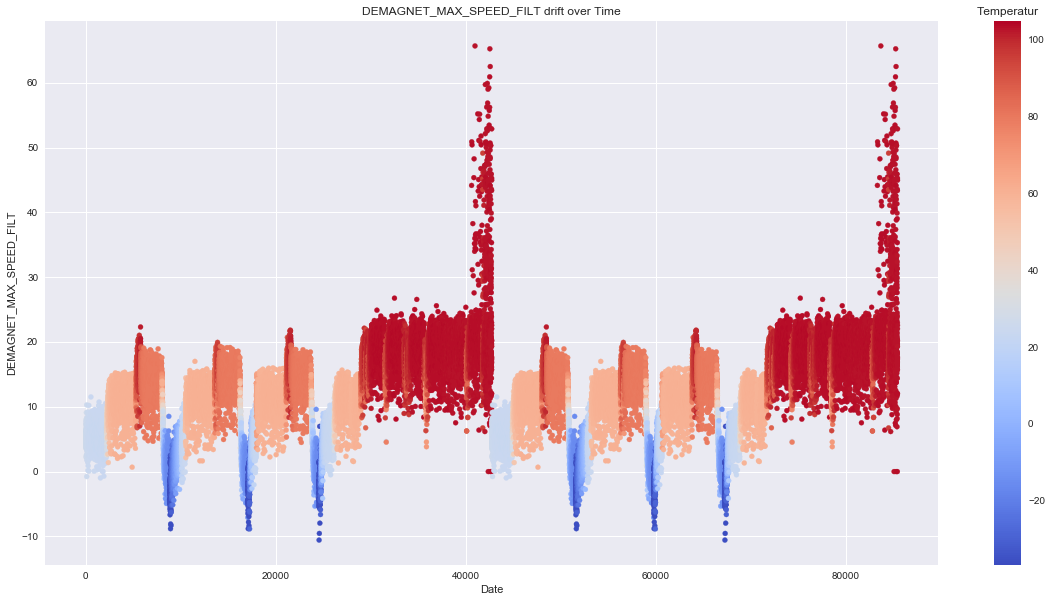

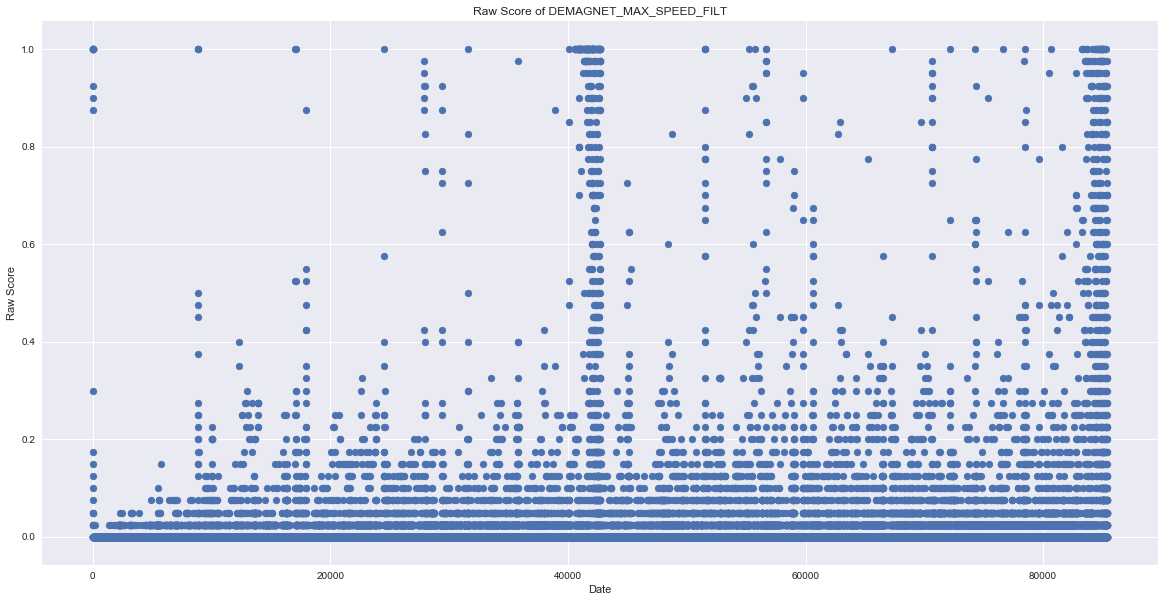

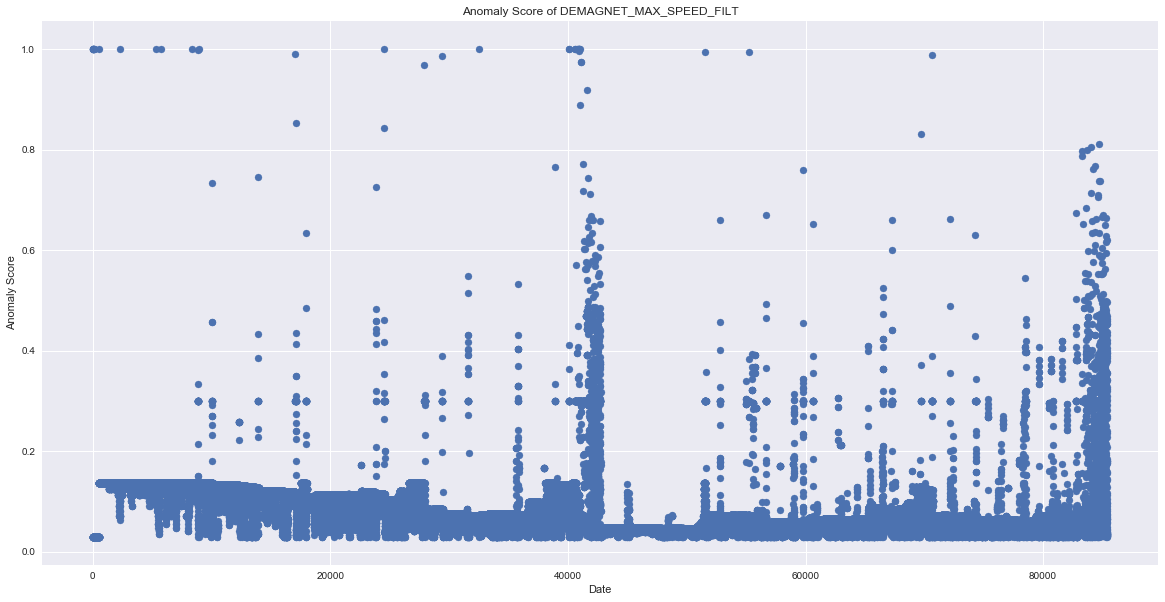

In [135]:
%matplotlib inline
#
fig, ax = plt.subplots(figsize=(20,10))
scatter = ax.scatter(df_anomaly['timestamp'].tolist(), y=df_anomaly['value'] , c=df_anomaly['IPB.TEMP.BAG'], s=100, marker='.', cmap=plt.cm.coolwarm)
clb = fig.colorbar(scatter)
clb.ax.set_title('Temperatur')
plt.xlabel("Date")
plt.ylabel("DEMAGNET_MAX_SPEED_FILT")
plt.title("DEMAGNET_MAX_SPEED_FILT drift over Time")
#ax.set_xlim([datetime.date(2018, 4, 13), datetime.date(2018, 5, 4)])

#plot raw score
_, ax = plt.subplots(figsize=(20,10))
ax.scatter(df_anomaly['brakings'].tolist(),df_anomaly['raw score'])
plt.xlabel("Date")
plt.ylabel("Raw Score")
plt.title("Raw Score of DEMAGNET_MAX_SPEED_FILT")
#ax.set_xlim([datetime.date(2018, 4, 13), datetime.date(2018, 5, 4)])


#plot anomaly score
_, ax = plt.subplots(figsize=(20,10))
ax.scatter(df_anomaly['brakings'].tolist(),df_anomaly['anomaly score'])
plt.xlabel("Date")
plt.ylabel("Anomaly Score")
plt.title("Anomaly Score of DEMAGNET_MAX_SPEED_FILT")
#ax.set_xlim([datetime.date(2018, 4, 13), datetime.date(2018, 5, 4)])

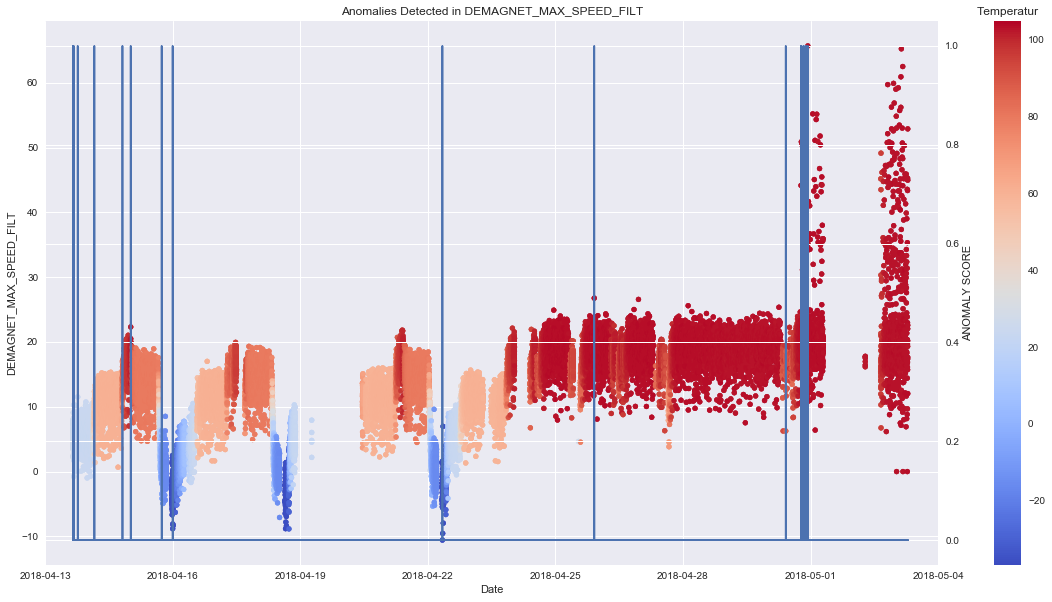

In [138]:
# Define a function for a plot with two y axes
def plot2y(x_data, x_label, y1_data, y1_label, y2_data, y2_label, title, color=None):

    fig, ax1 = plt.subplots(figsize=(20,10))
    scatter = ax1.scatter(x_data, y1_data, c=color,s=100, marker='.', cmap=plt.cm.coolwarm)
    clb = fig.colorbar(scatter)
    clb.ax.set_title('Temperatur')
    # Label axes
    ax1.set_ylabel(y1_label)
    ax1.set_xlabel(x_label)
    ax1.set_title(title)

    # Create the second plot object with the same x-axis
    ax2 = ax1.twinx()
    ax2.plot(x_data, y2_data)
    ax2.set_ylabel(y2_label)
    # Show right frame line
    ax2.spines['right'].set_visible(True)
    ax2.set_xlim([datetime.date(2018, 4, 13), datetime.date(2018, 5, 4)])
    

#create plot
plot2y(x_data = df_anomaly['timestamp'].tolist()
           , x_label = 'Date'
           , y1_data = df_anomaly['value']
           , y1_label = 'DEMAGNET_MAX_SPEED_FILT'
           , y2_data = df_anomaly['anomaly']
           , y2_label = 'ANOMALY SCORE'
           , title = 'Anomalies Detected in DEMAGNET_MAX_SPEED_FILT'
           , color = df_anomaly['IPB.TEMP.BAG'])


       anomaly score  raw score           timestamp      value  anomaly  \
5750             1.0      0.275 2018-04-15 00:12:24  22.310371        1   
32473            1.0      0.550 2018-04-25 21:52:33  26.757590        1   
40587            1.0      0.975 2018-04-30 18:34:23  44.150586        1   
40602            1.0      0.725 2018-04-30 18:47:03  50.879701        1   
40948            1.0      0.650 2018-04-30 22:26:10  65.670861        1   

       IPB.TEMP.BAG  
5750     101.818848  
32473    103.259277  
40587    102.838135  
40602    103.161621  
40948    102.923584  
Mean: 19.1672345309
Standard deviation: 3.87375334589


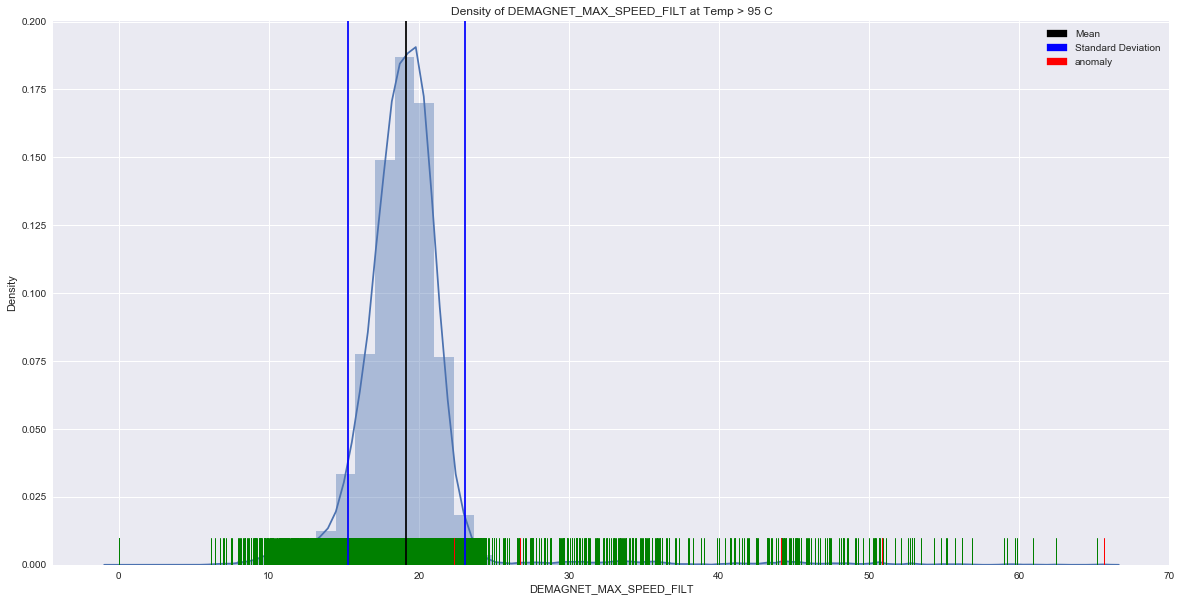

In [17]:
df_anomaly.get_value(24540, 'timestamp')
df_tempgt95 = df_anomaly[df_anomaly['IPB.TEMP.BAG'] > 95.0]
#df_tempgt95 = df_anomaly

mean = mpatches.Patch(color='black', label='Mean')
std = mpatches.Patch(color='blue', label='Standard Deviation')
red = mpatches.Patch(color='red', label='anomaly')

#print(df_tempgt95.head(3))
red_ticks = df_tempgt95[df_tempgt95['anomaly'] == 1]
green_ticks = df_tempgt95[df_tempgt95['anomaly'] < 1]
print(df_tempgt95[df_tempgt95.anomaly == 1])
print("Mean: " + str(np.mean(df_tempgt95.value)))
print("Standard deviation: " + str(np.std(df_tempgt95.value)))

#plot density distribution of value > 95C°
_, ax = plt.subplots(figsize=(20,10))
ax = sns.distplot(df_tempgt95.value, hist=True)
sns.rugplot(green_ticks.value, color="green")
sns.rugplot(red_ticks.value, color="red")
ax.set(xlabel='DEMAGNET_MAX_SPEED_FILT', ylabel='Density', title="Density of DEMAGNET_MAX_SPEED_FILT at Temp > 95 C")
ax.axvline(np.mean(df_tempgt95.value), color="black")
ax.axvline((np.mean(df_tempgt95.value) + np.std(df_tempgt95.value)), color="blue")
ax.axvline((np.mean(df_tempgt95.value) - np.std(df_tempgt95.value)), color="blue")
ax.legend(handles=[mean, std, red])

In [59]:
def plot_anomaly_context(data, x_label, y_label, title, start, end):
    
    
    df_anomaly_context = data.iloc[start:end]
    df_anomaly_context.reset_index(level=0, inplace=True)
    
    red_patch = mpatches.Patch(color='red', label='Anomaly')
    green_patch = mpatches.Patch(color='green', label='Normal')
    blue_patch = mpatches.Patch(color='blue', label='Context Window', alpha=0.1)
    
    
    #plot full data, anomalies and context window
    df_anomaly_no = data[data['anomaly'] == 0]
    df_anomaly_yes = data[data['anomaly'] == 1]

    fig, ax1 = plt.subplots(figsize=(20,10))
    ax1.scatter(df_anomaly_no['timestamp'].tolist(), df_anomaly_no['value'], c='green',s=100, marker='.', zorder=1)
    ax1.scatter(df_anomaly_yes['timestamp'].tolist(), df_anomaly_yes['value'], c='red',s=100, marker='.', zorder=2)
    ax1.set_ylabel("DEMAGNET_MAX_SPEED_FILT")
    ax1.set_xlabel("Date")
    ax1.set_title("Detected Anomaly Points")
    ax1.set_xlim([datetime.date(2018, 4, 13), datetime.date(2018, 5, 4)])
    ax1.axvspan(data.get_value(start, 'timestamp'), data.get_value(end, 'timestamp'), facecolor='b', alpha=0.1  )
    ax1.legend(handles=[green_patch, red_patch, blue_patch])
      
    
    _, ax2 = plt.subplots(figsize=(20,10))
    ax2.bar(df_anomaly_context['index'], df_anomaly_context['value'], 
        color=['red' if row['anomaly'] == 1 else 'green' for _,row in df_anomaly_context.iterrows()])
    ax2.set_ylabel(y_label)
    ax2.set_xlabel(x_label)
    ax2.set_title(title)
    plt.legend(handles=[green_patch, red_patch])


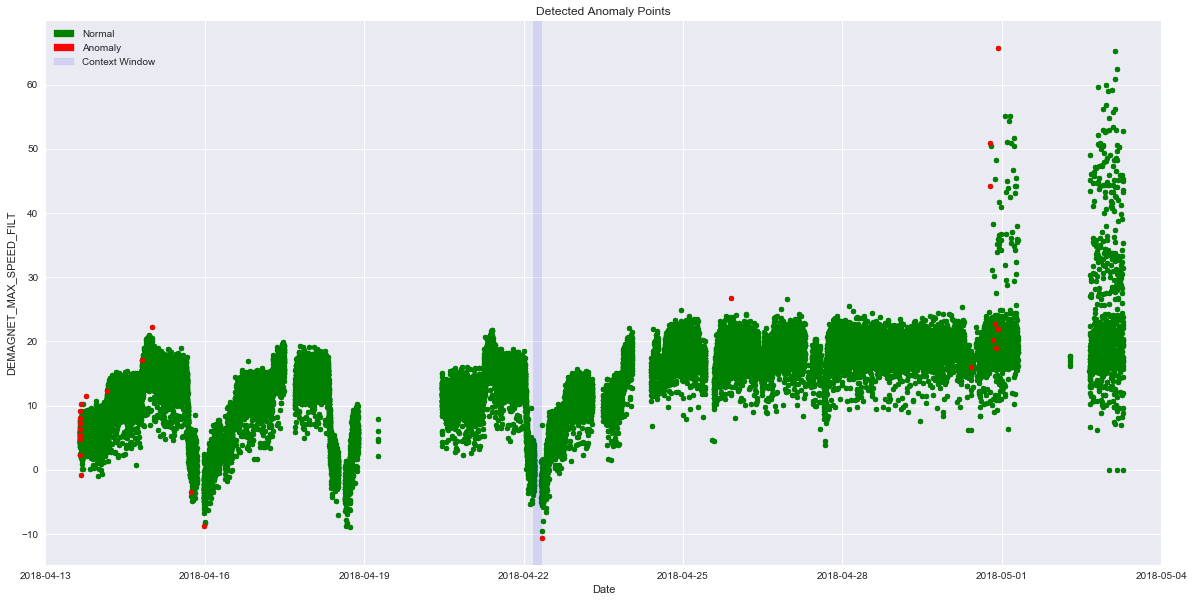

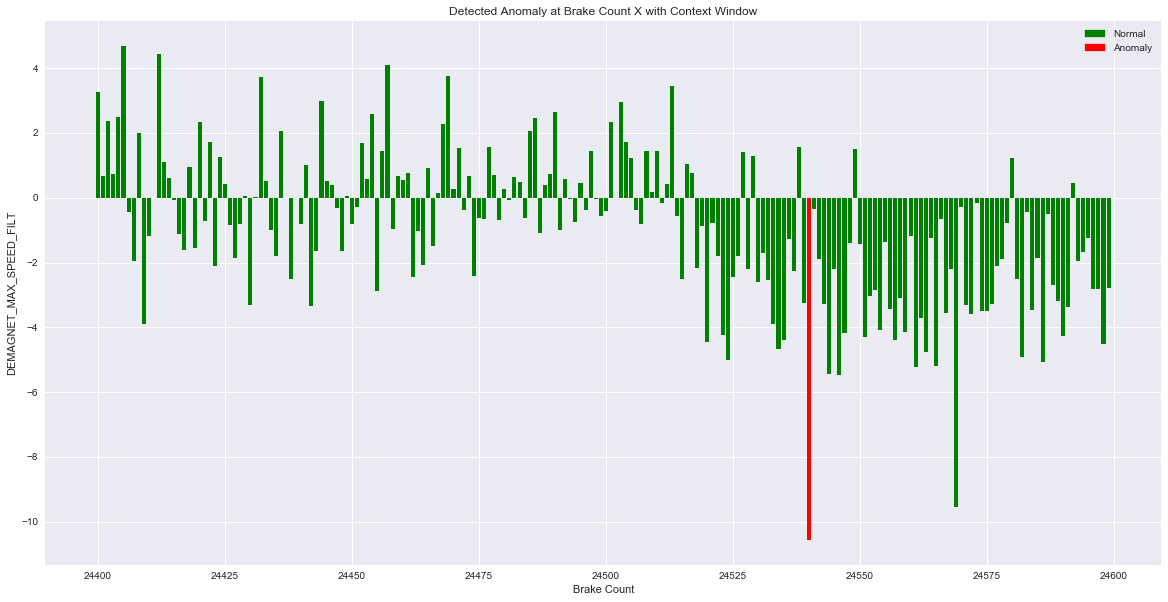

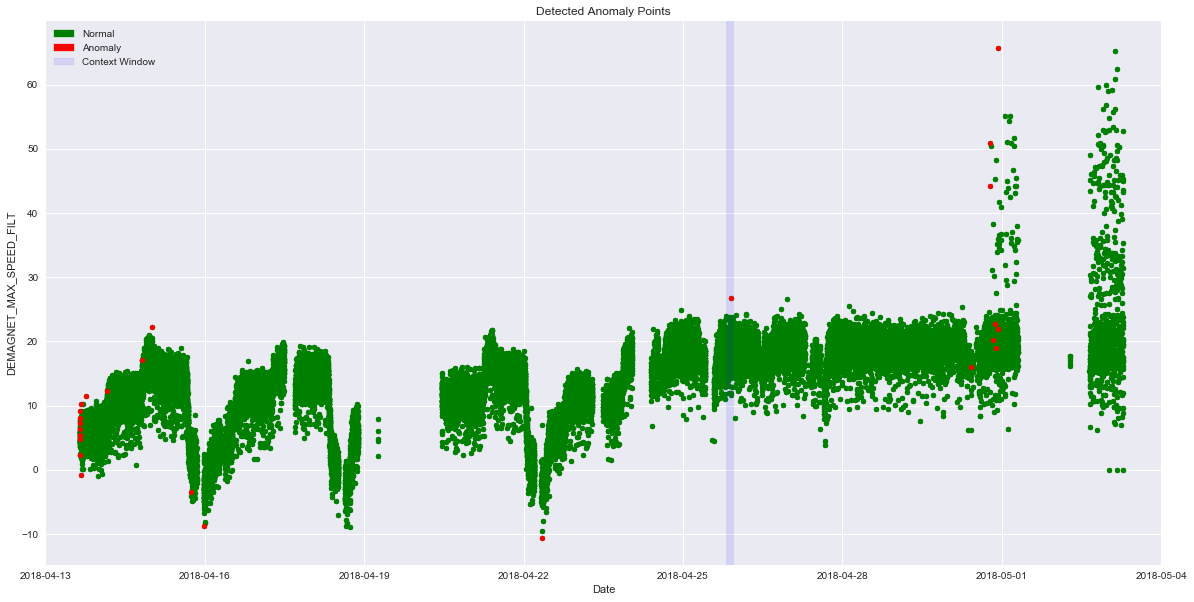

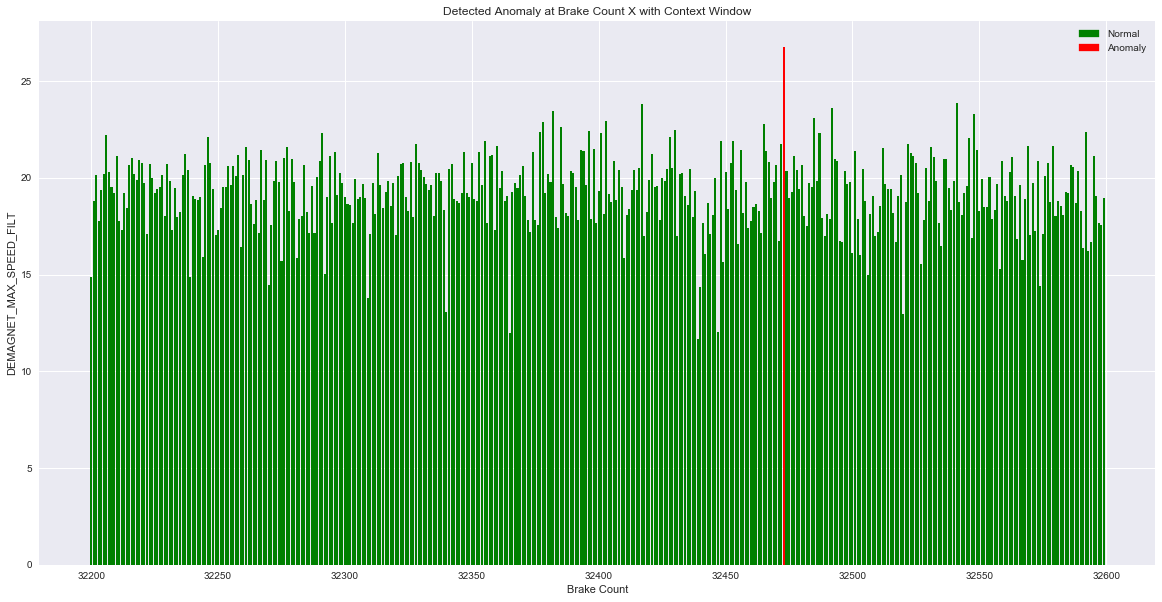

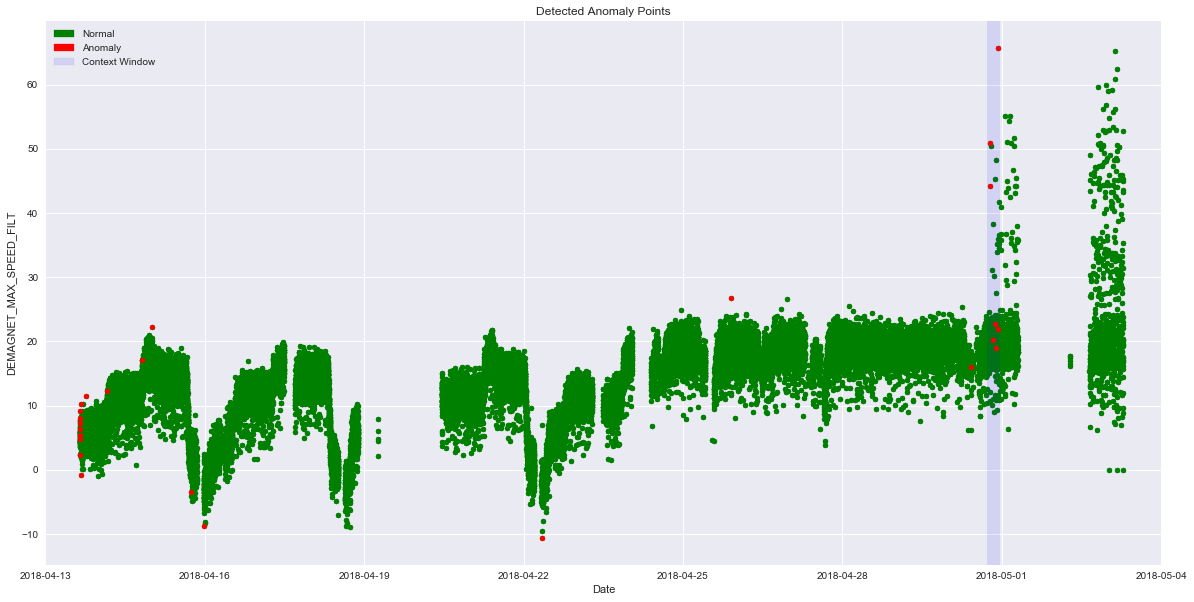

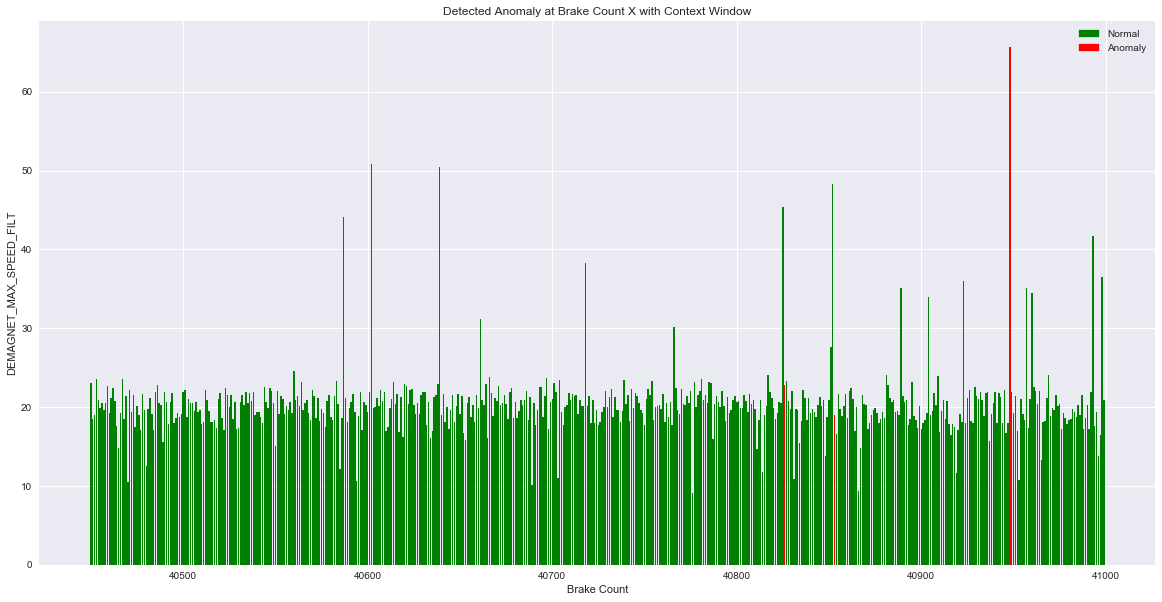

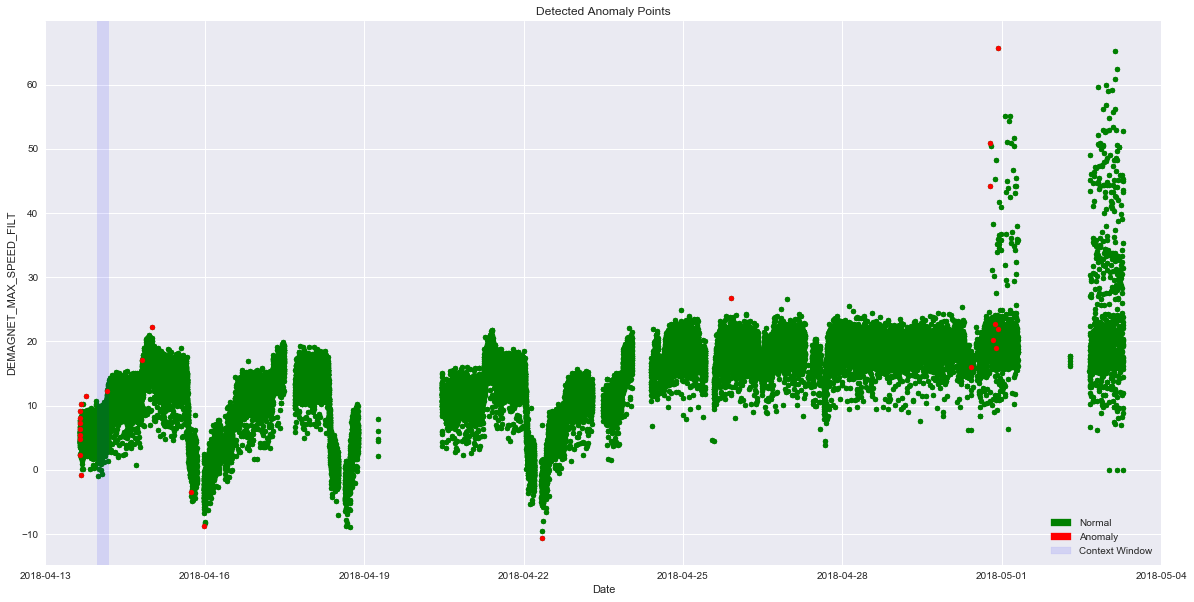

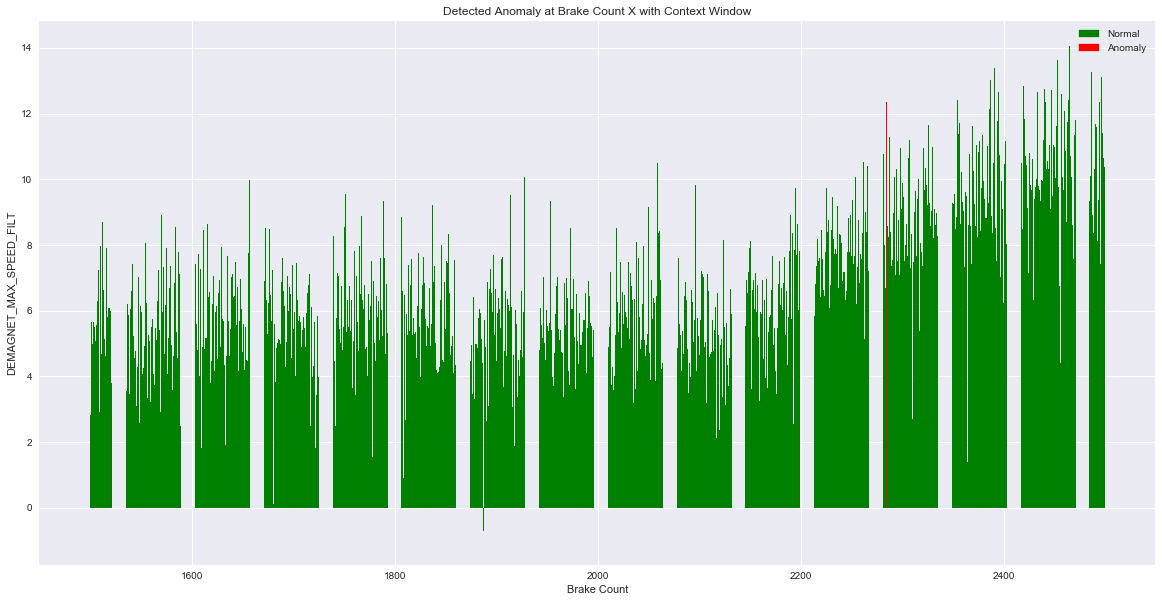

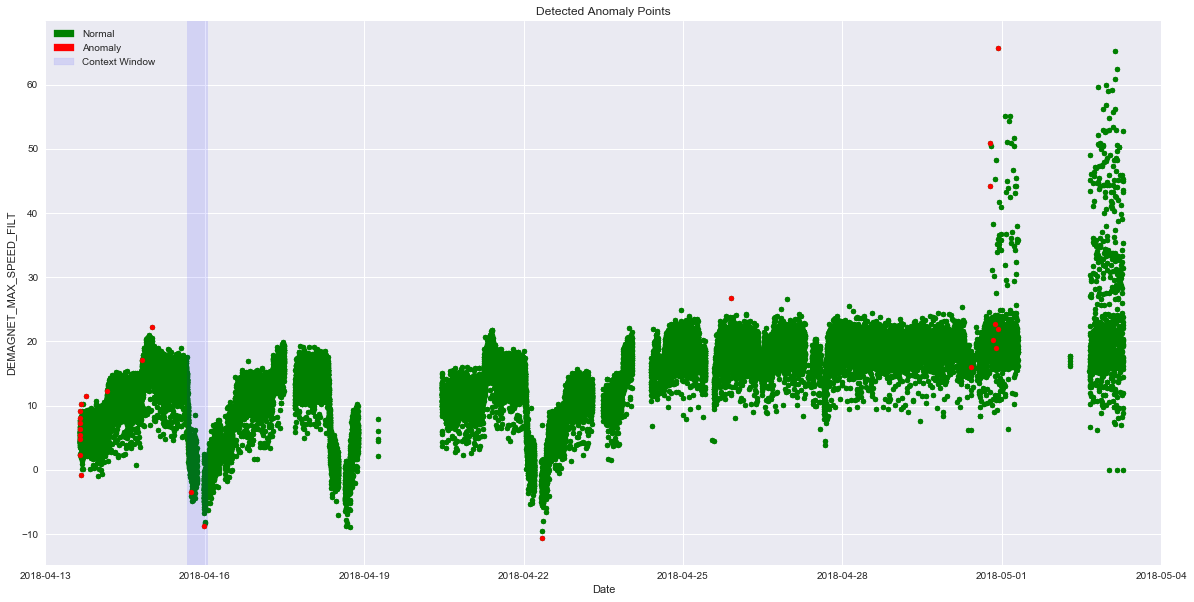

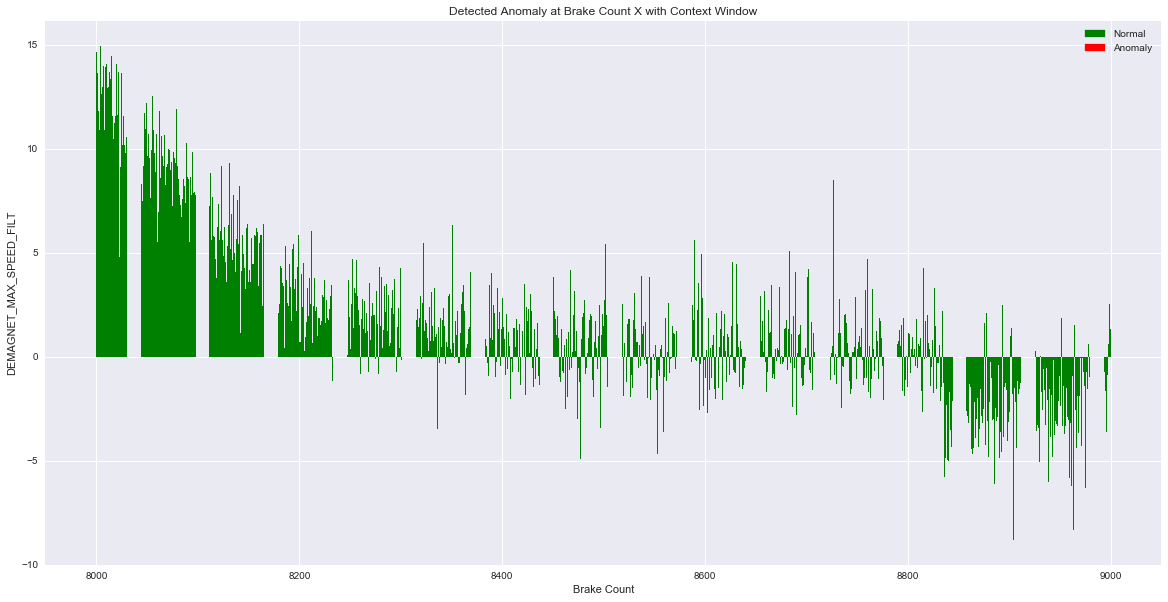

In [139]:
#plot anomaly at Brake Count 24540
plot_anomaly_context(df_anomaly, "Brake Count", "DEMAGNET_MAX_SPEED_FILT", "Detected Anomaly at Brake Count X with Context Window", 24400, 24600)

#plot anomaly at Brake Count 32473 
plot_anomaly_context(df_anomaly, "Brake Count", "DEMAGNET_MAX_SPEED_FILT", "Detected Anomaly at Brake Count X with Context Window", 32200, 32600)

#plot anomaly at Brake Count 40587, 40602, 40948
plot_anomaly_context(df_anomaly, "Brake Count", "DEMAGNET_MAX_SPEED_FILT", "Detected Anomaly at Brake Count X with Context Window", 40450, 41000)

#plot anomaly at Brake Count 40587, 40602, 40948
plot_anomaly_context(df_anomaly, "Brake Count", "DEMAGNET_MAX_SPEED_FILT", "Detected Anomaly at Brake Count X with Context Window", 1500, 2500)

plot_anomaly_context(df_anomaly, "Brake Count", "DEMAGNET_MAX_SPEED_FILT", "Detected Anomaly at Brake Count X with Context Window", 8000, 9000)